In [1]:
import pandas as pd

# 학습 데이터 로드
train_df = pd.read_csv("train.csv")

# 상위 5개 행 확인
train_df.head()


ID  Age Gender Country Race Family_Background Radiation_History  \
0  TRAIN_00000   80      M     CHN  ASN          Positive           Exposed   
1  TRAIN_00001   37      M     NGA  ASN          Positive         Unexposed   
2  TRAIN_00002   71      M     CHN  MDE          Positive         Unexposed   
3  TRAIN_00003   40      F     IND  HSP          Negative         Unexposed   
4  TRAIN_00004   53      F     CHN  CAU          Negative         Unexposed   

  Iodine_Deficiency       Smoke Weight_Risk Diabetes  Nodule_Size  TSH_Result  \
0        Sufficient  Non-Smoker   Not Obese       No     0.650355    2.784735   
1        Sufficient      Smoker       Obese       No     2.950430    0.911624   
2        Sufficient  Non-Smoker   Not Obese      Yes     2.200023    0.717754   
3        Sufficient  Non-Smoker       Obese       No     3.370796    6.846380   
4        Sufficient  Non-Smoker   Not Obese       No     4.230048    0.439519   

   T4_Result  T3_Result  Cancer  
0   6.744603   2.575820       1  
1   7.303305   2.505317       1  
2  11.137459   2.381080       0  
3  10.175254   0.753023       0  
4   7.194450   0.569356       1

In [44]:
import pandas as pd

# 학습 데이터 로드
test_df = pd.read_csv("test.csv")

# 상위 5개 행 확인
test_df.head()

ID  Age Gender Country Race Family_Background Radiation_History  \
0  TEST_00000   53      M     NGA  CAU          Negative         Unexposed   
1  TEST_00001   46      M     KOR  MDE          Negative         Unexposed   
2  TEST_00002   78      F     IND  ASN          Negative           Exposed   
3  TEST_00003   69      F     KOR  CAU          Negative         Unexposed   
4  TEST_00004   77      F     KOR  CAU          Positive         Unexposed   

  Iodine_Deficiency       Smoke Weight_Risk Diabetes  Nodule_Size  TSH_Result  \
0        Sufficient  Non-Smoker   Not Obese       No     2.940678    6.434501   
1         Deficient      Smoker       Obese       No     3.450129    4.729535   
2        Sufficient  Non-Smoker       Obese       No     4.680720    5.663475   
3        Sufficient  Non-Smoker   Not Obese       No     4.280588    7.473752   
4        Sufficient  Non-Smoker       Obese       No     3.380094    7.099987   

   T4_Result  T3_Result  
0   9.227958   2.733846  
1   5.937664   0.775012  
2  10.455964   1.259896  
3   8.785335   2.826138  
4   8.737063   3.453563

In [4]:
# cancer_detection_pipeline.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
import os

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리
def preprocess(df):
    df = df.copy()
    label_cols = df.select_dtypes(include='object').columns
    le_dict = {}
    for col in label_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        le_dict[col] = le
    return df, le_dict

train_x = train.drop(['ID', 'Cancer'], axis=1)
train_y = train['Cancer']
train_x, label_encoders = preprocess(train_x)

# 테스트 데이터에도 동일한 전처리
test_ids = test['ID']
test_x = test.drop(['ID'], axis=1)
for col, le in label_encoders.items():
    test_x[col] = le.transform(test_x[col])

# 3. 습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    train_x, train_y, test_size=0.2, random_state=42, stratify=train_y
)

# 4. 모델 학습
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

# 5. 검증
val_preds = model.predict(X_val)
f1 = f1_score(y_val, val_preds)
print("Validation F1 Score:", round(f1, 4))

# 6. 테스트 데이터 예측 및 제출 파일 저장
test_preds = model.predict(test_x)
submission['Cancer'] = test_preds
submission.to_csv('submission.csv', index=False)


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463
Validation F1 Score: 0.2901


In [7]:
# cancer_detection_pipeline.py
# Private 제출용 코드
# 모델: LGBMClassifier + class_weight + F1 최적화
# 경로: /data 기준
# 개발환경: Python 3.9, LightGBM 4.2.0, scikit-learn 1.3.0
# 코드 인코딩: UTF-8

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
import os

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 함수 정의
def preprocess(df):
    df = df.copy()
    label_cols = df.select_dtypes(include='object').columns
    le_dict = {}
    for col in label_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        le_dict[col] = le
    return df, le_dict

# 3. 훈련 데이터 준비
train_x = train.drop(['ID', 'Cancer'], axis=1)
train_y = train['Cancer']
train_x, label_encoders = preprocess(train_x)

# 4. 테스트 데이터 전처리
test_ids = test['ID']
test_x = test.drop(['ID'], axis=1)
for col, le in label_encoders.items():
    test_x[col] = le.transform(test_x[col])

# 5. 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    train_x, train_y, test_size=0.2, random_state=42, stratify=train_y
)

# 6. 커스텀 F1 스코어 함수 정의
def lgb_f1_score(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    return 'f1', f1_score(y_true, y_pred_binary), True

# 7. 모델 학습
model = LGBMClassifier(
    random_state=42,
    class_weight='balanced',         # 클래스 불균형 대응
    n_estimators=1000,
    learning_rate=0.05,
    n_jobs=-1
)

from lightgbm import early_stopping, log_evaluation

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric=lgb_f1_score,
    callbacks=[
        early_stopping(50),
        log_evaluation(100)
    ]
)


# 8. 검증 점수 출력
val_preds = model.predict(X_val)
val_f1 = f1_score(y_val, val_preds)
print("Validation F1 Score:", round(val_f1, 4))

# 9. 테스트 데이터 예측 및 제출
test_preds = model.predict(test_x)
submission['Cancer'] = test_preds
submission.to_csv('submission2.csv', index=False)



[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_logloss: 0.55331	valid_0's f1: 0.466397
Early stopping, best iteration is:
[52]	valid_0's binary_logloss: 0.559417	valid_0's f1: 0.466869
Validation F1 Score: 0.4669


In [12]:
# cancer_detection_pipeline_optimized.py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import os

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 + Feature Engineering 함수 정의
def preprocess(df):
    df = df.copy()

    # 수치형 Feature Engineering 예시
    df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)
    df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)
    df['Nodule_TSH_ratio'] = df['Nodule_Size'] / (df['TSH_Result'] + 1e-6)

    return df

# 3. 훈련 데이터 준비
train_y = train['Cancer']
train_x = train.drop(['ID', 'Cancer'], axis=1)
train_x = preprocess(train_x)

# 4. 테스트 데이터 전처리
test_ids = test['ID']
test_x = test.drop(['ID'], axis=1)
test_x = preprocess(test_x)

# 5. 카테고리형 컬럼 지정 (문자형인 열들)
cat_cols = train_x.select_dtypes(include='object').columns.tolist()

# 6. 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    train_x, train_y, test_size=0.2, random_state=42, stratify=train_y
)

# 7. 커스텀 F1 스코어 함수 정의
def lgb_f1_score(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    return 'f1', f1_score(y_true, y_pred_binary), True

# 8. 모델 학습
model = LGBMClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=1000,
    learning_rate=0.05,
    n_jobs=-1
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric=lgb_f1_score,
    callbacks=[early_stopping(50), log_evaluation(100)],
    categorical_feature=cat_cols
)

# 9. Threshold 튜닝을 통한 F1 최적화
val_probs = model.predict_proba(X_val)[:, 1]
prec, rec, thresholds = precision_recall_curve(y_val, val_probs)
f1s = 2 * (prec * rec) / (prec + rec + 1e-6)
best_thresh = thresholds[np.argmax(f1s)]
print(f"Best Threshold: {best_thresh:.4f}")

val_preds = (val_probs > best_thresh).astype(int)
val_f1 = f1_score(y_val, val_preds)
print("Optimized Validation F1 Score:", round(val_f1, 4))

# 10. 테스트 데이터 예측 및 제출 파일 생성
test_probs = model.predict_proba(test_x)[:, 1]
test_preds = (test_probs > best_thresh).astype(int)
submission['Cancer'] = test_preds
submission.to_csv('submission4.csv', index=False)


ValueError: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: Gender: object, Country: object, Race: object, Family_Background: object, Radiation_History: object, Iodine_Deficiency: object, Smoke: object, Weight_Risk: object, Diabetes: object

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import os

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 + Feature Engineering 함수 정의
def preprocess(df):
    df = df.copy()

    # 수치형 Feature Engineering
    df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)
    df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)
    df['Nodule_TSH_ratio'] = df['Nodule_Size'] / (df['TSH_Result'] + 1e-6)

    # 범주형 변수 object -> category 변환
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('category')

    return df

# 3. 훈련 데이터 준비
train_y = train['Cancer']
train_x = train.drop(['ID', 'Cancer'], axis=1)
train_x = preprocess(train_x)

# 4. 테스트 데이터 전처리
test_ids = test['ID']
test_x = test.drop(['ID'], axis=1)
test_x = preprocess(test_x)

# 5. 카테고리형 컬럼 추출
cat_cols = train_x.select_dtypes(include='category').columns.tolist()

# 6. 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    train_x, train_y, test_size=0.2, random_state=42, stratify=train_y
)

# 7. 커스텀 F1 스코어 함수 정의
def lgb_f1_score(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    return 'f1', f1_score(y_true, y_pred_binary), True

# 8. 모델 정의 및 학습
model = LGBMClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=1000,
    learning_rate=0.05,
    n_jobs=-1
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric=lgb_f1_score,
    callbacks=[early_stopping(50), log_evaluation(100)],
    categorical_feature=cat_cols
)

# 9. Threshold 튜닝을 통한 F1 최적화
val_probs = model.predict_proba(X_val)[:, 1]
prec, rec, thresholds = precision_recall_curve(y_val, val_probs)
f1s = 2 * (prec * rec) / (prec + rec + 1e-6)
best_thresh = thresholds[np.argmax(f1s)]
print(f"Best Threshold: {best_thresh:.4f}")

val_preds = (val_probs > best_thresh).astype(int)
val_f1 = f1_score(y_val, val_preds)
print("Optimized Validation F1 Score:", round(val_f1, 4))

# 10. 테스트 데이터 예측 및 제출 파일 생성
test_probs = model.predict_proba(test_x)[:, 1]
test_preds = (test_probs > best_thresh).astype(int)

submission['Cancer'] = test_preds
submission.to_csv('submission4.csv', index=False)


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1896
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_logloss: 0.551795	valid_0's f1: 0.466465
Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.558458	valid_0's f1: 0.467881
Best Threshold: 0.7111
Optimized Validation F1 Score: 0.4676


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import os

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 + Feature Engineering 함수 정의
def preprocess(df):
    df = df.copy()

    # 수치형 Feature Engineering
    df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)
    df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)
    df['Nodule_TSH_ratio'] = df['Nodule_Size'] / (df['TSH_Result'] + 1e-6)
    df['TSH_T4_ratio'] = df['TSH_Result'] / (df['T4_Result'] + 1e-6)  # 추가 피처 엔지니어링

    # 범주형 변수 object -> category 변환
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('category')

    return df

# 3. 훈련 데이터 준비
train_y = train['Cancer']
train_x = train.drop(['ID', 'Cancer'], axis=1)
train_x = preprocess(train_x)

# 4. 테스트 데이터 전처리
test_ids = test['ID']
test_x = test.drop(['ID'], axis=1)
test_x = preprocess(test_x)

# 5. 카테고리형 컬럼 추출
cat_cols = train_x.select_dtypes(include='category').columns.tolist()

# 6. 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    train_x, train_y, test_size=0.2, random_state=42, stratify=train_y
)

# 7. 커스텀 F1 스코어 함수 정의
def lgb_f1_score(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    return 'f1', f1_score(y_true, y_pred_binary), True

# 8. 모델 정의 및 하이퍼파라미터 튜닝을 위한 GridSearchCV
param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [1000, 1500, 2000]
}

model = LGBMClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print(f"Best parameters found: {grid_search.best_params_}")

# 9. 최적의 파라미터로 모델 학습
best_model = grid_search.best_estimator_

# 10. 모델 학습
best_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric=lgb_f1_score,
    callbacks=[early_stopping(50), log_evaluation(100)],
    categorical_feature=cat_cols
)

# 11. Threshold 튜닝을 통한 F1 최적화
val_probs = best_model.predict_proba(X_val)[:, 1]
prec, rec, thresholds = precision_recall_curve(y_val, val_probs)
f1s = 2 * (prec * rec) / (prec + rec + 1e-6)
best_thresh = thresholds[np.argmax(f1s)]
print(f"Best Threshold: {best_thresh:.4f}")

val_preds = (val_probs > best_thresh).astype(int)
val_f1 = f1_score(y_val, val_preds)
print("Optimized Validation F1 Score:", round(val_f1, 4))

# 12. 앙상블 모델 (LightGBM + 다른 모델) 적용 (Optional)
# LightGBM과 다른 모델을 앙상블할 경우, 예를 들어 XGBoost나 다른 분류기를 추가할 수 있습니다.

# 13. 테스트 데이터 예측 및 제출 파일 생성
test_probs = best_model.predict_proba(test_x)[:, 1]
test_preds = (test_probs > best_thresh).astype(int)

submission['Cancer'] = test_preds
submission.to_csv('submission_optimized.csv', index=False)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2151
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Best parameters found: {'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 1000, 'num_leaves': 31}
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `for

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import os

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 및 Feature Engineering 함수 정의
def preprocess(df):
    df = df.copy()

    # 수치형 Feature Engineering
    df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)  # TSH와 T3의 비율
    df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)  # T4와 T3의 비율
    df['Nodule_TSH_ratio'] = df['Nodule_Size'] / (df['TSH_Result'] + 1e-6)  # 결절 크기와 TSH의 비율

    # 범주형 변수 object -> category로 변환
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('category')

    return df

# 3. 훈련 데이터 준비
train_y = train['Cancer']
train_x = train.drop(['ID', 'Cancer'], axis=1)
train_x = preprocess(train_x)

# 4. 테스트 데이터 전처리
test_ids = test['ID']
test_x = test.drop(['ID'], axis=1)
test_x = preprocess(test_x)

# 5. 카테고리형 변수 추출
cat_cols = train_x.select_dtypes(include='category').columns.tolist()

# 6. 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    train_x, train_y, test_size=0.2, random_state=42, stratify=train_y
)

# 7. 커스텀 F1 스코어 함수 정의
def lgb_f1_score(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)  # 예측값을 0 또는 1로 이진화
    return 'f1', f1_score(y_true, y_pred_binary), True

# 8. 모델 정의 및 학습
model = LGBMClassifier(
    random_state=42,
    class_weight='balanced',  # 불균형 클래스에 가중치를 부여
    n_estimators=1000,  # 트리의 개수
    learning_rate=0.05,  # 학습률
    n_jobs=-1  # 병렬 처리
)

# 모델 학습
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric=lgb_f1_score,  # F1 스코어를 평가 지표로 사용
    callbacks=[early_stopping(50), log_evaluation(100)],  # 조기 종료 및 로그 출력
    categorical_feature=cat_cols  # 카테고리형 변수 지정
)

# 9. Threshold 튜닝을 통한 F1 최적화
val_probs = model.predict_proba(X_val)[:, 1]  # 예측 확률 가져오기
prec, rec, thresholds = precision_recall_curve(y_val, val_probs)  # Precision-Recall 커브
f1s = 2 * (prec * rec) / (prec + rec + 1e-6)  # F1 스코어 계산
best_thresh = thresholds[np.argmax(f1s)]  # 최적의 threshold 찾기
print(f"Best Threshold: {best_thresh:.4f}")

# 최적 threshold에 따른 예측
val_preds = (val_probs > best_thresh).astype(int)
val_f1 = f1_score(y_val, val_preds)  # 최적화된 F1 스코어 계산
print("Optimized Validation F1 Score:", round(val_f1, 4))

# 10. 테스트 데이터 예측 및 제출 파일 생성
test_probs = model.predict_proba(test_x)[:, 1]
test_preds = (test_probs > best_thresh).astype(int)

submission['Cancer'] = test_preds
submission.to_csv('submission5.csv', index=False)


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1896
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_logloss: 0.551795	valid_0's f1: 0.466465
Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.558458	valid_0's f1: 0.467881
Best Threshold: 0.7111
Optimized Validation F1 Score: 0.4676


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import os

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 및 Feature Engineering
def preprocess(df):
    df = df.copy()
    
    # 로그 변환 (왜도 완화)
    for col in ['TSH_Result', 'T3_Result', 'T4_Result', 'Nodule_Size']:
        df[col] = np.log1p(df[col])

    # 파생 변수 생성
    df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)
    df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)
    df['Nodule_TSH_ratio'] = df['Nodule_Size'] / (df['TSH_Result'] + 1e-6)
    df['T3_TSH_ratio'] = df['T3_Result'] / (df['TSH_Result'] + 1e-6)
    df['hormone_sum'] = df['TSH_Result'] + df['T3_Result'] + df['T4_Result']
    df['is_large_nodule'] = (df['Nodule_Size'] > np.log1p(20)).astype(int)  # 20mm 이상 로그 기준

    # 범주형 변수 처리
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('category')

    return df

# 3. 데이터 분리
train_y = train['Cancer']
train_x = preprocess(train.drop(['ID', 'Cancer'], axis=1))
test_x = preprocess(test.drop(['ID'], axis=1))
test_ids = test['ID']

# 4. 카테고리형 변수
cat_cols = train_x.select_dtypes(include='category').columns.tolist()

# 5. F1 Score 기반 커스텀 평가 함수
def lgb_f1_score(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    return 'f1', f1_score(y_true, y_pred_binary), True

# 6. K-Fold 준비
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 결과 저장
val_scores = []
thresholds = []
test_preds = np.zeros(len(test_x))

# 7. Fold 반복 학습
for fold, (train_idx, val_idx) in enumerate(kf.split(train_x, train_y)):
    print(f"\n🟢 Fold {fold + 1}")

    X_train, X_val = train_x.iloc[train_idx], train_x.iloc[val_idx]
    y_train, y_val = train_y.iloc[train_idx], train_y.iloc[val_idx]

    model = LGBMClassifier(
        random_state=42,
        class_weight='balanced',
        n_estimators=2000,  # 트리 개수 조정
        learning_rate=0.02,  # 학습률 증가
        max_depth=6,  # max_depth 조금 낮추기
        num_leaves=31,  # num_leaves 낮추기
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,  # L1 regularization
        reg_lambda=0.1,  # L2 regularization
        n_jobs=-1
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric=lgb_f1_score,
        callbacks=[early_stopping(100), log_evaluation(100)],
        categorical_feature=cat_cols
    )

    # Threshold 최적화
    val_probs = model.predict_proba(X_val)[:, 1]
    prec, rec, thresholds_fold = precision_recall_curve(y_val, val_probs)
    f1s = 2 * (prec * rec) / (prec + rec + 1e-6)
    best_thresh = thresholds_fold[np.argmax(f1s)]
    thresholds.append(best_thresh)

    val_preds = (val_probs > best_thresh).astype(int)
    score = f1_score(y_val, val_preds)
    val_scores.append(score)
    print(f"Fold {fold + 1} Best Threshold: {best_thresh:.4f}, F1 Score: {score:.4f}")

    # 테스트 데이터 예측 축적
    test_probs = model.predict_proba(test_x)[:, 1]
    test_preds += test_probs / kf.n_splits  # 평균

# 8. 최종 Threshold 평균 적용 후 예측
final_threshold = np.mean(thresholds)
final_preds = (test_preds > final_threshold).astype(int)

print("\n✅ 평균 Validation F1 Score:", round(np.mean(val_scores), 4))
print("✅ 최종 평균 Threshold:", round(final_threshold, 4))

# 9. 제출 파일 생성
submission['Cancer'] = final_preds
submission.to_csv('submission_optimized.csv', index=False)



🟢 Fold 1
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2407
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.572974	valid_0's f1: 0.483017
Early stopping, best iteration is:
[52]	valid_0's binary_logloss: 0.600325	valid_0's f1: 0.484
Fold 1 Best Threshold: 0.5299, F1 Score: 0.4848

🟢 Fold 2
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing wa

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import os

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 및 Feature Engineering
def preprocess(df):
    df = df.copy()
    
    # 로그 변환 (왜도 완화)
    for col in ['TSH_Result', 'T3_Result', 'T4_Result', 'Nodule_Size']:
        df[col] = np.log1p(df[col])

    # 파생 변수 생성
    df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)
    df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)
    df['Nodule_TSH_ratio'] = df['Nodule_Size'] / (df['TSH_Result'] + 1e-6)
    df['T3_TSH_ratio'] = df['T3_Result'] / (df['TSH_Result'] + 1e-6)
    df['hormone_sum'] = df['TSH_Result'] + df['T3_Result'] + df['T4_Result']
    df['is_large_nodule'] = (df['Nodule_Size'] > np.log1p(20)).astype(int)  # 20mm 이상 로그 기준

    # 범주형 변수 처리
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('category')

    return df

# 3. 데이터 분리
train_y = train['Cancer']
train_x = preprocess(train.drop(['ID', 'Cancer'], axis=1))
test_x = preprocess(test.drop(['ID'], axis=1))
test_ids = test['ID']

# 4. 카테고리형 변수
cat_cols = train_x.select_dtypes(include='category').columns.tolist()

# 5. F1 Score 기반 커스텀 평가 함수
def lgb_f1_score(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    return 'f1', f1_score(y_true, y_pred_binary), True

# 6. K-Fold 준비
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 결과 저장
val_scores = []
thresholds = []
test_preds = np.zeros(len(test_x))

# 7. Fold 반복 학습
for fold, (train_idx, val_idx) in enumerate(kf.split(train_x, train_y)):
    print(f"\n🟢 Fold {fold + 1}")

    X_train, X_val = train_x.iloc[train_idx], train_x.iloc[val_idx]
    y_train, y_val = train_y.iloc[train_idx], train_y.iloc[val_idx]

    model = LGBMClassifier(
        random_state=42,
        class_weight='balanced',
        n_estimators=2000,  # 트리 개수 조정
        learning_rate=0.02,  # 학습률 증가
        max_depth=6,  # max_depth 조금 낮추기
        num_leaves=31,  # num_leaves 낮추기
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,  # L1 regularization
        reg_lambda=0.1,  # L2 regularization
        n_jobs=-1
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric=lgb_f1_score,
        callbacks=[early_stopping(100), log_evaluation(100)],
        categorical_feature=cat_cols
    )

    # Threshold 최적화
    val_probs = model.predict_proba(X_val)[:, 1]
    prec, rec, thresholds_fold = precision_recall_curve(y_val, val_probs)
    f1s = 2 * (prec * rec) / (prec + rec + 1e-6)
    best_thresh = thresholds_fold[np.argmax(f1s)]
    thresholds.append(best_thresh)

    val_preds = (val_probs > best_thresh).astype(int)
    score = f1_score(y_val, val_preds)
    val_scores.append(score)
    print(f"Fold {fold + 1} Best Threshold: {best_thresh:.4f}, F1 Score: {score:.4f}")

    # 테스트 데이터 예측 축적
    test_probs = model.predict_proba(test_x)[:, 1]
    test_preds += test_probs / kf.n_splits  # 평균

# 8. 최종 Threshold 평균 적용 후 예측
final_threshold = np.mean(thresholds)
final_preds = (test_preds > final_threshold).astype(int)

print("\n✅ 평균 Validation F1 Score:", round(np.mean(val_scores), 4))
print("✅ 최종 평균 Threshold:", round(final_threshold, 4))

# 9. 제출 파일 생성
submission['Cancer'] = final_preds
submission.to_csv('submission_optimized.csv', index=False)

# 10. Grid Search for hyperparameter optimization
param_grid = {
    'learning_rate': [0.01, 0.02, 0.05],
    'max_depth': [5, 6, 7],
    'num_leaves': [31, 40, 50],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0.1, 0.2],
    'reg_lambda': [0.1, 0.2]
}

model = LGBMClassifier(random_state=42, class_weight='balanced', n_estimators=2000, n_jobs=-1)

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=kf, verbose=2, n_jobs=-1)
grid_search.fit(train_x, train_y)

# Get best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")



🟢 Fold 1
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2407
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.572974	valid_0's f1: 0.483017
Early stopping, best iteration is:
[52]	valid_0's binary_logloss: 0.600325	valid_0's f1: 0.484
Fold 1 Best Threshold: 0.5299, F1 Score: 0.4848

🟢 Fold 2
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing wa

KeyboardInterrupt: 

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping

# 데이터 로딩 및 전처리
def load_and_preprocess():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    y = train['Cancer']
    train.drop(['ID', 'Cancer'], axis=1, inplace=True)
    test_ids = test['ID']
    test.drop(['ID'], axis=1, inplace=True)

    for df in [train, test]:
        for col in ['TSH_Result', 'T3_Result', 'T4_Result', 'Nodule_Size']:
            df[col] = np.log1p(df[col])
        df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)
        df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)
        df['is_large_nodule'] = (df['Nodule_Size'] > np.log1p(20)).astype(int)
        for col in df.select_dtypes('object').columns:
            df[col] = df[col].astype('category')

    return train, y, test, test_ids

# 모델 학습 및 예측
def train_and_predict(X, y, X_test):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    test_preds, thresholds, val_scores = np.zeros(len(X_test)), [], []

    for train_idx, val_idx in kf.split(X, y):
        model = LGBMClassifier(
            random_state=42, class_weight='balanced', n_estimators=2000,
            learning_rate=0.02, max_depth=6, num_leaves=31, n_jobs=-1
        )

        model.fit(X.iloc[train_idx], y.iloc[train_idx],
                  eval_set=[(X.iloc[val_idx], y.iloc[val_idx])],
                  callbacks=[early_stopping(100)],
                  categorical_feature='auto')

        val_probs = model.predict_proba(X.iloc[val_idx])[:, 1]
        prec, rec, thresh = precision_recall_curve(y.iloc[val_idx], val_probs)
        f1s = 2 * (prec * rec) / (prec + rec + 1e-6)
        best_thresh = thresh[np.argmax(f1s)]
        thresholds.append(best_thresh)

        preds = (val_probs > best_thresh).astype(int)
        val_scores.append(f1_score(y.iloc[val_idx], preds))
        test_preds += model.predict_proba(X_test)[:, 1] / kf.n_splits

    return test_preds, thresholds, np.mean(val_scores)

# 실행
X, y, X_test, test_ids = load_and_preprocess()
test_preds, thresholds, mean_f1 = train_and_predict(X, y, X_test)

# 제출 저장
submission = pd.read_csv('sample_submission.csv')
submission['Cancer'] = (test_preds > np.mean(thresholds)).astype(int)
submission.to_csv('submission_light.csv', index=False)

print(f"✅ 평균 F1 Score: {mean_f1:.4f}, 평균 Threshold: {np.mean(thresholds):.4f}")


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1642
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import warnings
warnings.filterwarnings('ignore')

def load_and_preprocess():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    y = train['Cancer']
    train.drop(['ID', 'Cancer'], axis=1, inplace=True)
    test_ids = test['ID']
    test.drop(['ID'], axis=1, inplace=True)

    for df in [train, test]:
        for col in ['TSH_Result', 'T3_Result', 'T4_Result', 'Nodule_Size']:
            df[col] = np.log1p(df[col])
        df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)
        df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)
        df['is_large_nodule'] = (df['Nodule_Size'] > np.log1p(20)).astype(int)
        for col in df.select_dtypes('object').columns:
            df[col] = df[col].astype('category')

    return train, y, test, test_ids

def f1_scorer_thresh(model, X_val, y_val):
    probs = model.predict_proba(X_val)[:, 1]
    prec, rec, thresh = precision_recall_curve(y_val, probs)
    f1s = 2 * (prec * rec) / (prec + rec + 1e-6)
    best_idx = np.argmax(f1s)
    return f1s[best_idx], thresh[best_idx]

def tune_and_train(X, y, X_test):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    test_preds, thresholds, val_scores = np.zeros(len(X_test)), [], []

    base_model = LGBMClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

    param_grid = {
        'learning_rate': [0.01, 0.02, 0.05],
        'n_estimators': [500, 1000, 2000],
        'max_depth': [4, 6, 8],
        'num_leaves': [15, 31, 63],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
    }

    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        search = RandomizedSearchCV(
            base_model, param_grid, n_iter=10, scoring='f1', cv=3,
            verbose=0, random_state=42, n_jobs=-1
        )
        search.fit(X_train, y_train)

        best_model = search.best_estimator_
        best_model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            callbacks=[
                early_stopping(100),
                log_evaluation(0)
            ]
        )

        f1, thresh = f1_scorer_thresh(best_model, X_val, y_val)
        val_scores.append(f1)
        thresholds.append(thresh)

        test_preds += best_model.predict_proba(X_test)[:, 1] / kf.n_splits
        print(f"Fold {fold+1} F1: {f1:.4f} (Threshold: {thresh:.4f})")

    return test_preds, thresholds, np.mean(val_scores)

# 실행
X, y, X_test, test_ids = load_and_preprocess()
test_preds, thresholds, mean_f1 = tune_and_train(X, y, X_test)

submission = pd.read_csv('sample_submission.csv')
submission['Cancer'] = (test_preds > np.mean(thresholds)).astype(int)
submission.to_csv('submission_lgbm_randomsearch.csv', index=False)

print(f"\n✅ 평균 F1 Score: {mean_f1:.4f}, 평균 Threshold: {np.mean(thresholds):.4f}")


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1642
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1642
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [b

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import optuna
import warnings
warnings.filterwarnings('ignore')

# 1. 데이터 로드 및 전처리
def load_and_preprocess():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    y = train['Cancer']
    train.drop(['ID', 'Cancer'], axis=1, inplace=True)
    test_ids = test['ID']
    test.drop(['ID'], axis=1, inplace=True)

    for df in [train, test]:
        for col in ['TSH_Result', 'T3_Result', 'T4_Result', 'Nodule_Size']:
            df[col] = np.log1p(df[col])
        df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)
        df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)
        df['is_large_nodule'] = (df['Nodule_Size'] > np.log1p(20)).astype(int)
        for col in df.select_dtypes('object').columns:
            df[col] = df[col].astype('category')

    return train, y, test, test_ids

# 2. Threshold 기준 F1 최적화 함수
def f1_scorer_thresh(model, X_val, y_val):
    probs = model.predict_proba(X_val)[:, 1]
    prec, rec, thresh = precision_recall_curve(y_val, probs)
    f1s = 2 * (prec * rec) / (prec + rec + 1e-6)
    best_idx = np.argmax(f1s)
    return f1s[best_idx], thresh[best_idx]

# 3. Optuna 튜닝 함수
def objective(trial, X, y):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 500, 1500),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'num_leaves': trial.suggest_int('num_leaves', 15, 63),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'class_weight': 'balanced',
        'random_state': 42,
        'n_jobs': -1
    }

    X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    model = LGBMClassifier(**params)
    model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              callbacks=[early_stopping(100), log_evaluation(0)])
    f1, _ = f1_scorer_thresh(model, X_val, y_val)
    return f1

# 4. 최적 파라미터로 모델 학습
def tune_and_train(X, y, X_test):
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, X, y), n_trials=20)

    print("🎯 Best Trial:")
    print(study.best_params)

    best_params = study.best_params
    best_params.update({'class_weight': 'balanced', 'random_state': 42, 'n_jobs': -1})
    
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    test_preds, thresholds, val_scores = np.zeros(len(X_test)), [], []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = LGBMClassifier(**best_params)
        model.fit(X_train, y_train,
                  eval_set=[(X_val, y_val)],
                  callbacks=[early_stopping(100), log_evaluation(0)])

        f1, thresh = f1_scorer_thresh(model, X_val, y_val)
        val_scores.append(f1)
        thresholds.append(thresh)

        test_preds += model.predict_proba(X_test)[:, 1] / kf.n_splits
        print(f"Fold {fold+1} F1: {f1:.4f} (Threshold: {thresh:.4f})")

    return test_preds, thresholds, np.mean(val_scores)

# 5. 실행
X, y, X_test, test_ids = load_and_preprocess()
test_preds, thresholds, mean_f1 = tune_and_train(X, y, X_test)

# 6. 제출 저장
submission = pd.read_csv('sample_submission.csv')
submission['Cancer'] = (test_preds > np.mean(thresholds)).astype(int)
submission.to_csv('submission_optuna.csv', index=False)

print(f"\n✅ Optuna 기반 평균 F1 Score: {mean_f1:.4f}, 평균 Threshold: {np.mean(thresholds):.4f}")


[I 2025-05-08 11:11:08,427] A new study created in memory with name: no-name-aa534029-f275-47c1-8ec1-0e02eb211f01


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[877]	valid_0's binary_logloss: 0.495048


[I 2025-05-08 11:11:11,550] Trial 0 finished with value: 0.46212071372158636 and parameters: {'learning_rate': 0.037649258305147246, 'n_estimators': 877, 'max_depth': 7, 'num_leaves': 39, 'subsample': 0.7059700976413965, 'colsample_bytree': 0.8632689754324951}. Best is trial 0 with value: 0.46212071372158636.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[880]	valid_0's binary_logloss: 0.503649


[I 2025-05-08 11:11:14,421] Trial 1 finished with value: 0.46395889278107527 and parameters: {'learning_rate': 0.051436188781721175, 'n_estimators': 881, 'max_depth': 6, 'num_leaves': 26, 'subsample': 0.6201483884781441, 'colsample_bytree': 0.960213409267512}. Best is trial 1 with value: 0.46395889278107527.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1093]	valid_0's binary_logloss: 0.51278


[I 2025-05-08 11:11:18,176] Trial 2 finished with value: 0.46852742069985176 and parameters: {'learning_rate': 0.019267357501047095, 'n_estimators': 1093, 'max_depth': 9, 'num_leaves': 38, 'subsample': 0.7826175817561525, 'colsample_bytree': 0.847159145552152}. Best is trial 2 with value: 0.46852742069985176.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[774]	valid_0's binary_logloss: 0.498867


[I 2025-05-08 11:11:21,509] Trial 3 finished with value: 0.4677823532294013 and parameters: {'learning_rate': 0.024175663553056732, 'n_estimators': 774, 'max_depth': 10, 'num_leaves': 59, 'subsample': 0.6185843705429952, 'colsample_bytree': 0.7118928707746922}. Best is trial 2 with value: 0.46852742069985176.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[887]	valid_0's binary_logloss: 0.528242


[I 2025-05-08 11:11:24,042] Trial 4 finished with value: 0.46796607558733133 and parameters: {'learning_rate': 0.043288011113004024, 'n_estimators': 887, 'max_depth': 9, 'num_leaves': 16, 'subsample': 0.8227963633082173, 'colsample_bytree': 0.7762927038787271}. Best is trial 2 with value: 0.46852742069985176.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[992]	valid_0's binary_logloss: 0.518324


[I 2025-05-08 11:11:26,534] Trial 5 finished with value: 0.4657529265424427 and parameters: {'learning_rate': 0.0362436587489929, 'n_estimators': 992, 'max_depth': 8, 'num_leaves': 22, 'subsample': 0.8710363046173407, 'colsample_bytree': 0.7639272936560617}. Best is trial 2 with value: 0.46852742069985176.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1302]	valid_0's binary_logloss: 0.481671


[I 2025-05-08 11:11:30,492] Trial 6 finished with value: 0.4638564627697566 and parameters: {'learning_rate': 0.03793704395943918, 'n_estimators': 1302, 'max_depth': 9, 'num_leaves': 32, 'subsample': 0.6466574156823687, 'colsample_bytree': 0.6973407798876519}. Best is trial 2 with value: 0.46852742069985176.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1035]	valid_0's binary_logloss: 0.509625


[I 2025-05-08 11:11:32,757] Trial 7 finished with value: 0.4641494891354231 and parameters: {'learning_rate': 0.06760879827580714, 'n_estimators': 1035, 'max_depth': 9, 'num_leaves': 15, 'subsample': 0.6681670139004054, 'colsample_bytree': 0.7009945966786444}. Best is trial 2 with value: 0.46852742069985176.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1143]	valid_0's binary_logloss: 0.47954


[I 2025-05-08 11:11:35,796] Trial 8 finished with value: 0.45763088179262307 and parameters: {'learning_rate': 0.07236369358281178, 'n_estimators': 1143, 'max_depth': 7, 'num_leaves': 22, 'subsample': 0.765410376407819, 'colsample_bytree': 0.7045602960875972}. Best is trial 2 with value: 0.46852742069985176.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1046]	valid_0's binary_logloss: 0.53067


[I 2025-05-08 11:11:38,505] Trial 9 finished with value: 0.4678150111960183 and parameters: {'learning_rate': 0.024266799148660173, 'n_estimators': 1046, 'max_depth': 7, 'num_leaves': 21, 'subsample': 0.9895519379656036, 'colsample_bytree': 0.9665693879682675}. Best is trial 2 with value: 0.46852742069985176.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 11:11:42,056] Trial 10 finished with value: 0.4512529836653454 and parameters: {'learning_rate': 0.09054176452402908, 'n_estimators': 1407, 'max_depth': 4, 'num_leaves': 55, 'subsample': 0.9173349183376043, 'colsample_bytree': 0.8692309741087954}. Best is trial 2 with value: 0.46852742069985176.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[583]	valid_0's binary_logloss: 0.545188


[I 2025-05-08 11:11:45,047] Trial 11 finished with value: 0.4687653729521786 and parameters: {'learning_rate': 0.010156535470305175, 'n_estimators': 583, 'max_depth': 10, 'num_leaves': 49, 'subsample': 0.7962021474454614, 'colsample_bytree': 0.6099695689327377}. Best is trial 11 with value: 0.4687653729521786.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[535]	valid_0's binary_logloss: 0.537608


[I 2025-05-08 11:11:47,842] Trial 12 finished with value: 0.4687653729521786 and parameters: {'learning_rate': 0.014966775833238367, 'n_estimators': 535, 'max_depth': 10, 'num_leaves': 50, 'subsample': 0.7665303634384036, 'colsample_bytree': 0.6027272278121804}. Best is trial 11 with value: 0.4687653729521786.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[542]	valid_0's binary_logloss: 0.544058


[I 2025-05-08 11:11:50,641] Trial 13 finished with value: 0.46888443973844074 and parameters: {'learning_rate': 0.011244001637915987, 'n_estimators': 542, 'max_depth': 10, 'num_leaves': 50, 'subsample': 0.7261674496986541, 'colsample_bytree': 0.6072309601756855}. Best is trial 13 with value: 0.46888443973844074.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[510]	valid_0's binary_logloss: 0.547454


[I 2025-05-08 11:11:53,293] Trial 14 finished with value: 0.46888443973844074 and parameters: {'learning_rate': 0.010789747031910804, 'n_estimators': 510, 'max_depth': 10, 'num_leaves': 48, 'subsample': 0.7150512359477148, 'colsample_bytree': 0.6122761269327728}. Best is trial 13 with value: 0.46888443973844074.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 11:11:56,820] Trial 15 finished with value: 0.467749628919676 and parameters: {'learning_rate': 0.026876550955808293, 'n_estimators': 661, 'max_depth': 5, 'num_leaves': 45, 'subsample': 0.7092995151886777, 'colsample_bytree': 0.6477679452767783}. Best is trial 13 with value: 0.46888443973844074.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[683]	valid_0's binary_logloss: 0.426201


[I 2025-05-08 11:12:00,768] Trial 16 finished with value: 0.4380457753501852 and parameters: {'learning_rate': 0.09727249052086094, 'n_estimators': 683, 'max_depth': 8, 'num_leaves': 62, 'subsample': 0.706064832033696, 'colsample_bytree': 0.6576130218955215}. Best is trial 13 with value: 0.46888443973844074.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[509]	valid_0's binary_logloss: 0.486217


[I 2025-05-08 11:12:03,318] Trial 17 finished with value: 0.46366558131486885 and parameters: {'learning_rate': 0.06509872719436002, 'n_estimators': 509, 'max_depth': 8, 'num_leaves': 46, 'subsample': 0.7382621265790476, 'colsample_bytree': 0.6503337953421929}. Best is trial 13 with value: 0.46888443973844074.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008548 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[706]	valid_0's binary_logloss: 0.535689


[I 2025-05-08 11:12:07,058] Trial 18 finished with value: 0.4686781729310588 and parameters: {'learning_rate': 0.010430583541076689, 'n_estimators': 706, 'max_depth': 10, 'num_leaves': 54, 'subsample': 0.8446595559677694, 'colsample_bytree': 0.7397792299319781}. Best is trial 13 with value: 0.46888443973844074.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 11:12:09,551] Trial 19 finished with value: 0.4583966437038602 and parameters: {'learning_rate': 0.052758292920460505, 'n_estimators': 604, 'max_depth': 6, 'num_leaves': 43, 'subsample': 0.6786857239862674, 'colsample_bytree': 0.9173266299466188}. Best is trial 13 with value: 0.46888443973844074.


🎯 Best Trial:
{'learning_rate': 0.011244001637915987, 'n_estimators': 542, 'max_depth': 10, 'num_leaves': 50, 'subsample': 0.7261674496986541, 'colsample_bytree': 0.6072309601756855}
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1642
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[542]	valid_0's binary_logloss: 0.543111
Fold 1 F1: 0.4852 (Threshold: 0.6392)
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import optuna
import optuna.visualization as vis
import warnings
warnings.filterwarnings('ignore')

# 1. 데이터 로드 및 전처리
def load_and_preprocess():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    y = train['Cancer']
    train.drop(['ID', 'Cancer'], axis=1, inplace=True)
    test_ids = test['ID']
    test.drop(['ID'], axis=1, inplace=True)

    for df in [train, test]:
        for col in ['TSH_Result', 'T3_Result', 'T4_Result', 'Nodule_Size']:
            df[col] = np.log1p(df[col])
        df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)
        df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)
        df['is_large_nodule'] = (df['Nodule_Size'] > np.log1p(20)).astype(int)
        for col in df.select_dtypes('object').columns:
            df[col] = df[col].astype('category')

    return train, y, test, test_ids

# 2. Threshold 기준 F1 최적화 함수
def f1_scorer_thresh(model, X_val, y_val):
    probs = model.predict_proba(X_val)[:, 1]
    prec, rec, thresh = precision_recall_curve(y_val, probs)
    f1s = 2 * (prec * rec) / (prec + rec + 1e-6)
    best_idx = np.argmax(f1s)
    return f1s[best_idx], thresh[best_idx]

# 3. Optuna 튜닝 함수
def objective(trial, X, y):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 500, 1500),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'num_leaves': trial.suggest_int('num_leaves', 15, 63),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'class_weight': 'balanced',
        'random_state': 42,
        'n_jobs': -1
    }

    X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    model = LGBMClassifier(**params)
    model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              callbacks=[early_stopping(100), log_evaluation(0)])
    f1, _ = f1_scorer_thresh(model, X_val, y_val)
    return f1

# 4. 최적 파라미터로 모델 학습 및 예측
def tune_and_train(X, y, X_test):
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, X, y), n_trials=20)

    print("🎯 Best Trial:")
    print(study.best_params)

    best_params = study.best_params
    best_params.update({'class_weight': 'balanced', 'random_state': 42, 'n_jobs': -1})

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    test_preds = np.zeros(len(X_test))
    thresholds = []
    val_scores = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = LGBMClassifier(**best_params)
        model.fit(X_train, y_train,
                  eval_set=[(X_val, y_val)],
                  callbacks=[early_stopping(100), log_evaluation(0)])

        f1, thresh = f1_scorer_thresh(model, X_val, y_val)
        val_scores.append(f1)
        thresholds.append(thresh)

        test_preds += model.predict_proba(X_test)[:, 1] / kf.n_splits
        print(f"Fold {fold+1} F1: {f1:.4f} (Threshold: {thresh:.4f})")

    return test_preds, thresholds, np.mean(val_scores), study

# 5. 실행
X, y, X_test, test_ids = load_and_preprocess()
test_preds, thresholds, mean_f1, study = tune_and_train(X, y, X_test)

# 6. 제출 저장
submission = pd.read_csv('sample_submission.csv')
submission['Cancer'] = (test_preds > np.mean(thresholds)).astype(int)
submission.to_csv('submission_optuna.csv', index=False)

# 7. Optuna 시각화
print(f"\n✅ Optuna 기반 평균 F1 Score: {mean_f1:.4f}, 평균 Threshold: {np.mean(thresholds):.4f}")
print("🎯 Optuna 시각화 출력...")

fig = vis.plot_optimization_history(study)
fig.show()

fig = vis.plot_param_importances(study)
fig.show()

fig = vis.plot_intermediate_values(study)
fig.show()



[I 2025-05-08 11:52:52,007] A new study created in memory with name: no-name-f06cc62a-18a9-4955-99a2-b1fe47fab342


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1170]	valid_0's binary_logloss: 0.521214


[I 2025-05-08 11:52:55,799] Trial 0 finished with value: 0.4663129004956437 and parameters: {'learning_rate': 0.017647769410042088, 'n_estimators': 1170, 'max_depth': 7, 'num_leaves': 34, 'subsample': 0.8455613065572786, 'colsample_bytree': 0.9789926140492609}. Best is trial 0 with value: 0.4663129004956437.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1190]	valid_0's binary_logloss: 0.500554


[I 2025-05-08 11:52:58,690] Trial 1 finished with value: 0.46040931703808824 and parameters: {'learning_rate': 0.06442937421113894, 'n_estimators': 1190, 'max_depth': 6, 'num_leaves': 17, 'subsample': 0.9075968997016135, 'colsample_bytree': 0.9503091775868413}. Best is trial 0 with value: 0.4663129004956437.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[915]	valid_0's binary_logloss: 0.501664


[I 2025-05-08 11:53:02,950] Trial 2 finished with value: 0.4665133804205976 and parameters: {'learning_rate': 0.01949284768780079, 'n_estimators': 915, 'max_depth': 8, 'num_leaves': 63, 'subsample': 0.623009869411824, 'colsample_bytree': 0.6975054876336079}. Best is trial 2 with value: 0.4665133804205976.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1366]	valid_0's binary_logloss: 0.405176


[I 2025-05-08 11:53:07,887] Trial 3 finished with value: 0.41982021800705355 and parameters: {'learning_rate': 0.0885053579063446, 'n_estimators': 1366, 'max_depth': 8, 'num_leaves': 50, 'subsample': 0.8413372848988159, 'colsample_bytree': 0.7784992266702163}. Best is trial 2 with value: 0.4665133804205976.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1110]	valid_0's binary_logloss: 0.482534


[I 2025-05-08 11:53:11,634] Trial 4 finished with value: 0.46224440022752467 and parameters: {'learning_rate': 0.038944846223653434, 'n_estimators': 1110, 'max_depth': 8, 'num_leaves': 38, 'subsample': 0.8525168511385157, 'colsample_bytree': 0.6640822352834247}. Best is trial 2 with value: 0.4665133804205976.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 11:53:16,719] Trial 5 finished with value: 0.4184409945299419 and parameters: {'learning_rate': 0.09498797686393438, 'n_estimators': 1262, 'max_depth': 7, 'num_leaves': 53, 'subsample': 0.9396972053246483, 'colsample_bytree': 0.6285734516912923}. Best is trial 2 with value: 0.4665133804205976.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 11:53:21,000] Trial 6 finished with value: 0.46122502962405154 and parameters: {'learning_rate': 0.034904695892878305, 'n_estimators': 1133, 'max_depth': 6, 'num_leaves': 44, 'subsample': 0.8209126797146367, 'colsample_bytree': 0.6540378722915811}. Best is trial 2 with value: 0.4665133804205976.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 11:53:26,243] Trial 7 finished with value: 0.40620260263359514 and parameters: {'learning_rate': 0.09540437359787994, 'n_estimators': 1488, 'max_depth': 7, 'num_leaves': 47, 'subsample': 0.9793154778627056, 'colsample_bytree': 0.762755209537746}. Best is trial 2 with value: 0.4665133804205976.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005618 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 11:53:30,792] Trial 8 finished with value: 0.4559265534589279 and parameters: {'learning_rate': 0.041117096941926785, 'n_estimators': 1191, 'max_depth': 6, 'num_leaves': 43, 'subsample': 0.9698420468307585, 'colsample_bytree': 0.6684026863697775}. Best is trial 2 with value: 0.4665133804205976.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[723]	valid_0's binary_logloss: 0.432299


[I 2025-05-08 11:53:34,139] Trial 9 finished with value: 0.44066049261931256 and parameters: {'learning_rate': 0.07951772477181641, 'n_estimators': 723, 'max_depth': 8, 'num_leaves': 60, 'subsample': 0.9640464702309515, 'colsample_bytree': 0.8661308229334719}. Best is trial 2 with value: 0.4665133804205976.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[842]	valid_0's binary_logloss: 0.525134


[I 2025-05-08 11:53:38,189] Trial 10 finished with value: 0.4686463666213264 and parameters: {'learning_rate': 0.01042795078107727, 'n_estimators': 842, 'max_depth': 10, 'num_leaves': 63, 'subsample': 0.6243543876536524, 'colsample_bytree': 0.7333223235462665}. Best is trial 10 with value: 0.4686463666213264.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[830]	valid_0's binary_logloss: 0.522804


[I 2025-05-08 11:53:42,284] Trial 11 finished with value: 0.46828970990114094 and parameters: {'learning_rate': 0.011400389544673326, 'n_estimators': 830, 'max_depth': 10, 'num_leaves': 63, 'subsample': 0.6074868136818106, 'colsample_bytree': 0.7383569331529438}. Best is trial 10 with value: 0.4686463666213264.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[513]	valid_0's binary_logloss: 0.534469


[I 2025-05-08 11:53:44,877] Trial 12 finished with value: 0.46888443973844074 and parameters: {'learning_rate': 0.014268036884249553, 'n_estimators': 513, 'max_depth': 10, 'num_leaves': 56, 'subsample': 0.612635921397727, 'colsample_bytree': 0.8326491674922893}. Best is trial 12 with value: 0.46888443973844074.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[583]	valid_0's binary_logloss: 0.504124


[I 2025-05-08 11:53:47,315] Trial 13 finished with value: 0.4676308804573265 and parameters: {'learning_rate': 0.02863212529887689, 'n_estimators': 583, 'max_depth': 10, 'num_leaves': 56, 'subsample': 0.7015394325251908, 'colsample_bytree': 0.8343450612333838}. Best is trial 12 with value: 0.46888443973844074.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds


[I 2025-05-08 11:53:48,928] Trial 14 finished with value: 0.4671564889341039 and parameters: {'learning_rate': 0.05614263813810609, 'n_estimators': 520, 'max_depth': 10, 'num_leaves': 30, 'subsample': 0.7204519720711471, 'colsample_bytree': 0.8812836672351062}. Best is trial 12 with value: 0.46888443973844074.


Did not meet early stopping. Best iteration is:
[520]	valid_0's binary_logloss: 0.509874
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[688]	valid_0's binary_logloss: 0.505511


[I 2025-05-08 11:53:51,652] Trial 15 finished with value: 0.46639667191873585 and parameters: {'learning_rate': 0.024386856758471562, 'n_estimators': 688, 'max_depth': 9, 'num_leaves': 56, 'subsample': 0.6894803891178103, 'colsample_bytree': 0.8175755769361172}. Best is trial 12 with value: 0.46888443973844074.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 11:53:53,801] Trial 16 finished with value: 0.46322728579486105 and parameters: {'learning_rate': 0.049364880871564834, 'n_estimators': 928, 'max_depth': 4, 'num_leaves': 19, 'subsample': 0.7512130599945224, 'colsample_bytree': 0.9149674821492559}. Best is trial 12 with value: 0.46888443973844074.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[687]	valid_0's binary_logloss: 0.527993


[I 2025-05-08 11:53:56,629] Trial 17 finished with value: 0.4686463666213264 and parameters: {'learning_rate': 0.013771048940982723, 'n_estimators': 687, 'max_depth': 9, 'num_leaves': 56, 'subsample': 0.6629769856888927, 'colsample_bytree': 0.7212724812362894}. Best is trial 12 with value: 0.46888443973844074.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005675 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1008]	valid_0's binary_logloss: 0.472704


[I 2025-05-08 11:53:59,452] Trial 18 finished with value: 0.45578007171681767 and parameters: {'learning_rate': 0.06913009031797479, 'n_estimators': 1008, 'max_depth': 9, 'num_leaves': 27, 'subsample': 0.7784752767750751, 'colsample_bytree': 0.8001394259480651}. Best is trial 12 with value: 0.46888443973844074.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[795]	valid_0's binary_logloss: 0.495336


[I 2025-05-08 11:54:02,357] Trial 19 finished with value: 0.46452866088852485 and parameters: {'learning_rate': 0.029111289941336455, 'n_estimators': 795, 'max_depth': 10, 'num_leaves': 50, 'subsample': 0.6444983089106423, 'colsample_bytree': 0.8523651143175512}. Best is trial 12 with value: 0.46888443973844074.


🎯 Best Trial:
{'learning_rate': 0.014268036884249553, 'n_estimators': 513, 'max_depth': 10, 'num_leaves': 56, 'subsample': 0.612635921397727, 'colsample_bytree': 0.8326491674922893}
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1642
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[513]	valid_0's binary_logloss: 0.533143
Fold 1 F1: 0.4850 (Threshold: 0.7109)
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[L

[W 2025-05-08 11:54:16,312] You need to set up the pruning feature to utilize `plot_intermediate_values()`


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import optuna
import optuna.visualization as vis
import warnings

warnings.filterwarnings('ignore')

# 1. 데이터 로드 및 전처리 + 추가 파생변수 생성
def load_and_preprocess():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    y = train['Cancer']
    train.drop(['ID', 'Cancer'], axis=1, inplace=True)
    test_ids = test['ID']
    test.drop(['ID'], axis=1, inplace=True)

    for df in [train, test]:
        for col in ['TSH_Result', 'T3_Result', 'T4_Result', 'Nodule_Size']:
            df[col] = np.log1p(df[col])
        # 기존 피처
        df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)
        df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)
        df['is_large_nodule'] = (df['Nodule_Size'] > np.log1p(20)).astype(int)
        # 신규 파생 피처 (상호작용, 제곱 등)
        df['TSH_T4_interaction'] = df['TSH_Result'] * df['T4_Result']
        df['T3_squared'] = df['T3_Result'] ** 2
        df['T4_log_bin'] = pd.cut(df['T4_Result'], bins=5, labels=False)
        for col in df.select_dtypes('object').columns:
            df[col] = df[col].astype('category')

    return train, y, test, test_ids

# 2. Threshold 기준 F1 최적화 함수
def f1_scorer_thresh(model, X_val, y_val):
    probs = model.predict_proba(X_val)[:, 1]
    prec, rec, thresh = precision_recall_curve(y_val, probs)
    f1s = 2 * (prec * rec) / (prec + rec + 1e-6)
    best_idx = np.argmax(f1s)
    return f1s[best_idx], thresh[best_idx]

# 3. Optuna objective 함수
def objective(trial, X, y):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 500, 1500),
        'max_depth': trial.suggest_int('max_depth', 4, 12),
        'num_leaves': trial.suggest_int('num_leaves', 15, 63),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'class_weight': 'balanced',
        'random_state': 42,
        'n_jobs': -1
    }

    X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    model = LGBMClassifier(**params)
    model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              callbacks=[early_stopping(100), log_evaluation(0)])
    f1, _ = f1_scorer_thresh(model, X_val, y_val)
    return f1

# 4. 튜닝 및 모델 학습
def tune_and_train(X, y, X_test):
    study = optuna.create_study(direction='maximize',
                                 sampler=optuna.samplers.TPESampler(seed=42),
                                 pruner=optuna.pruners.MedianPruner(n_startup_trials=5))
    study.optimize(lambda trial: objective(trial, X, y), n_trials=30)

    print("🎯 Best Trial:")
    print(study.best_params)

    best_params = study.best_params
    best_params.update({'class_weight': 'balanced', 'random_state': 42, 'n_jobs': -1})

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    test_preds, thresholds, val_scores = np.zeros(len(X_test)), [], []
    valid_oof = np.zeros(len(X))

    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = LGBMClassifier(**best_params)
        model.fit(X_train, y_train,
                  eval_set=[(X_val, y_val)],
                  callbacks=[early_stopping(100), log_evaluation(0)])

        f1, thresh = f1_scorer_thresh(model, X_val, y_val)
        val_scores.append(f1)
        thresholds.append(thresh)

        probs = model.predict_proba(X_val)[:, 1]
        valid_oof[val_idx] = probs

        test_preds += model.predict_proba(X_test)[:, 1] / kf.n_splits
        print(f"Fold {fold+1} F1: {f1:.4f} (Threshold: {thresh:.4f})")

    # 전체 validation에 대해 global threshold 재최적화
    prec, rec, thresh = precision_recall_curve(y, valid_oof)
    f1s = 2 * (prec * rec) / (prec + rec + 1e-6)
    global_thresh = thresh[np.argmax(f1s)]

    return test_preds, global_thresh, np.mean(val_scores), study

# 5. 실행
X, y, X_test, test_ids = load_and_preprocess()
test_preds, best_thresh, mean_f1, study = tune_and_train(X, y, X_test)

# 6. 제출 저장
submission = pd.read_csv('sample_submission.csv')
submission['Cancer'] = (test_preds > best_thresh).astype(int)
submission.to_csv('submission_optuna_enhanced.csv', index=False)

# 7. Optuna 시각화
print(f"\n✅ Optuna 기반 평균 F1 Score: {mean_f1:.4f}, 최적 Threshold: {best_thresh:.4f}")

fig1 = vis.plot_optimization_history(study)
fig2 = vis.plot_param_importances(study)
fig3 = vis.plot_intermediate_values(study)
fig1.show()
fig2.show()
fig3.show()


[I 2025-05-08 12:18:36,266] A new study created in memory with name: no-name-b9652914-d0d6-4935-bcc9-7cc0e501df1c


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1451]	valid_0's binary_logloss: 0.404735


[I 2025-05-08 12:18:41,692] Trial 0 finished with value: 0.42750400982967024 and parameters: {'learning_rate': 0.08116262258099886, 'n_estimators': 1451, 'max_depth': 10, 'num_leaves': 44, 'subsample': 0.6624074561769746, 'colsample_bytree': 0.662397808134481}. Best is trial 0 with value: 0.42750400982967024.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1367]	valid_0's binary_logloss: 0.485314


[I 2025-05-08 12:18:47,045] Trial 1 finished with value: 0.4634449861501514 and parameters: {'learning_rate': 0.021035886311957897, 'n_estimators': 1367, 'max_depth': 9, 'num_leaves': 49, 'subsample': 0.608233797718321, 'colsample_bytree': 0.9879639408647978}. Best is trial 1 with value: 0.4634449861501514.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 12:18:49,116] Trial 2 finished with value: 0.4395823054296068 and parameters: {'learning_rate': 0.16816410175208013, 'n_estimators': 712, 'max_depth': 5, 'num_leaves': 23, 'subsample': 0.7216968971838151, 'colsample_bytree': 0.8099025726528951}. Best is trial 1 with value: 0.4634449861501514.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds


[I 2025-05-08 12:18:51,432] Trial 3 finished with value: 0.45693791282554364 and parameters: {'learning_rate': 0.092069553542002, 'n_estimators': 791, 'max_depth': 9, 'num_leaves': 21, 'subsample': 0.7168578594140873, 'colsample_bytree': 0.7465447373174767}. Best is trial 1 with value: 0.4634449861501514.


Did not meet early stopping. Best iteration is:
[791]	valid_0's binary_logloss: 0.486104
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-05-08 12:18:56,007] Trial 4 finished with value: 0.428570932335066 and parameters: {'learning_rate': 0.09665329700123683, 'n_estimators': 1285, 'max_depth': 5, 'num_leaves': 40, 'subsample': 0.836965827544817, 'colsample_bytree': 0.6185801650879991}. Best is trial 1 with value: 0.4634449861501514.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 12:18:57,840] Trial 5 finished with value: 0.45619285489923656 and parameters: {'learning_rate': 0.1254335218612733, 'n_estimators': 670, 'max_depth': 4, 'num_leaves': 61, 'subsample': 0.9862528132298237, 'colsample_bytree': 0.9233589392465844}. Best is trial 1 with value: 0.4634449861501514.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds


[I 2025-05-08 12:19:00,018] Trial 6 finished with value: 0.4614212067421093 and parameters: {'learning_rate': 0.06787661614294042, 'n_estimators': 597, 'max_depth': 10, 'num_leaves': 36, 'subsample': 0.6488152939379115, 'colsample_bytree': 0.798070764044508}. Best is trial 1 with value: 0.4634449861501514.


Did not meet early stopping. Best iteration is:
[597]	valid_0's binary_logloss: 0.484885
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-05-08 12:19:05,194] Trial 7 finished with value: 0.4651157807311388 and parameters: {'learning_rate': 0.016533819011891496, 'n_estimators': 1410, 'max_depth': 6, 'num_leaves': 47, 'subsample': 0.7246844304357644, 'colsample_bytree': 0.8080272084711243}. Best is trial 7 with value: 0.4651157807311388.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[685]	valid_0's binary_logloss: 0.414694


[I 2025-05-08 12:19:08,057] Trial 8 finished with value: 0.4312110017061083 and parameters: {'learning_rate': 0.11387495307522313, 'n_estimators': 685, 'max_depth': 12, 'num_leaves': 52, 'subsample': 0.9757995766256756, 'colsample_bytree': 0.9579309401710595}. Best is trial 7 with value: 0.4651157807311388.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 12:19:11,229] Trial 9 finished with value: 0.4380853416592673 and parameters: {'learning_rate': 0.12360099597410618, 'n_estimators': 1422, 'max_depth': 4, 'num_leaves': 24, 'subsample': 0.6180909155642152, 'colsample_bytree': 0.7301321323053057}. Best is trial 7 with value: 0.4651157807311388.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 12:19:16,094] Trial 10 finished with value: 0.465836433642432 and parameters: {'learning_rate': 0.013897646415616173, 'n_estimators': 1070, 'max_depth': 7, 'num_leaves': 60, 'subsample': 0.8443228109006988, 'colsample_bytree': 0.876098829427658}. Best is trial 10 with value: 0.465836433642432.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 12:19:21,517] Trial 11 finished with value: 0.46707143694422393 and parameters: {'learning_rate': 0.012874095023543072, 'n_estimators': 1124, 'max_depth': 7, 'num_leaves': 63, 'subsample': 0.8303784884772313, 'colsample_bytree': 0.8788623593360378}. Best is trial 11 with value: 0.46707143694422393.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 12:19:26,389] Trial 12 finished with value: 0.4451261333270309 and parameters: {'learning_rate': 0.04655693658078764, 'n_estimators': 1104, 'max_depth': 7, 'num_leaves': 62, 'subsample': 0.8514987699726562, 'colsample_bytree': 0.8794228596811136}. Best is trial 11 with value: 0.46707143694422393.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 12:19:30,716] Trial 13 finished with value: 0.44988473560889713 and parameters: {'learning_rate': 0.0407811082513094, 'n_estimators': 1011, 'max_depth': 7, 'num_leaves': 57, 'subsample': 0.9086656573027753, 'colsample_bytree': 0.8776205486389607}. Best is trial 11 with value: 0.46707143694422393.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 12:19:35,728] Trial 14 finished with value: 0.44635577702730633 and parameters: {'learning_rate': 0.049710955806534375, 'n_estimators': 1194, 'max_depth': 7, 'num_leaves': 56, 'subsample': 0.7918191542189574, 'colsample_bytree': 0.8668982441914541}. Best is trial 11 with value: 0.46707143694422393.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[917]	valid_0's binary_logloss: 0.541877


[I 2025-05-08 12:19:39,142] Trial 15 finished with value: 0.46891602055156345 and parameters: {'learning_rate': 0.01035991917706764, 'n_estimators': 917, 'max_depth': 8, 'num_leaves': 32, 'subsample': 0.9100026106045109, 'colsample_bytree': 0.9293601732309225}. Best is trial 15 with value: 0.46891602055156345.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[829]	valid_0's binary_logloss: 0.418156


[I 2025-05-08 12:19:42,059] Trial 16 finished with value: 0.41540322748892217 and parameters: {'learning_rate': 0.18227640792937966, 'n_estimators': 829, 'max_depth': 8, 'num_leaves': 32, 'subsample': 0.916181852432325, 'colsample_bytree': 0.922087650992926}. Best is trial 15 with value: 0.46891602055156345.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.465237


[I 2025-05-08 12:19:45,173] Trial 17 finished with value: 0.45930034433826733 and parameters: {'learning_rate': 0.06471667948533913, 'n_estimators': 900, 'max_depth': 11, 'num_leaves': 33, 'subsample': 0.9146511487079994, 'colsample_bytree': 0.9877079408194873}. Best is trial 15 with value: 0.46891602055156345.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[948]	valid_0's binary_logloss: 0.428979


[I 2025-05-08 12:19:48,258] Trial 18 finished with value: 0.4244107451239773 and parameters: {'learning_rate': 0.1532979155462817, 'n_estimators': 948, 'max_depth': 8, 'num_leaves': 27, 'subsample': 0.7911867990868121, 'colsample_bytree': 0.9351702031927646}. Best is trial 15 with value: 0.46891602055156345.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1168]	valid_0's binary_logloss: 0.529418


[I 2025-05-08 12:19:51,514] Trial 19 finished with value: 0.467749628919676 and parameters: {'learning_rate': 0.03347815361217104, 'n_estimators': 1168, 'max_depth': 9, 'num_leaves': 15, 'subsample': 0.8796951221628004, 'colsample_bytree': 0.8307796695558712}. Best is trial 15 with value: 0.46891602055156345.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1227]	valid_0's binary_logloss: 0.525619


[I 2025-05-08 12:19:54,731] Trial 20 finished with value: 0.46683494479322524 and parameters: {'learning_rate': 0.03597300446902918, 'n_estimators': 1227, 'max_depth': 9, 'num_leaves': 15, 'subsample': 0.9482512004607759, 'colsample_bytree': 0.7721808331614443}. Best is trial 15 with value: 0.46891602055156345.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1133]	valid_0's binary_logloss: 0.531348


[I 2025-05-08 12:19:57,794] Trial 21 finished with value: 0.46799848981824643 and parameters: {'learning_rate': 0.030440672626802074, 'n_estimators': 1133, 'max_depth': 8, 'num_leaves': 16, 'subsample': 0.8636062163491763, 'colsample_bytree': 0.8358149799574793}. Best is trial 15 with value: 0.46891602055156345.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1014]	valid_0's binary_logloss: 0.536477


[I 2025-05-08 12:20:00,624] Trial 22 finished with value: 0.46813862353932645 and parameters: {'learning_rate': 0.029537900769156338, 'n_estimators': 1014, 'max_depth': 10, 'num_leaves': 15, 'subsample': 0.8772315419501137, 'colsample_bytree': 0.8366070683982902}. Best is trial 15 with value: 0.46891602055156345.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1002]	valid_0's binary_logloss: 0.499189


[I 2025-05-08 12:20:03,281] Trial 23 finished with value: 0.4621671915792762 and parameters: {'learning_rate': 0.06298648732284585, 'n_estimators': 1002, 'max_depth': 10, 'num_leaves': 19, 'subsample': 0.8793051305171913, 'colsample_bytree': 0.8519541779496363}. Best is trial 15 with value: 0.46891602055156345.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[907]	valid_0's binary_logloss: 0.518734


[I 2025-05-08 12:20:06,413] Trial 24 finished with value: 0.4679547411183528 and parameters: {'learning_rate': 0.029131270506703454, 'n_estimators': 907, 'max_depth': 12, 'num_leaves': 28, 'subsample': 0.9506404929898924, 'colsample_bytree': 0.7075153911779419}. Best is trial 15 with value: 0.46891602055156345.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds


[I 2025-05-08 12:20:07,973] Trial 25 finished with value: 0.46813862353932645 and parameters: {'learning_rate': 0.05390194761360605, 'n_estimators': 516, 'max_depth': 11, 'num_leaves': 18, 'subsample': 0.7630351958790381, 'colsample_bytree': 0.9039309006425433}. Best is trial 15 with value: 0.46891602055156345.


Did not meet early stopping. Best iteration is:
[516]	valid_0's binary_logloss: 0.531607
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[511]	valid_0's binary_logloss: 0.517152


[I 2025-05-08 12:20:09,759] Trial 26 finished with value: 0.46798730686359097 and parameters: {'learning_rate': 0.054068508298000514, 'n_estimators': 511, 'max_depth': 11, 'num_leaves': 27, 'subsample': 0.7656215901142979, 'colsample_bytree': 0.9119197210644294}. Best is trial 15 with value: 0.46891602055156345.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds


[I 2025-05-08 12:20:11,188] Trial 27 finished with value: 0.4675451407972426 and parameters: {'learning_rate': 0.07657881372264363, 'n_estimators': 511, 'max_depth': 11, 'num_leaves': 18, 'subsample': 0.7526597646391255, 'colsample_bytree': 0.9514508026332132}. Best is trial 15 with value: 0.46891602055156345.


Did not meet early stopping. Best iteration is:
[511]	valid_0's binary_logloss: 0.519894
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[824]	valid_0's binary_logloss: 0.47234


[I 2025-05-08 12:20:14,564] Trial 28 finished with value: 0.46196989536286565 and parameters: {'learning_rate': 0.051674585185062134, 'n_estimators': 824, 'max_depth': 10, 'num_leaves': 40, 'subsample': 0.8147060840148602, 'colsample_bytree': 0.9112611428062269}. Best is trial 15 with value: 0.46891602055156345.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1498]	valid_0's binary_logloss: 0.518202


[I 2025-05-08 12:20:19,358] Trial 29 finished with value: 0.46634686726423075 and parameters: {'learning_rate': 0.02285080951152932, 'n_estimators': 1498, 'max_depth': 11, 'num_leaves': 21, 'subsample': 0.6848226868356309, 'colsample_bytree': 0.9657477958537466}. Best is trial 15 with value: 0.46891602055156345.


🎯 Best Trial:
{'learning_rate': 0.01035991917706764, 'n_estimators': 917, 'max_depth': 8, 'num_leaves': 32, 'subsample': 0.9100026106045109, 'colsample_bytree': 0.9293601732309225}
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2157
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[917]	valid_0's binary_logloss: 0.5415
Fold 1 F1: 0.4852 (Threshold: 0.6469)
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[Ligh

[W 2025-05-08 12:20:40,888] You need to set up the pruning feature to utilize `plot_intermediate_values()`


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import optuna
import optuna.visualization as vis
import warnings
from scipy.stats import rankdata

warnings.filterwarnings('ignore')

# 1. 데이터 로드 및 전처리 + 추가 파생변수 생성
def load_and_preprocess():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    y = train['Cancer']
    train.drop(['ID', 'Cancer'], axis=1, inplace=True)
    test_ids = test['ID']
    test.drop(['ID'], axis=1, inplace=True)

    for df in [train, test]:
        for col in ['TSH_Result', 'T3_Result', 'T4_Result', 'Nodule_Size']:
            df[col] = df[col].fillna(df[col].median())  # 결측치 처리
            df[col] = np.log1p(df[col])  # 로그 변환
        
        # 기존 및 추가 파생 피처
        df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)
        df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)
        df['is_large_nodule'] = (df['Nodule_Size'] > np.log1p(20)).astype(int)
        df['TSH_T4_interaction'] = df['TSH_Result'] * df['T4_Result']
        df['T3_squared'] = df['T3_Result'] ** 2
        df['T4_log_bin'] = pd.cut(df['T4_Result'], bins=5, labels=False)

        # 새로운 상호작용/비율 피처
        df['TSH_div_T3_T4'] = df['TSH_Result'] / (df['T3_Result'] + df['T4_Result'] + 1e-6)
        df['T3_T4_sum'] = df['T3_Result'] + df['T4_Result']
        df['T3_T4_diff'] = df['T3_Result'] - df['T4_Result']
        df['T3_T4_ratio'] = df['T3_Result'] / (df['T4_Result'] + 1e-6)

        for col in df.select_dtypes('object').columns:
            df[col] = df[col].astype('category')

    return train, y, test, test_ids

# 2. Threshold 기준 F1 최적화 함수
def f1_scorer_thresh(model, X_val, y_val):
    probs = model.predict_proba(X_val)[:, 1]
    prec, rec, thresh = precision_recall_curve(y_val, probs)
    f1s = 2 * (prec * rec) / (prec + rec + 1e-6)
    best_idx = np.argmax(f1s)
    return f1s[best_idx], thresh[best_idx]

# 3. Optuna objective 함수
def objective(trial, X, y):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 800, 2000),
        'max_depth': trial.suggest_int('max_depth', 3, 16),
        'num_leaves': trial.suggest_int('num_leaves', 20, 128),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
        'class_weight': 'balanced',
        'random_state': 42,
        'n_jobs': -1
    }

    X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    model = LGBMClassifier(**params)
    model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              callbacks=[early_stopping(200), log_evaluation(100)])
    f1, _ = f1_scorer_thresh(model, X_val, y_val)
    return f1

# 4. 튜닝 및 모델 학습
def tune_and_train(X, y, X_test):
    study = optuna.create_study(direction='maximize',
                                 sampler=optuna.samplers.TPESampler(seed=42),
                                 pruner=optuna.pruners.MedianPruner(n_startup_trials=5))
    study.optimize(lambda trial: objective(trial, X, y), n_trials=100)

    print("🎯 Best Trial:")
    print(study.best_params)

    best_params = study.best_params
    best_params.update({'class_weight': 'balanced', 'random_state': 42, 'n_jobs': -1})

    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    test_preds, valid_oof = np.zeros(len(X_test)), np.zeros(len(X))

    val_scores = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = LGBMClassifier(**best_params)
        model.fit(X_train, y_train,
                  eval_set=[(X_val, y_val)],
                  callbacks=[early_stopping(200), log_evaluation(100)])

        f1, _ = f1_scorer_thresh(model, X_val, y_val)
        val_scores.append(f1)

        valid_oof[val_idx] = model.predict_proba(X_val)[:, 1]

        test_probs = model.predict_proba(X_test)[:, 1]
        test_preds += rankdata(test_probs) / len(test_probs)  # rank averaging

        print(f"Fold {fold+1} F1: {f1:.4f}")

    # 전체 validation에 대해 global threshold 재최적화
    prec, rec, thresh = precision_recall_curve(y, valid_oof)
    f1s = 2 * (prec * rec) / (prec + rec + 1e-6)
    global_thresh = thresh[np.argmax(f1s)]

    return test_preds, global_thresh, np.mean(val_scores), study

# 5. 실행
X, y, X_test, test_ids = load_and_preprocess()
test_preds, best_thresh, mean_f1, study = tune_and_train(X, y, X_test)

# 6. 제출 저장
submission = pd.read_csv('sample_submission.csv')
submission['Cancer'] = (test_preds > best_thresh).astype(int)
submission.to_csv('submission_optuna_enhanced.csv', index=False)

# 7. Optuna 시각화
print(f"\n✅ Optuna 기반 평균 F1 Score: {mean_f1:.4f}, 최적 Threshold: {best_thresh:.4f}")

fig1 = vis.plot_optimization_history(study)
fig2 = vis.plot_param_importances(study)
fig3 = vis.plot_intermediate_values(study)
fig1.show()
fig2.show()
fig3.show()


[I 2025-05-08 16:14:57,242] A new study created in memory with name: no-name-b2b2ab03-cfab-4261-84b0-0f4c5c5e1e1d


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008473 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.578451
[200]	valid_0's binary_logloss: 0.544327
[300]	valid_0's binary_logloss: 0.527701
[400]	valid_0's binary_logloss: 0.516645
[500]	valid_0's binary_logloss: 0.506952
[600]	valid_0's binary_logloss: 0.498147
[700]	valid_0's binary_logloss: 0.49027
[800]	valid_0's binary_logloss: 0.483234
[900]	valid_0's binary_logloss: 0.47651
[1000]	valid_0's binary_logloss: 0.47023
[1100]	valid_0's binary_logloss: 0.46

[I 2025-05-08 16:15:09,844] Trial 0 finished with value: 0.4578490724941282 and parameters: {'learning_rate': 0.023171758042400847, 'n_estimators': 1941, 'max_depth': 13, 'num_leaves': 85, 'subsample': 0.5780093202212182, 'colsample_bytree': 0.5779972601681014, 'reg_alpha': 0.2904180608409973, 'reg_lambda': 4.330880728874676, 'min_child_samples': 32}. Best is trial 0 with value: 0.4578490724941282.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.501541
[200]	valid_0's binary_logloss: 0.462438
[300]	valid_0's binary_logloss: 0.433415
[400]	valid_0's binary_logloss: 0.414488
[500]	valid_0's binary_logloss: 0.400651
[600]	valid_0's binary_logloss: 0.390869
[700]	valid_0's binary_logloss: 0.383858
[800]	valid_0's binary_logloss: 0.38027
Did not meet early stopping. Best iteration is:
[824]	

[I 2025-05-08 16:15:16,810] Trial 1 finished with value: 0.42782036674424095 and parameters: {'learning_rate': 0.09078835431980901, 'n_estimators': 824, 'max_depth': 16, 'num_leaves': 110, 'subsample': 0.6061695553391381, 'colsample_bytree': 0.5909124836035503, 'reg_alpha': 0.9170225492671691, 'reg_lambda': 1.5212112147976886, 'min_child_samples': 29}. Best is trial 0 with value: 0.4578490724941282.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.567035
[200]	valid_0's binary_logloss: 0.551947
[300]	valid_0's binary_logloss: 0.544418
[400]	valid_0's binary_logloss: 0.538229
[500]	valid_0's binary_logloss: 0.532204
[600]	valid_0's binary_logloss: 0.526691
[700]	valid_0's binary_logloss: 0.521599
[800]	valid_0's binary_logloss: 0.516795
[900]	valid_0's binary_logloss: 0.512291
[1000]	valid_0's binary_logloss: 0.508353
[1100]	valid_0's binary_logloss: 0

[I 2025-05-08 16:15:21,765] Trial 2 finished with value: 0.4687970665728806 and parameters: {'learning_rate': 0.029311198685320016, 'n_estimators': 1149, 'max_depth': 11, 'num_leaves': 35, 'subsample': 0.6460723242676091, 'colsample_bytree': 0.6831809216468459, 'reg_alpha': 2.28034992108518, 'reg_lambda': 3.925879806965068, 'min_child_samples': 14}. Best is trial 2 with value: 0.4687970665728806.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 16:15:25,947] Trial 3 finished with value: 0.46852742069985176 and parameters: {'learning_rate': 0.04105410738776579, 'n_estimators': 1511, 'max_depth': 3, 'num_leaves': 86, 'subsample': 0.5852620618436457, 'colsample_bytree': 0.5325257964926398, 'reg_alpha': 4.7444276862666666, 'reg_lambda': 4.828160165372797, 'min_child_samples': 42}. Best is trial 2 with value: 0.4687970665728806.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.577444
[200]	valid_0's binary_logloss: 0.550169
[300]	valid_0's binary_logloss: 0.540075
[400]	valid_0's binary_logloss: 0.532588
[500]	valid_0's binary_logloss: 0.525966
[600]	valid_0's binary_logloss: 0.519932
[700]	valid_0's binary_logloss: 0.514488
[800]	valid_0's binary_logloss: 0.508871
[900]	valid_0's binary_logloss: 0.503238
Did not meet early stopping. Best iteration is:
[917]	valid_0's binary_loglo

[I 2025-05-08 16:15:31,410] Trial 4 finished with value: 0.4676308804573265 and parameters: {'learning_rate': 0.017402809206301453, 'n_estimators': 917, 'max_depth': 12, 'num_leaves': 67, 'subsample': 0.5610191174223894, 'colsample_bytree': 0.7475884550556351, 'reg_alpha': 0.17194260557609198, 'reg_lambda': 4.546602010393911, 'min_child_samples': 16}. Best is trial 2 with value: 0.4687970665728806.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's binary_logloss: 0.527229
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

[I 2025-05-08 16:15:38,998] Trial 5 finished with value: 0.4359362047043985 and parameters: {'learning_rate': 0.07534159891754702, 'n_estimators': 1174, 'max_depth': 10, 'num_leaves': 79, 'subsample': 0.5924272277627636, 'colsample_bytree': 0.9847923138822793, 'reg_alpha': 3.8756641168055728, 'reg_lambda': 4.697494707820946, 'min_child_samples': 46}. Best is trial 2 with value: 0.4687970665728806.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008709 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:15:44,757] Trial 6 finished with value: 0.45688070278394816 and parameters: {'learning_rate': 0.05782645901916582, 'n_estimators': 1907, 'max_depth': 4, 'num_leaves': 41, 'subsample': 0.522613644455269, 'colsample_bytree': 0.6626651653816322, 'reg_alpha': 1.9433864484474102, 'reg_lambda': 1.3567451588694794, 'min_child_samples': 43}. Best is trial 2 with value: 0.4687970665728806.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.596271
[200]	valid_0's binary_logloss: 0.567819
[300]	valid_0's binary_logloss: 0.55532
[400]	valid_0's binary_logloss: 0.548771
[500]	valid_0's binary_logloss: 0.54427
[600]	valid_0's binary_logloss: 0.540229
[700]	valid_0's binary_logloss: 0.5365
[800]	valid_0's binary_logloss: 0.532652
[900]	valid_0's binary_logloss: 0.529014
[1000]	valid_0's binary_logloss: 0.525534
[1100]	valid_0's binary_logloss: 0.522

[I 2025-05-08 16:15:49,786] Trial 7 finished with value: 0.4687970665728806 and parameters: {'learning_rate': 0.021544249914593028, 'n_estimators': 1137, 'max_depth': 10, 'num_leaves': 35, 'subsample': 0.9010984903770198, 'colsample_bytree': 0.5372753218398854, 'reg_alpha': 4.9344346830025865, 'reg_lambda': 3.861223846483287, 'min_child_samples': 14}. Best is trial 2 with value: 0.4687970665728806.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.653222
[200]	valid_0's binary_logloss: 0.625743
[300]	valid_0's binary_logloss: 0.60473
[400]	valid_0's binary_logloss: 0.589809
[500]	valid_0's binary_logloss: 0.576234
[600]	valid_0's binary_logloss: 0.565729
[700]	valid_0's binary_logloss: 0.55709
[800]	valid_0's binary_logloss: 0.549852
[900]	valid_0's binary_logloss: 0.542829
[1000]	valid_0

[I 2025-05-08 16:16:03,726] Trial 8 finished with value: 0.4691541097033263 and parameters: {'learning_rate': 0.0051143349052552075, 'n_estimators': 1779, 'max_depth': 12, 'num_leaves': 99, 'subsample': 0.8856351733429728, 'colsample_bytree': 0.5370223258670452, 'reg_alpha': 1.7923286427213632, 'reg_lambda': 0.5793452976256486, 'min_child_samples': 44}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:16:07,064] Trial 9 finished with value: 0.4672417569034246 and parameters: {'learning_rate': 0.06416354462323627, 'n_estimators': 1197, 'max_depth': 3, 'num_leaves': 53, 'subsample': 0.6625916610133735, 'colsample_bytree': 0.864803089169032, 'reg_alpha': 3.1877873567760657, 'reg_lambda': 4.436063712881633, 'min_child_samples': 26}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:16:18,050] Trial 10 finished with value: 0.46727499655766164 and parameters: {'learning_rate': 0.005439118718071652, 'n_estimators': 1648, 'max_depth': 7, 'num_leaves': 122, 'subsample': 0.9896117410993797, 'colsample_bytree': 0.8451235367845726, 'reg_alpha': 1.2896347630074603, 'reg_lambda': 0.05557192411355649, 'min_child_samples': 49}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.534763
[200]	valid_0's binary_logloss: 0.510632
[300]	valid_0's binary_logloss: 0.492676
[400]	valid_0's binary_logloss: 0.477849
[500]	valid_0's binary_logloss: 0.465605
[600]	valid_0's binary_logloss: 0.454152
[700]	valid_0's binary_logloss: 0.445478
[800]	valid_0's binary_logloss: 0.437854
[900]	valid_0's binary_logloss: 0.43178
[1000]	valid_0's binary_logloss: 0.425965
[1100]	valid_0's binary_logloss: 0.

[I 2025-05-08 16:16:23,663] Trial 11 finished with value: 0.40524805063450775 and parameters: {'learning_rate': 0.2626203661853572, 'n_estimators': 1662, 'max_depth': 13, 'num_leaves': 22, 'subsample': 0.7848596544349612, 'colsample_bytree': 0.6811526215520514, 'reg_alpha': 2.5202878701697347, 'reg_lambda': 3.035921370166128, 'min_child_samples': 6}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:16:33,152] Trial 12 finished with value: 0.46757802255719194 and parameters: {'learning_rate': 0.005296016136454264, 'n_estimators': 1369, 'max_depth': 7, 'num_leaves': 100, 'subsample': 0.7363705847716917, 'colsample_bytree': 0.6766980691634803, 'reg_alpha': 2.1442503080893447, 'reg_lambda': 2.7980672980328762, 'min_child_samples': 20}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.602058
[200]	valid_0's binary_logloss: 0.567006
[300]	valid_0's binary_logloss: 0.552552
[400]	valid_0's binary_logloss: 0.545833
[500]	valid_0's binary_logloss: 0.540782
[600]	valid_0's binary_logloss: 0.5362
[700]	valid_0's binary_logloss: 0.531849
[800]	valid_0's binary_logloss: 0.527794
[900]	valid_0's binary_logloss: 0.523908
[1000]	valid_0's binary_logloss: 0.520127
[1100]	valid_0's binary_logloss: 0.5

[I 2025-05-08 16:16:43,050] Trial 13 finished with value: 0.4683764387224393 and parameters: {'learning_rate': 0.010359676764629101, 'n_estimators': 1718, 'max_depth': 16, 'num_leaves': 64, 'subsample': 0.8477700003838756, 'colsample_bytree': 0.7833296047519237, 'reg_alpha': 2.901431183792596, 'reg_lambda': 1.7711301675808762, 'min_child_samples': 36}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's binary_logloss: 0.482193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[200]	valid_0's binary_logloss: 0.439008
[LightGBM] [Warning] No further splits with positive gain, best

[I 2025-05-08 16:16:48,417] Trial 14 finished with value: 0.4027212756757764 and parameters: {'learning_rate': 0.18787588155384374, 'n_estimators': 1365, 'max_depth': 8, 'num_leaves': 100, 'subsample': 0.7067070498463565, 'colsample_bytree': 0.6210208583331152, 'reg_alpha': 1.1909377972289306, 'reg_lambda': 0.5998570688410437, 'min_child_samples': 7}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.617007
[200]	valid_0's binary_logloss: 0.584271
[300]	valid_0's binary_logloss: 0.569148
[400]	valid_0's binary_logloss: 0.563145
[500]	valid_0's binary_logloss: 0.560351
[600]	valid_0's binary_logloss: 0.558551
[700]	valid_0's binary_logloss: 0.556947
[800]	valid_0's binary_logloss: 0.555441
[900]	valid_0's binary_logloss: 0.55399
[1000]	valid_0's binary_logloss: 0.552624
Did not meet early stopping. Best i

[I 2025-05-08 16:16:52,396] Trial 15 finished with value: 0.4686781729310588 and parameters: {'learning_rate': 0.008869834638594075, 'n_estimators': 1018, 'max_depth': 12, 'num_leaves': 21, 'subsample': 0.8202139292383122, 'colsample_bytree': 0.755326559915563, 'reg_alpha': 1.8552793084475714, 'reg_lambda': 3.3527257130244337, 'min_child_samples': 23}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.615896
[200]	valid_0's binary_logloss: 0.577249
[300]	valid_0's binary_logloss: 0.553172
[400]	valid_0's binary_logloss: 0.537852
[500]	valid_0's binary_logloss: 0.525314
[600]	valid_0's binary_logloss: 0.515699
[700]	valid_0's binary_logloss: 0.507661
[800]	valid_0's binary_logloss: 0.500652
[900]	valid_0's binary_logloss: 0.494236
[1000]	valid

[I 2025-05-08 16:17:07,853] Trial 16 finished with value: 0.46550367147162763 and parameters: {'learning_rate': 0.011967309602151989, 'n_estimators': 1500, 'max_depth': 14, 'num_leaves': 126, 'subsample': 0.9202685958641561, 'colsample_bytree': 0.5081119622099862, 'reg_alpha': 3.6097274028035162, 'reg_lambda': 2.22119259321629, 'min_child_samples': 35}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.521542
[200]	valid_0's binary_logloss: 0.491502
[300]	valid_0's binary_logloss: 0.4699
[400]	valid_0's binary_logloss: 0.452014
[500]	valid_0's binary_logloss: 0.438011
[600]	valid_0's binary_logloss: 0.42684
[700]	valid_0's binary_logloss: 0.4171
[800]	valid_0's binary_logloss: 0.410391
[900]	valid_0's binary_logloss: 0.404385
[1000]	valid_0's 

[I 2025-05-08 16:17:18,511] Trial 17 finished with value: 0.41063105348510404 and parameters: {'learning_rate': 0.1471215637631663, 'n_estimators': 1811, 'max_depth': 9, 'num_leaves': 52, 'subsample': 0.6648115337812508, 'colsample_bytree': 0.6288168699776474, 'reg_alpha': 1.6016986762895846, 'reg_lambda': 3.6848718364283877, 'min_child_samples': 13}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.543578
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[200]	valid_0's binary_logloss: 0.524111
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2025-05-08 16:17:27,967] Trial 18 finished with value: 0.45349950105854897 and parameters: {'learning_rate': 0.0286469811142366, 'n_estimators': 1237, 'max_depth': 11, 'num_leaves': 100, 'subsample': 0.9002592146883512, 'colsample_bytree': 0.96548907859685, 'reg_alpha': 0.6712946734874166, 'reg_lambda': 0.897670850320079, 'min_child_samples': 38}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.534052
[200]	valid_0's binary_logloss: 0.508155
[300]	valid_0's binary_logloss: 0.488124
[400]	valid_0's binary_logloss: 0.472551
[500]	valid_0's binary_logloss: 0.458522
[600]	valid_0's binary_logloss: 0.447268
[700]	valid_0's binary_logloss: 0.436781
[800]	valid_0's binary_logloss: 0.427691
[900]	valid_0's binary_logloss: 0.420011
[1000]	valid_0's binary_logloss: 0.412433
Did not meet early stopping. Best 

[I 2025-05-08 16:17:36,390] Trial 19 finished with value: 0.4572296446905011 and parameters: {'learning_rate': 0.03936255367208107, 'n_estimators': 1041, 'max_depth': 14, 'num_leaves': 113, 'subsample': 0.9870770823244983, 'colsample_bytree': 0.7212790103418271, 'reg_alpha': 2.4910251226588573, 'reg_lambda': 2.268302678751437, 'min_child_samples': 19}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.612474
[200]	valid_0's binary_logloss: 0.5795
[300]	valid_0's binary_logloss: 0.565504
[400]	valid_0's binary_logloss: 0.559906
[500]	valid_0's binary_logloss: 0.557028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[600]	valid_0's binary_logloss: 0.554835
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[700]	valid_0's binary_logloss: 0.552912
[LightGBM]

[I 2025-05-08 16:17:43,285] Trial 20 finished with value: 0.4690350349130492 and parameters: {'learning_rate': 0.008106606435850218, 'n_estimators': 1537, 'max_depth': 6, 'num_leaves': 36, 'subsample': 0.6533238822036165, 'colsample_bytree': 0.8199212859905155, 'reg_alpha': 4.2230221813173525, 'reg_lambda': 0.05810480813776486, 'min_child_samples': 10}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:17:49,648] Trial 21 finished with value: 0.46808460817016 and parameters: {'learning_rate': 0.007499584858587832, 'n_estimators': 1525, 'max_depth': 5, 'num_leaves': 35, 'subsample': 0.6552888022828699, 'colsample_bytree': 0.844046546593187, 'reg_alpha': 4.227524269121024, 'reg_lambda': 0.08679201752884458, 'min_child_samples': 10}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:17:56,909] Trial 22 finished with value: 0.4664467035944234 and parameters: {'learning_rate': 0.014147186664168511, 'n_estimators': 1772, 'max_depth': 5, 'num_leaves': 47, 'subsample': 0.707289201615861, 'colsample_bytree': 0.9255066085194731, 'reg_alpha': 2.9063973303476827, 'reg_lambda': 0.8262077356506163, 'min_child_samples': 11}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.614408
[200]	valid_0's binary_logloss: 0.579157
[300]	valid_0's binary_logloss: 0.562138
[400]	valid_0's binary_logloss: 0.554248
[500]	valid_0's binary_logloss: 0.54931
[600]	valid_0's binary_logloss: 0.545637
[700]	valid_0's binary_logloss: 0.542341
[800]	valid_0's binary_logloss: 0.539233
[900]	valid_0's binary_logloss: 0.536041
[1000]	valid_0's binary_logloss: 0.533053
[1100]	valid_0's binary_logloss: 0.

[I 2025-05-08 16:18:05,116] Trial 23 finished with value: 0.4676637169330889 and parameters: {'learning_rate': 0.0074076805957272555, 'n_estimators': 1301, 'max_depth': 8, 'num_leaves': 64, 'subsample': 0.7670547053436856, 'colsample_bytree': 0.8120956307311523, 'reg_alpha': 2.5333635683294653, 'reg_lambda': 0.42717219302302845, 'min_child_samples': 18}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.628047
[200]	valid_0's binary_logloss: 0.593767
[300]	valid_0's binary_logloss: 0.575437
[400]	valid_0's binary_logloss: 0.566539
[500]	valid_0's binary_logloss: 0.56164
[600]	valid_0's binary_logloss: 0.559311
[700]	valid_0's binary_logloss: 0.557683
[800]	valid_0's binary_logloss: 0.556356
[900]	valid_0's binary_logloss: 0.55514
[1000]	valid_0's binary_logloss: 0.553905
[1100]	valid_0's binary_logloss: 0.5

[I 2025-05-08 16:18:13,466] Trial 24 finished with value: 0.46891602055156345 and parameters: {'learning_rate': 0.005490907121513262, 'n_estimators': 2000, 'max_depth': 11, 'num_leaves': 29, 'subsample': 0.6233881880960516, 'colsample_bytree': 0.877675606912032, 'reg_alpha': 3.2321773774909417, 'reg_lambda': 1.2661697207292406, 'min_child_samples': 24}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.625611
[200]	valid_0's binary_logloss: 0.592108
[300]	valid_0's binary_logloss: 0.574939
[400]	valid_0's binary_logloss: 0.566838
[500]	valid_0's binary_logloss: 0.562617
[600]	valid_0's binary_logloss: 0.560522
[700]	valid_0's binary_logloss: 0.559234
[800]	valid_0's binary_logloss: 0.557943
[900]	valid_0's binary_logloss: 0.556778
[1000]	valid_0's binary_logloss: 0.555731
[1100]	valid_0's binary_logloss: 0

[I 2025-05-08 16:18:21,468] Trial 25 finished with value: 0.4686463666213264 and parameters: {'learning_rate': 0.005319658471710469, 'n_estimators': 1861, 'max_depth': 6, 'num_leaves': 28, 'subsample': 0.5349524079374086, 'colsample_bytree': 0.9145942595193253, 'reg_alpha': 3.5411140485247437, 'reg_lambda': 1.1378714111182462, 'min_child_samples': 25}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.608
[200]	valid_0's binary_logloss: 0.574474
[300]	valid_0's binary_logloss: 0.560834
[400]	valid_0's binary_logloss: 0.554661
[500]	valid_0's binary_logloss: 0.55107
[600]	valid_0's binary_logloss: 0.547771
[700]	valid_0's binary_logloss: 0.544787
[800]	valid_0's binary_logloss: 0.541969
[900]	valid_0's binary_logloss: 0.539174
[1000]	valid_0's binary_logloss: 0.536632
[1100]	valid_0's binary_logloss: 0.534

[I 2025-05-08 16:18:32,450] Trial 26 finished with value: 0.46817094493207384 and parameters: {'learning_rate': 0.007379903596973135, 'n_estimators': 1953, 'max_depth': 9, 'num_leaves': 56, 'subsample': 0.6192666573120014, 'colsample_bytree': 0.8983999467636029, 'reg_alpha': 4.362046047045241, 'reg_lambda': 0.4020187940988089, 'min_child_samples': 31}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008814 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.585781
[200]	valid_0's binary_logloss: 0.555277
[300]	valid_0's binary_logloss: 0.544072
[400]	valid_0's binary_logloss: 0.536828
[500]	valid_0's binary_logloss: 0.530687
[600]	valid_0's binary_logloss: 0.524879
[700]	valid_0's binary_logloss: 0.519631
[800]	valid_0's binary_logloss: 0.514871
[900]	valid_0's binary_logloss: 0.510131
[1000]	valid_0's binary_logloss: 0.505333
[1100]	valid_0's binary_logloss: 0

[I 2025-05-08 16:18:42,776] Trial 27 finished with value: 0.4670562306394438 and parameters: {'learning_rate': 0.014056252937681762, 'n_estimators': 1606, 'max_depth': 11, 'num_leaves': 74, 'subsample': 0.5006120409088876, 'colsample_bytree': 0.7891121802573952, 'reg_alpha': 4.228784631369537, 'reg_lambda': 1.6477376236635455, 'min_child_samples': 22}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008581 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.598319
[200]	valid_0's binary_logloss: 0.569768
[300]	valid_0's binary_logloss: 0.561
[400]	valid_0's binary_logloss: 0.557886
[500]	valid_0's binary_logloss: 0.555871
[600]	valid_0's binary_logloss: 0.553826
[700]	valid_0's binary_logloss: 0.551786
[800]	valid_0's binary_logloss: 0.549825
[900]	valid_0's binary_logloss: 0.547812
[1000]	valid_0's binary_logloss: 0.545955
[1100]	valid_0's binary_logloss: 0.54

[I 2025-05-08 16:18:50,920] Trial 28 finished with value: 0.4687653729521786 and parameters: {'learning_rate': 0.009246233990867731, 'n_estimators': 1798, 'max_depth': 15, 'num_leaves': 28, 'subsample': 0.7015979803140173, 'colsample_bytree': 0.8947195297842564, 'reg_alpha': 3.7968623624654043, 'reg_lambda': 1.0060006240709651, 'min_child_samples': 41}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.610954
[200]	valid_0's binary_logloss: 0.574511
[300]	valid_0's binary_logloss: 0.557758
[400]	valid_0's binary_logloss: 0.549581
[500]	valid_0's binary_logloss: 0.544244
[600]	valid_0's binary_logloss: 0.539742
[700]	valid_0's binary_logloss: 0.535432
[800]	valid_0's binary_logloss: 0.531591
[900]	valid_0's binary_logloss: 0.528056
[1000]	valid_0's binary_logloss: 0.524595
[1100]	valid_0's binary_logloss: 0

[I 2025-05-08 16:19:07,135] Trial 29 finished with value: 0.46808460817016 and parameters: {'learning_rate': 0.006285889477815676, 'n_estimators': 1991, 'max_depth': 13, 'num_leaves': 95, 'subsample': 0.8469537023647837, 'colsample_bytree': 0.9473655431819017, 'reg_alpha': 3.2668230562767953, 'reg_lambda': 1.9856401194106255, 'min_child_samples': 32}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.563871
[200]	valid_0's binary_logloss: 0.539983
[300]	valid_0's binary_logloss: 0.52813
[400]	valid_0's binary_logloss: 0.518174
[500]	valid_0's binary_logloss: 0.509239
[600]	valid_0's binary_logloss: 0.50087
[700]	valid_0's binary_logloss: 0.493337
[800]	valid_0's binary_logloss: 0.486657
[900]	valid_0's binary_logloss: 0.479913
[1000]	valid_0's binary_logloss: 0.473274
[1100]	valid_0's binary_logloss: 0.4

[I 2025-05-08 16:19:17,981] Trial 30 finished with value: 0.46267090875716277 and parameters: {'learning_rate': 0.018802904408118257, 'n_estimators': 1581, 'max_depth': 12, 'num_leaves': 90, 'subsample': 0.9558460102215041, 'colsample_bytree': 0.8220500000694463, 'reg_alpha': 2.9416942134442965, 'reg_lambda': 0.5968210571943333, 'min_child_samples': 28}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.577508
[200]	valid_0's binary_logloss: 0.552894
[300]	valid_0's binary_logloss: 0.543399
[400]	valid_0's binary_logloss: 0.536484
[500]	valid_0's binary_logloss: 0.530003
[600]	valid_0's binary_logloss: 0.524372
[700]	valid_0's binary_logloss: 0.519156
[800]	valid_0's binary_logloss: 0.514413
[900]	valid_0's binary_logloss: 0.509291
[1000]	valid_0's binary_logloss: 0.504347
[1100]	valid_0's binary_logloss: 0

[I 2025-05-08 16:19:24,587] Trial 31 finished with value: 0.4674266247761128 and parameters: {'learning_rate': 0.02862284657601175, 'n_estimators': 1451, 'max_depth': 11, 'num_leaves': 41, 'subsample': 0.6512687458784019, 'colsample_bytree': 0.5772330142726807, 'reg_alpha': 2.2587389306620786, 'reg_lambda': 4.0828210836363965, 'min_child_samples': 9}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006665 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.605826
[200]	valid_0's binary_logloss: 0.573721
[300]	valid_0's binary_logloss: 0.560461
[400]	valid_0's binary_logloss: 0.554802
[500]	valid_0's binary_logloss: 0.5515
[600]	valid_0's binary_logloss: 0.548309
[700]	valid_0's binary_logloss: 0.545232
[800]	valid_0's binary_logloss: 0.542345
[900]	valid_0's binary_logloss: 0.539579
[1000]	valid_0's binary_logloss: 0.537001
[1100]	valid_0's binary_logloss: 0.5

[I 2025-05-08 16:19:32,617] Trial 32 finished with value: 0.46832185356804 and parameters: {'learning_rate': 0.012035333572835752, 'n_estimators': 1871, 'max_depth': 10, 'num_leaves': 32, 'subsample': 0.6233075485688165, 'colsample_bytree': 0.7122309235479091, 'reg_alpha': 1.7272065895695687, 'reg_lambda': 0.027292876886564343, 'min_child_samples': 5}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.616391
[200]	valid_0's binary_logloss: 0.581497
[300]	valid_0's binary_logloss: 0.565009
[400]	valid_0's binary_logloss: 0.557679
[500]	valid_0's binary_logloss: 0.553663
[600]	valid_0's binary_logloss: 0.551041
[700]	valid_0's binary_logloss: 0.548765
[800]	valid_0's binary_logloss: 0.546745
[900]	valid_0's binary_logloss: 0.544542
[1000]	valid_0's binary_logloss: 0.542479
[1100]	valid_0's binary_logloss: 0

[I 2025-05-08 16:19:41,231] Trial 33 finished with value: 0.4686781729310588 and parameters: {'learning_rate': 0.006744798534227389, 'n_estimators': 1706, 'max_depth': 13, 'num_leaves': 44, 'subsample': 0.5629283075979498, 'colsample_bytree': 0.8743794466328239, 'reg_alpha': 1.4048884260592116, 'reg_lambda': 1.2552741588493497, 'min_child_samples': 14}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007664 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.50293
[200]	valid_0's binary_logloss: 0.46203
[300]	valid_0's binary_logloss: 0.434282
[400]	valid_0's binary_logloss: 0.413995
[500]	valid_0's binary_logloss: 0.399837
[600]	valid_0's binary_logloss: 0.389915
[700]	valid_0's binary_logloss: 0.384316
[800]	valid_0's binary_logloss: 0.379923
Did not meet early stopping. Best iteration is:
[826]	valid_0's binary_logloss: 0.379411


[I 2025-05-08 16:19:47,452] Trial 34 finished with value: 0.421414038689265 and parameters: {'learning_rate': 0.10256883904199449, 'n_estimators': 826, 'max_depth': 11, 'num_leaves': 110, 'subsample': 0.7374821279913889, 'colsample_bytree': 0.5474813408111144, 'reg_alpha': 0.638096982564121, 'reg_lambda': 2.6184731770149856, 'min_child_samples': 17}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.606883
[200]	valid_0's binary_logloss: 0.569987
[300]	valid_0's binary_logloss: 0.553168
[400]	valid_0's binary_logloss: 0.544619
[500]	valid_0's binary_logloss: 0.538886
[600]	valid_0's binary_logloss: 0.533821
[700]	valid_0's binary_logloss: 0.529515
[800]	valid_0's binary_logloss: 0.525155
[900]	valid_0's binary_logloss: 0.52086
[1000]	valid_0's binary_logloss: 0.516886
[1100]	valid_0's binary_logloss: 0.

[I 2025-05-08 16:19:58,031] Trial 35 finished with value: 0.4677823532294013 and parameters: {'learning_rate': 0.009261239932503247, 'n_estimators': 1428, 'max_depth': 12, 'num_leaves': 80, 'subsample': 0.6142267899978398, 'colsample_bytree': 0.7631182225310935, 'reg_alpha': 4.450082619696539, 'reg_lambda': 0.334779551261734, 'min_child_samples': 22}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.582882
[200]	valid_0's binary_logloss: 0.555455
[300]	valid_0's binary_logloss: 0.54572
[400]	valid_0's binary_logloss: 0.539008
[500]	valid_0's binary_logloss: 0.533116
[600]	valid_0's binary_logloss: 0.527939
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[700]	valid_0's binary_logloss: 0.523129
[800]	valid_0's binary_logloss: 0.5182
[LightGBM] [Warning] No further splits with p

[I 2025-05-08 16:20:09,647] Trial 36 finished with value: 0.4648452275395904 and parameters: {'learning_rate': 0.01631582239304694, 'n_estimators': 1987, 'max_depth': 9, 'num_leaves': 59, 'subsample': 0.5780433615911541, 'colsample_bytree': 0.7274376838789683, 'reg_alpha': 3.9416353698471323, 'reg_lambda': 0.7384282804858613, 'min_child_samples': 50}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.56427
[200]	valid_0's binary_logloss: 0.5538
[300]	valid_0's binary_logloss: 0.547331
[400]	valid_0's binary_logloss: 0.541691
[500]	valid_0's binary_logloss: 0.536474
[600]	valid_0's binary_logloss: 0.531291
[700]	valid_0's binary_logloss: 0.526291
[800]	valid_0's binary_logloss: 0.521714
[900]	valid_0's binary_logloss: 0.517443
[1000]	valid_0's binary_logloss: 0.513477
Did not meet early stopping. Best ite

[I 2025-05-08 16:20:13,954] Trial 37 finished with value: 0.46727499655766164 and parameters: {'learning_rate': 0.0511541772156714, 'n_estimators': 1071, 'max_depth': 14, 'num_leaves': 20, 'subsample': 0.6868316297347091, 'colsample_bytree': 0.5837402503799116, 'reg_alpha': 2.1735511499039046, 'reg_lambda': 4.90927031573191, 'min_child_samples': 12}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.565984
[200]	valid_0's binary_logloss: 0.540721
[300]	valid_0's binary_logloss: 0.528318
[400]	valid_0's binary_logloss: 0.518075
[500]	valid_0's binary_logloss: 0.508463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[600]	valid_0's

[I 2025-05-08 16:20:26,058] Trial 38 finished with value: 0.45187804128365155 and parameters: {'learning_rate': 0.030416818276720752, 'n_estimators': 1919, 'max_depth': 8, 'num_leaves': 73, 'subsample': 0.6445073404034073, 'colsample_bytree': 0.62907900954422, 'reg_alpha': 4.713175159515545, 'reg_lambda': 1.4797816368806647, 'min_child_samples': 15}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.590543
[200]	valid_0's binary_logloss: 0.560776
[300]	valid_0's binary_logloss: 0.546886
[400]	valid_0's binary_logloss: 0.539253
[500]	valid_0's binary_logloss: 0.533098
[600]	valid_0's binary_logloss: 0.527359
[700]	valid_0's binary_logloss: 0.521847
[800]	valid_0's binary_logloss: 0.516688
[900]	valid_0's binary_logloss: 0.511982
Did not meet

[I 2025-05-08 16:20:31,534] Trial 39 finished with value: 0.4690350349130492 and parameters: {'learning_rate': 0.022912079870549957, 'n_estimators': 959, 'max_depth': 10, 'num_leaves': 49, 'subsample': 0.5971181806875863, 'colsample_bytree': 0.5005726831594541, 'reg_alpha': 3.4519046280610297, 'reg_lambda': 3.573016616189815, 'min_child_samples': 30}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.656915
[200]	valid_0's binary_logloss: 0.632444
[300]	valid_0's binary_logloss: 0.61395
[400]	valid_0's binary_logloss: 0.601104
[500]	valid_0's binary_logloss: 0.589348
[600]	valid_0's binary_logloss: 0.580604
[700]	valid_0's binary_logloss: 0.573686
[800]	valid_0's binary_logloss: 0.567974
[900]	valid_0's binary_logloss: 0.562279
[1000]	valid_

[I 2025-05-08 16:20:41,732] Trial 40 finished with value: 0.46891602055156345 and parameters: {'learning_rate': 0.005026984414145814, 'n_estimators': 1733, 'max_depth': 10, 'num_leaves': 47, 'subsample': 0.5498199285766865, 'colsample_bytree': 0.504899441221907, 'reg_alpha': 3.2229198931992196, 'reg_lambda': 3.375688420604992, 'min_child_samples': 46}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.651685
[200]	valid_0's binary_logloss: 0.625361
[300]	valid_0's binary_logloss: 0.606461
[400]	valid_0's binary_logloss: 0.593922
[500]	valid_0's binary_logloss: 0.582792
[600]	valid_0's binary_logloss: 0.574838
[700]	valid_0's binary_logloss: 0.568685
[800]	valid_0's binary_logloss: 0.563653
[900]	valid_0's binary_logloss: 0.558959
[1000]	valid_0's binary_logloss: 0.555717
[1100]	valid_0's binary_logloss: 0

[I 2025-05-08 16:20:50,852] Trial 41 finished with value: 0.46891602055156345 and parameters: {'learning_rate': 0.006001910392752562, 'n_estimators': 1748, 'max_depth': 10, 'num_leaves': 38, 'subsample': 0.558156976453964, 'colsample_bytree': 0.5023391471242817, 'reg_alpha': 3.3192529882819457, 'reg_lambda': 3.301830944736397, 'min_child_samples': 44}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.655531
[200]	valid_0's binary_logloss: 0.630513
[300]	valid_0's binary_logloss: 0.611794
[400]	valid_0's binary_logloss: 0.598939
[500]	valid_0's binary_logloss: 0.587242
[600]	valid_0's binary_logloss: 0.578596
[700]	valid_0's binary_logloss: 0.57179
[800]	valid_0's binary_logloss: 0.566179
[900]	valid_0's binary_logloss: 0.560631
[1000]	valid_

[I 2025-05-08 16:21:01,217] Trial 42 finished with value: 0.46891602055156345 and parameters: {'learning_rate': 0.005274381836011602, 'n_estimators': 1857, 'max_depth': 10, 'num_leaves': 48, 'subsample': 0.5382490548214364, 'colsample_bytree': 0.5411726810434018, 'reg_alpha': 3.986968557446469, 'reg_lambda': 3.583429290675343, 'min_child_samples': 47}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's binary_logloss: 0.641805
[200]	valid_0's binary_logloss: 0.612257
[300]	valid_0's binary_logloss: 0.592529
[400]	valid_0's binary_logloss: 0.580265
[500]	valid_0's binary_logloss: 0.569927
[600]	valid_0's binary_logloss: 0.562715
[700]	valid_0's binary_logloss: 0.55735
[LightGBM] [Warning]

[I 2025-05-08 16:21:10,853] Trial 43 finished with value: 0.4690350349130492 and parameters: {'learning_rate': 0.007844726771468346, 'n_estimators': 1665, 'max_depth': 7, 'num_leaves': 49, 'subsample': 0.5971241620980812, 'colsample_bytree': 0.5143033508490973, 'reg_alpha': 3.491466547938888, 'reg_lambda': 4.080699957153867, 'min_child_samples': 40}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007970 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.637132
[200]	valid_0's binary_logloss: 0.607047
[300]	valid_0's binary_logloss: 0.587524
[400]	valid_0's binary_logloss: 0.57636
[500]	valid_0's binary_logloss: 0.567921
[600]	valid_0's binary_logloss: 0.56285
[700]	valid_0's binary_logloss: 0.559346
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[800]	vali

[I 2025-05-08 16:21:17,182] Trial 44 finished with value: 0.46891602055156345 and parameters: {'learning_rate': 0.00838097502767862, 'n_estimators': 1566, 'max_depth': 6, 'num_leaves': 28, 'subsample': 0.5971444269321798, 'colsample_bytree': 0.5542862270344422, 'reg_alpha': 3.5864251893320884, 'reg_lambda': 4.150422730093705, 'min_child_samples': 40}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004939 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.623651
[200]	valid_0's binary_logloss: 0.591998
[300]	valid_0's binary_logloss: 0.573905
[400]	valid_0's binary_logloss: 0.564386
[500]	valid_0's binary_logloss: 0.558048
[600]	valid_0's binary_logloss: 0.554454
[700]	valid_0's binary_logloss: 0.551843
[800]	valid_0's binary_logloss: 0.549455
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[900]	valid_0's binary_logloss: 0.54715
[L

[I 2025-05-08 16:21:24,668] Trial 45 finished with value: 0.46891602055156345 and parameters: {'learning_rate': 0.011317889854871086, 'n_estimators': 1675, 'max_depth': 7, 'num_leaves': 31, 'subsample': 0.5882687798449706, 'colsample_bytree': 0.5687691820446994, 'reg_alpha': 2.828066654994519, 'reg_lambda': 4.527850569741938, 'min_child_samples': 34}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 16:21:32,433] Trial 46 finished with value: 0.46602384262280205 and parameters: {'learning_rate': 0.021663133296317204, 'n_estimators': 1629, 'max_depth': 6, 'num_leaves': 60, 'subsample': 0.6301916069172213, 'colsample_bytree': 0.5217564227767939, 'reg_alpha': 3.780430961517559, 'reg_lambda': 4.189870101116787, 'min_child_samples': 38}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005786 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:21:36,472] Trial 47 finished with value: 0.46891602055156345 and parameters: {'learning_rate': 0.014563679176319134, 'n_estimators': 926, 'max_depth': 5, 'num_leaves': 41, 'subsample': 0.678491117764089, 'colsample_bytree': 0.6013625196923943, 'reg_alpha': 3.478259369167278, 'reg_lambda': 2.9211373833870447, 'min_child_samples': 31}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's binary_logloss: 0.639189
[200]	valid_0's binary_logloss: 0.607072
[300]	valid_0's binary_logloss: 0.586417
[400]	valid_0's binary_logloss: 0.573877
[500]	valid_0's binary_logloss: 0.564582
[600]	valid_0's binary_logloss: 0.558587
[700]	valid_0's binary_logloss: 0.554445
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

[I 2025-05-08 16:21:44,372] Trial 48 finished with value: 0.4690350349130492 and parameters: {'learning_rate': 0.006289845239187603, 'n_estimators': 1523, 'max_depth': 7, 'num_leaves': 52, 'subsample': 0.8071283608005815, 'colsample_bytree': 0.6519948792121484, 'reg_alpha': 2.680609215943229, 'reg_lambda': 3.8538741701386283, 'min_child_samples': 43}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:21:49,004] Trial 49 finished with value: 0.4690350349130492 and parameters: {'learning_rate': 0.010441544198139453, 'n_estimators': 1471, 'max_depth': 4, 'num_leaves': 52, 'subsample': 0.8187608127508574, 'colsample_bytree': 0.6510990595127331, 'reg_alpha': 2.605200093517892, 'reg_lambda': 3.7234886612758396, 'min_child_samples': 44}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 16:21:56,984] Trial 50 finished with value: 0.4687970665728806 and parameters: {'learning_rate': 0.008240280052827972, 'n_estimators': 1363, 'max_depth': 7, 'num_leaves': 71, 'subsample': 0.885993923330535, 'colsample_bytree': 0.5230401384599924, 'reg_alpha': 1.9634128446305044, 'reg_lambda': 3.970355510106268, 'min_child_samples': 38}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007671 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:22:02,118] Trial 51 finished with value: 0.4686463666213264 and parameters: {'learning_rate': 0.010045268089561958, 'n_estimators': 1517, 'max_depth': 3, 'num_leaves': 52, 'subsample': 0.7966659599653835, 'colsample_bytree': 0.6551470164202469, 'reg_alpha': 2.550639774754877, 'reg_lambda': 3.779641674540851, 'min_child_samples': 44}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.635034
[200]	valid_0's binary_logloss: 0.601569
[300]	valid_0's binary_logloss: 0.580528
[400]	valid_0's binary_logloss: 0.568535
[500]	valid_0's binary_logloss: 0.559973
[600]	valid_0's binary_logloss: 0.554878
[700]	valid_0's binary_logloss: 0.551122
[800]	valid_0's binary_logloss: 0.548167
[900]	valid_0's binary_logloss: 0.545536
[1000]	valid_0's binary_logloss: 0.543176
[1100]	valid_0's binary_logloss: 0

[I 2025-05-08 16:22:10,771] Trial 52 finished with value: 0.46891602055156345 and parameters: {'learning_rate': 0.00644910395073102, 'n_estimators': 1293, 'max_depth': 8, 'num_leaves': 54, 'subsample': 0.8553358619522213, 'colsample_bytree': 0.6958999176238166, 'reg_alpha': 3.0179132917563636, 'reg_lambda': 4.349813165481798, 'min_child_samples': 48}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:22:16,464] Trial 53 finished with value: 0.46891602055156345 and parameters: {'learning_rate': 0.012712024759219093, 'n_estimators': 1478, 'max_depth': 4, 'num_leaves': 67, 'subsample': 0.806257884969856, 'colsample_bytree': 0.6056589943955332, 'reg_alpha': 2.7053803275201456, 'reg_lambda': 4.690028906523548, 'min_child_samples': 42}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007990 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:22:22,739] Trial 54 finished with value: 0.4690350349130492 and parameters: {'learning_rate': 0.010548345780421086, 'n_estimators': 1566, 'max_depth': 4, 'num_leaves': 60, 'subsample': 0.8384908435118393, 'colsample_bytree': 0.6495672756939729, 'reg_alpha': 2.3990833512691037, 'reg_lambda': 3.1481728423453648, 'min_child_samples': 45}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 16:22:28,089] Trial 55 finished with value: 0.4686463666213264 and parameters: {'learning_rate': 0.007185218702812145, 'n_estimators': 1417, 'max_depth': 4, 'num_leaves': 50, 'subsample': 0.7475732325476572, 'colsample_bytree': 0.5537713120002733, 'reg_alpha': 4.809635505285305, 'reg_lambda': 3.607749649104226, 'min_child_samples': 40}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007984 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:22:36,066] Trial 56 finished with value: 0.4674266247761128 and parameters: {'learning_rate': 0.017363189631621697, 'n_estimators': 1677, 'max_depth': 6, 'num_leaves': 43, 'subsample': 0.7713016607395629, 'colsample_bytree': 0.5234470025716047, 'reg_alpha': 2.013886925797428, 'reg_lambda': 3.866750629707625, 'min_child_samples': 42}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007827 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:22:43,277] Trial 57 finished with value: 0.46664926093511894 and parameters: {'learning_rate': 0.024908269830515504, 'n_estimators': 1542, 'max_depth': 5, 'num_leaves': 38, 'subsample': 0.9279454745084321, 'colsample_bytree': 0.5684340868752508, 'reg_alpha': 3.082332416434637, 'reg_lambda': 3.485077659774242, 'min_child_samples': 36}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009011 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:22:53,177] Trial 58 finished with value: 0.46817094493207384 and parameters: {'learning_rate': 0.006173093326698858, 'n_estimators': 1609, 'max_depth': 7, 'num_leaves': 56, 'subsample': 0.8101900482138595, 'colsample_bytree': 0.7409502086598294, 'reg_alpha': 2.6852135772324557, 'reg_lambda': 2.6295543130243137, 'min_child_samples': 49}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.630071
[200]	valid_0's binary_logloss: 0.59571
[300]	valid_0's binary_logloss: 0.573247
[400]	valid_0's binary_logloss: 0.560114
[500]	valid_0's binary_logloss: 0.549595
[600]	valid_0's binary_logloss: 0.542672
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[700]	valid_0's binary_logloss: 0.537233
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[I 2025-05-08 16:23:03,336] Trial 59 finished with value: 0.46817094493207384 and parameters: {'learning_rate': 0.008052458986730938, 'n_estimators': 1475, 'max_depth': 9, 'num_leaves': 83, 'subsample': 0.8669395620376166, 'colsample_bytree': 0.6134716282050969, 'reg_alpha': 1.4334772860707716, 'reg_lambda': 3.088043566486737, 'min_child_samples': 46}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008870 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.617523
[200]	valid_0's binary_logloss: 0.582099
[300]	valid_0's binary_logloss: 0.563121
[400]	valid_0's binary_logloss: 0.553052
[500]	valid_0's binary_logloss: 0.546222
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

[I 2025-05-08 16:23:11,502] Trial 60 finished with value: 0.4685593395802028 and parameters: {'learning_rate': 0.009862665393140572, 'n_estimators': 1313, 'max_depth': 8, 'num_leaves': 66, 'subsample': 0.8276187906573657, 'colsample_bytree': 0.6447038317826069, 'reg_alpha': 1.0761977664158586, 'reg_lambda': 4.730581762665931, 'min_child_samples': 39}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:23:17,681] Trial 61 finished with value: 0.4690350349130492 and parameters: {'learning_rate': 0.011121049090400877, 'n_estimators': 1589, 'max_depth': 4, 'num_leaves': 60, 'subsample': 0.8291778868177431, 'colsample_bytree': 0.6694278894216124, 'reg_alpha': 1.7212325055131905, 'reg_lambda': 3.2666239841778397, 'min_child_samples': 44}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:23:21,958] Trial 62 finished with value: 0.4686463666213264 and parameters: {'learning_rate': 0.008671185453423658, 'n_estimators': 1547, 'max_depth': 3, 'num_leaves': 116, 'subsample': 0.8779592437837188, 'colsample_bytree': 0.6934499739102415, 'reg_alpha': 2.398347954031435, 'reg_lambda': 4.007348450975684, 'min_child_samples': 45}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:23:27,070] Trial 63 finished with value: 0.4690350349130492 and parameters: {'learning_rate': 0.006973637554998284, 'n_estimators': 1484, 'max_depth': 4, 'num_leaves': 46, 'subsample': 0.9107037873928315, 'colsample_bytree': 0.6529292385662269, 'reg_alpha': 2.378623661058095, 'reg_lambda': 0.21935625835858336, 'min_child_samples': 43}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 16:23:34,556] Trial 64 finished with value: 0.4686781729310588 and parameters: {'learning_rate': 0.013615871061979212, 'n_estimators': 1645, 'max_depth': 5, 'num_leaves': 57, 'subsample': 0.785221300157942, 'colsample_bytree': 0.6285122965163564, 'reg_alpha': 2.728819531479483, 'reg_lambda': 3.1330543859243103, 'min_child_samples': 34}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 16:23:42,425] Trial 65 finished with value: 0.4581337734194768 and parameters: {'learning_rate': 0.04743713792595959, 'n_estimators': 1401, 'max_depth': 6, 'num_leaves': 62, 'subsample': 0.7238303475782268, 'colsample_bytree': 0.5328192792220833, 'reg_alpha': 3.433086565769808, 'reg_lambda': 3.745140011771608, 'min_child_samples': 48}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:23:47,630] Trial 66 finished with value: 0.4686463666213264 and parameters: {'learning_rate': 0.005882078110205696, 'n_estimators': 1798, 'max_depth': 3, 'num_leaves': 51, 'subsample': 0.8462629037029147, 'colsample_bytree': 0.8020237951879227, 'reg_alpha': 4.061762223037428, 'reg_lambda': 4.334582052247647, 'min_child_samples': 41}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:23:54,421] Trial 67 finished with value: 0.4686463666213264 and parameters: {'learning_rate': 0.010613958406042399, 'n_estimators': 1705, 'max_depth': 5, 'num_leaves': 105, 'subsample': 0.7674459239888161, 'colsample_bytree': 0.841222801321297, 'reg_alpha': 3.7209070992430897, 'reg_lambda': 3.4614945218473694, 'min_child_samples': 26}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.58667
[200]	valid_0's binary_logloss: 0.561829
[300]	valid_0's binary_logloss: 0.554932
[400]	valid_0's binary_logloss: 0.55085
[500]	valid_0's binary_logloss: 0.547341
[600]	valid_0's binary_logloss: 0.54384
[700]	valid_0's binary_logloss: 0.540571
[800]	valid_0's binary_logloss: 0.537601
[900]	valid_0's binary_logloss: 0.534723
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[I 2025-05-08 16:24:00,589] Trial 68 finished with value: 0.46813862353932645 and parameters: {'learning_rate': 0.015241947318968647, 'n_estimators': 1449, 'max_depth': 7, 'num_leaves': 37, 'subsample': 0.8342061773130783, 'colsample_bytree': 0.7664672961305374, 'reg_alpha': 4.5564730331745436, 'reg_lambda': 2.8345580188702093, 'min_child_samples': 37}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 16:24:04,885] Trial 69 finished with value: 0.46730816882399656 and parameters: {'learning_rate': 0.03370458868980325, 'n_estimators': 1243, 'max_depth': 4, 'num_leaves': 25, 'subsample': 0.6049593661324286, 'colsample_bytree': 0.5949237583241658, 'reg_alpha': 2.1427745947490298, 'reg_lambda': 2.1028347465721273, 'min_child_samples': 50}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 16:24:14,856] Trial 70 finished with value: 0.46504509449235193 and parameters: {'learning_rate': 0.01943503845352449, 'n_estimators': 1516, 'max_depth': 7, 'num_leaves': 69, 'subsample': 0.8894760928611622, 'colsample_bytree': 0.5618358224665824, 'reg_alpha': 4.194444429108309, 'reg_lambda': 0.5827644220425537, 'min_child_samples': 45}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:24:20,643] Trial 71 finished with value: 0.4690350349130492 and parameters: {'learning_rate': 0.010880068932197683, 'n_estimators': 1585, 'max_depth': 4, 'num_leaves': 62, 'subsample': 0.866049782048771, 'colsample_bytree': 0.6722993320286959, 'reg_alpha': 1.788967334672533, 'reg_lambda': 3.2320619578127157, 'min_child_samples': 43}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:24:25,472] Trial 72 finished with value: 0.4686463666213264 and parameters: {'learning_rate': 0.0077451814829256555, 'n_estimators': 1605, 'max_depth': 3, 'num_leaves': 77, 'subsample': 0.8368044945704485, 'colsample_bytree': 0.6402551397822355, 'reg_alpha': 1.6005696411211998, 'reg_lambda': 2.973846335094679, 'min_child_samples': 44}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:24:31,710] Trial 73 finished with value: 0.4687970665728806 and parameters: {'learning_rate': 0.009158717498095128, 'n_estimators': 1368, 'max_depth': 5, 'num_leaves': 54, 'subsample': 0.939832484111329, 'colsample_bytree': 0.7100007243009003, 'reg_alpha': 1.608092174495889, 'reg_lambda': 3.6399255603397007, 'min_child_samples': 47}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:24:36,936] Trial 74 finished with value: 0.46891602055156345 and parameters: {'learning_rate': 0.012458593237165014, 'n_estimators': 1564, 'max_depth': 4, 'num_leaves': 58, 'subsample': 0.8214647034007599, 'colsample_bytree': 0.6677626071862123, 'reg_alpha': 2.034273058229515, 'reg_lambda': 3.8762624225761133, 'min_child_samples': 41}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:24:45,004] Trial 75 finished with value: 0.4690350349130492 and parameters: {'learning_rate': 0.0067214580944123265, 'n_estimators': 1660, 'max_depth': 6, 'num_leaves': 44, 'subsample': 0.7824015895055637, 'colsample_bytree': 0.5178985181470825, 'reg_alpha': 2.334883442151276, 'reg_lambda': 2.3773074141238433, 'min_child_samples': 45}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:24:50,609] Trial 76 finished with value: 0.4501013351182083 and parameters: {'learning_rate': 0.07369015699864517, 'n_estimators': 1768, 'max_depth': 4, 'num_leaves': 49, 'subsample': 0.8101126988354301, 'colsample_bytree': 0.6933522316977588, 'reg_alpha': 0.8674634826889427, 'reg_lambda': 3.1851387840289522, 'min_child_samples': 29}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.653297
[200]	valid_0's binary_logloss: 0.627078
[300]	valid_0's binary_logloss: 0.607689
[400]	valid_0's binary_logloss: 0.594569
[500]	valid_0's binary_logloss: 0.582696
[600]	valid_0's binary_logloss: 0.573912
[700]	valid_0's binary_logloss: 0.567042
[800]	valid_0's binary_logloss: 0.561346
[900]	valid_0's binary_logloss: 0.555808
[1000]	valid_0's binary_logloss: 0.551927
[1100]	valid_0's binary_logloss: 0

[I 2025-05-08 16:25:00,316] Trial 77 finished with value: 0.4690350349130492 and parameters: {'learning_rate': 0.005593726036371484, 'n_estimators': 1622, 'max_depth': 8, 'num_leaves': 60, 'subsample': 0.8611528128884167, 'colsample_bytree': 0.5000644863337749, 'reg_alpha': 3.061131304114993, 'reg_lambda': 4.189554411112671, 'min_child_samples': 8}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 16:25:07,546] Trial 78 finished with value: 0.3924965693486242 and parameters: {'learning_rate': 0.2961739827147905, 'n_estimators': 1698, 'max_depth': 5, 'num_leaves': 88, 'subsample': 0.6339876924645074, 'colsample_bytree': 0.6187310862601978, 'reg_alpha': 2.6174934623602244, 'reg_lambda': 0.16266602952737463, 'min_child_samples': 43}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.621458
[200]	valid_0's binary_logloss: 0.585381
[300]	valid_0's binary_logloss: 0.565592
[400]	valid_0's binary_logloss: 0.555458
[500]	valid_0's binary_logloss: 0.549068
[600]	valid_0's binary_logloss: 0.544719
[700]	valid_0's binary_logloss: 0.540942
[800]	valid_0's binary_logloss: 0.537734
[900]	valid_0's binary_logloss: 0.534451
[1000]	valid_0's binary_logloss: 0.531406
[1100]	valid_0's binary_logloss: 0

[I 2025-05-08 16:25:15,068] Trial 79 finished with value: 0.4683764387224393 and parameters: {'learning_rate': 0.0075760507133798925, 'n_estimators': 1132, 'max_depth': 12, 'num_leaves': 64, 'subsample': 0.5185219455122153, 'colsample_bytree': 0.7394518131423755, 'reg_alpha': 1.884664654065262, 'reg_lambda': 3.463529109985667, 'min_child_samples': 39}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.633606
[200]	valid_0's binary_logloss: 0.601759
[300]	valid_0's binary_logloss: 0.581655
[400]	valid_0's binary_logloss: 0.56935
[500]	valid_0's binary_logloss: 0.559292
[600]	valid_0's binary_logloss: 0.552206
[700]	valid_0's binary_logloss: 0.546779
[800]	valid_0's binary_logloss: 0.542433
[900]	valid_0's binary_logloss: 0.538687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

[I 2025-05-08 16:25:24,160] Trial 80 finished with value: 0.4690350349130492 and parameters: {'learning_rate': 0.00928372672846061, 'n_estimators': 1448, 'max_depth': 9, 'num_leaves': 54, 'subsample': 0.5752627024484882, 'colsample_bytree': 0.5406282158531642, 'reg_alpha': 2.1584477274439346, 'reg_lambda': 2.7511371969273317, 'min_child_samples': 42}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006547 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:25:29,600] Trial 81 finished with value: 0.46891602055156345 and parameters: {'learning_rate': 0.006810427365580738, 'n_estimators': 1490, 'max_depth': 4, 'num_leaves': 46, 'subsample': 0.8975729942428771, 'colsample_bytree': 0.6398936361664931, 'reg_alpha': 2.4109914983391554, 'reg_lambda': 0.28042923069349707, 'min_child_samples': 46}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:25:34,882] Trial 82 finished with value: 0.46891602055156345 and parameters: {'learning_rate': 0.0050735619224874864, 'n_estimators': 1538, 'max_depth': 4, 'num_leaves': 42, 'subsample': 0.9094438588645761, 'colsample_bytree': 0.5854826279210761, 'reg_alpha': 2.8307140336573124, 'reg_lambda': 0.20230027890964047, 'min_child_samples': 43}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009810 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:25:39,241] Trial 83 finished with value: 0.4686463666213264 and parameters: {'learning_rate': 0.011057392387160256, 'n_estimators': 1581, 'max_depth': 3, 'num_leaves': 46, 'subsample': 0.9579524206812684, 'colsample_bytree': 0.6538148323401946, 'reg_alpha': 2.2490101627374446, 'reg_lambda': 0.5257469004553594, 'min_child_samples': 20}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008882 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.631686
[200]	valid_0's binary_logloss: 0.598145
[300]	valid_0's binary_logloss: 0.578088
[400]	valid_0's binary_logloss: 0.567227
[500]	valid_0's binary_logloss: 0.559983
[600]	valid_0's binary_logloss: 0.555608
[700]	valid_0's binary_logloss: 0.5527
[800]	valid_0's binary_logloss: 0.550268
[900]	valid_0's binary_logloss: 0.5481
[1000]	valid_0's binary_logloss: 0.546096
[1100]	valid_0's binary_logloss: 0.544

[I 2025-05-08 16:25:48,120] Trial 84 finished with value: 0.46891602055156345 and parameters: {'learning_rate': 0.007037405564742347, 'n_estimators': 1836, 'max_depth': 15, 'num_leaves': 40, 'subsample': 0.8755382963808752, 'colsample_bytree': 0.6810972188059573, 'reg_alpha': 4.9836923141922105, 'reg_lambda': 0.795579599766763, 'min_child_samples': 47}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.625964
[200]	valid_0's binary_logloss: 0.592679
[300]	valid_0's binary_logloss: 0.574527
[400]	valid_0's binary_logloss: 0.565106
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[500]	valid_0's binary_logloss: 0.559096
[LightGBM] [War

[I 2025-05-08 16:25:53,905] Trial 85 finished with value: 0.4686463666213264 and parameters: {'learning_rate': 0.00862441197756324, 'n_estimators': 1342, 'max_depth': 6, 'num_leaves': 36, 'subsample': 0.8466637939369382, 'colsample_bytree': 0.6626996094015349, 'reg_alpha': 2.50652152655176, 'reg_lambda': 0.07694134143204659, 'min_child_samples': 40}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:25:58,209] Trial 86 finished with value: 0.4686463666213264 and parameters: {'learning_rate': 0.006078322259217387, 'n_estimators': 1500, 'max_depth': 3, 'num_leaves': 33, 'subsample': 0.8005792613339168, 'colsample_bytree': 0.711015123443623, 'reg_alpha': 0.0044291245344583174, 'reg_lambda': 3.774087607491534, 'min_child_samples': 45}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-05-08 16:26:04,083] Trial 87 finished with value: 0.46891602055156345 and parameters: {'learning_rate': 0.009934359678468015, 'n_estimators': 1423, 'max_depth': 5, 'num_leaves': 128, 'subsample': 0.9082426169252298, 'colsample_bytree': 0.5139234774965726, 'reg_alpha': 3.368441244305483, 'reg_lambda': 3.3329805908437025, 'min_child_samples': 48}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:26:07,239] Trial 88 finished with value: 0.4687653729521786 and parameters: {'learning_rate': 0.007953134637064504, 'n_estimators': 841, 'max_depth': 4, 'num_leaves': 51, 'subsample': 0.9284486540203766, 'colsample_bytree': 0.6545343763652177, 'reg_alpha': 1.309108991685607, 'reg_lambda': 0.44558390551667776, 'min_child_samples': 44}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:26:16,300] Trial 89 finished with value: 0.4660434298862511 and parameters: {'learning_rate': 0.013362322363283895, 'n_estimators': 1468, 'max_depth': 7, 'num_leaves': 93, 'subsample': 0.8193558867058203, 'colsample_bytree': 0.6062144710239377, 'reg_alpha': 3.641238460419877, 'reg_lambda': 4.085380162921752, 'min_child_samples': 41}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.614571
[200]	valid_0's binary_logloss: 0.581304
[300]	valid_0's binary_logloss: 0.563589
[400]	valid_0's binary_logloss: 0.554466
[500]	valid_0's binary_logloss: 0.548461
[600]	valid_0's binary_logloss: 0.544224
[700]	valid_0's binary_logloss: 0.540613
[800]	valid_0's binary_logloss: 0.537158
[900]	valid_0's binary_logloss: 0.533898
[1000]	valid_0's binary_logloss: 0.530666
[1100]	valid_0's binary_logloss: 0

[I 2025-05-08 16:26:23,945] Trial 90 finished with value: 0.4686781729310588 and parameters: {'learning_rate': 0.011813834895306168, 'n_estimators': 1641, 'max_depth': 13, 'num_leaves': 45, 'subsample': 0.7866886727459332, 'colsample_bytree': 0.6294750308515715, 'reg_alpha': 3.1040877057664433, 'reg_lambda': 1.7981617436157706, 'min_child_samples': 43}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:26:29,688] Trial 91 finished with value: 0.4690350349130492 and parameters: {'learning_rate': 0.010821856135717005, 'n_estimators': 1586, 'max_depth': 4, 'num_leaves': 61, 'subsample': 0.8734958841307401, 'colsample_bytree': 0.6753028091708452, 'reg_alpha': 1.8143628334324524, 'reg_lambda': 3.510010745670149, 'min_child_samples': 43}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011930 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:26:36,412] Trial 92 finished with value: 0.4687970665728806 and parameters: {'learning_rate': 0.015574017307365946, 'n_estimators': 1524, 'max_depth': 5, 'num_leaves': 56, 'subsample': 0.8563286371679711, 'colsample_bytree': 0.6670275467534011, 'reg_alpha': 1.6845158554382198, 'reg_lambda': 3.236787564951504, 'min_child_samples': 46}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008580 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:26:42,074] Trial 93 finished with value: 0.4686463666213264 and parameters: {'learning_rate': 0.005844549064821397, 'n_estimators': 1566, 'max_depth': 3, 'num_leaves': 63, 'subsample': 0.8385380159013042, 'colsample_bytree': 0.7752193630799572, 'reg_alpha': 2.064080004272186, 'reg_lambda': 3.9707210599286205, 'min_child_samples': 39}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:26:47,546] Trial 94 finished with value: 0.4676637169330889 and parameters: {'learning_rate': 0.02501485226788731, 'n_estimators': 1590, 'max_depth': 4, 'num_leaves': 67, 'subsample': 0.8955855203872292, 'colsample_bytree': 0.7290865148961511, 'reg_alpha': 1.4556355177507132, 'reg_lambda': 3.0355266790453657, 'min_child_samples': 42}. Best is trial 8 with value: 0.4691541097033263.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:26:54,779] Trial 95 finished with value: 0.46930442324462024 and parameters: {'learning_rate': 0.006536128330187096, 'n_estimators': 1501, 'max_depth': 6, 'num_leaves': 53, 'subsample': 0.5751027484461807, 'colsample_bytree': 0.9995534801234836, 'reg_alpha': 1.8861785323496814, 'reg_lambda': 3.6719952172477086, 'min_child_samples': 33}. Best is trial 95 with value: 0.46930442324462024.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:27:01,940] Trial 96 finished with value: 0.46891602055156345 and parameters: {'learning_rate': 0.006493694674631797, 'n_estimators': 1486, 'max_depth': 6, 'num_leaves': 49, 'subsample': 0.5728160844143522, 'colsample_bytree': 0.9479225089613308, 'reg_alpha': 2.4166362468323483, 'reg_lambda': 3.6928944981742724, 'min_child_samples': 28}. Best is trial 95 with value: 0.46930442324462024.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's binary_logloss: 0.604289
[200]	valid_0's binary_logloss: 0.571829
[300]	valid_0's binary_logloss: 0.560062
[400]	valid_0's binary_logloss: 0.555262
[500]	valid_0's binary_logloss: 0.552451
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

[I 2025-05-08 16:27:07,174] Trial 97 finished with value: 0.4687970665728806 and parameters: {'learning_rate': 0.007465978200824744, 'n_estimators': 938, 'max_depth': 7, 'num_leaves': 53, 'subsample': 0.5936971976988162, 'colsample_bytree': 0.9694443162797235, 'reg_alpha': 2.8193283650757777, 'reg_lambda': 0.6974402454771725, 'min_child_samples': 32}. Best is trial 95 with value: 0.46930442324462024.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:27:14,230] Trial 98 finished with value: 0.4690350349130492 and parameters: {'learning_rate': 0.005525630984355447, 'n_estimators': 1395, 'max_depth': 6, 'num_leaves': 56, 'subsample': 0.5484404416004198, 'colsample_bytree': 0.5300519167151162, 'reg_alpha': 2.2749509736204674, 'reg_lambda': 0.9560181261091645, 'min_child_samples': 31}. Best is trial 95 with value: 0.46930442324462024.


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-05-08 16:27:21,395] Trial 99 finished with value: 0.46825750093592733 and parameters: {'learning_rate': 0.009621206357225128, 'n_estimators': 1752, 'max_depth': 5, 'num_leaves': 58, 'subsample': 0.6047223460477601, 'colsample_bytree': 0.9862191714399745, 'reg_alpha': 4.091283318058713, 'reg_lambda': 4.504095255858908, 'min_child_samples': 34}. Best is trial 95 with value: 0.46930442324462024.


🎯 Best Trial:
{'learning_rate': 0.006536128330187096, 'n_estimators': 1501, 'max_depth': 6, 'num_leaves': 53, 'subsample': 0.5751027484461807, 'colsample_bytree': 0.9995534801234836, 'reg_alpha': 1.8861785323496814, 'reg_lambda': 3.6719952172477086, 'min_child_samples': 33}
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009977 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3177
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[W 2025-05-08 16:29:06,024] You need to set up the pruning feature to utilize `plot_intermediate_values()`


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 및 Feature Engineering 함수
def preprocess(df):
    df = df.copy()
    # 비율 기반 Feature
    df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)
    df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)
    df['Nodule_TSH_ratio'] = df['Nodule_Size'] / (df['TSH_Result'] + 1e-6)
    
    # 호르몬 수치 통계 Feature
    df['hormone_sum'] = df['TSH_Result'] + df['T3_Result'] + df['T4_Result']
    df['hormone_mean'] = df[['TSH_Result', 'T3_Result', 'T4_Result']].mean(axis=1)
    df['hormone_std'] = df[['TSH_Result', 'T3_Result', 'T4_Result']].std(axis=1)

    # 이상치 여부
    df['TSH_outlier'] = (df['TSH_Result'] > df['TSH_Result'].quantile(0.95)).astype(int)
    df['T3_outlier'] = (df['T3_Result'] < df['T3_Result'].quantile(0.05)).astype(int)

    # 범주형 변환
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('category')

    return df

# 3. 훈련 및 테스트 데이터 전처리
train_y = train['Cancer']
train_x = preprocess(train.drop(['ID', 'Cancer'], axis=1))
test_ids = test['ID']
test_x = preprocess(test.drop(['ID'], axis=1))

cat_cols = train_x.select_dtypes(include='category').columns.tolist()

# 4. F1 커스텀 평가 함수
def lgb_f1_score(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    return 'f1', f1_score(y_true, y_pred_binary), True

# 5. Stratified K-Fold 학습
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
val_probs_all = np.zeros(len(train_x))
test_probs_all = np.zeros(len(test_x))

for train_idx, val_idx in skf.split(train_x, train_y):
    X_tr, X_val = train_x.iloc[train_idx], train_x.iloc[val_idx]
    y_tr, y_val = train_y.iloc[train_idx], train_y.iloc[val_idx]

    model = LGBMClassifier(
        random_state=42,
        class_weight='balanced',
        n_estimators=2000,
        learning_rate=0.03,
        max_depth=7,
        num_leaves=31,
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=1.0,
        reg_lambda=1.0,
        n_jobs=-1
    )

    model.fit(
        X_tr, y_tr,
        eval_set=[(X_val, y_val)],
        eval_metric=lgb_f1_score,
        callbacks=[early_stopping(50), log_evaluation(100)],
        categorical_feature=cat_cols
    )

    val_probs_all[val_idx] = model.predict_proba(X_val)[:, 1]
    test_probs_all += model.predict_proba(test_x)[:, 1] / skf.n_splits

# 6. 최적 Threshold 계산
prec, rec, thresholds = precision_recall_curve(train_y, val_probs_all)
f1s = 2 * (prec * rec) / (prec + rec + 1e-6)
best_thresh = thresholds[np.argmax(f1s)]
print(f"Best Threshold (CV): {best_thresh:.4f}")
print(f"Best F1 Score (CV): {np.max(f1s):.4f}")

# 7. 예측 및 제출
test_preds = (test_probs_all > best_thresh).astype(int)
submission['Cancer'] = test_preds
submission.to_csv('submission6.csv', index=False)


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2666
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_logloss: 0.560565	valid_0's f1: 0.484195
Early stopping, best iteration is:
[101]	valid_0's binary_logloss: 0.560407	valid_0's f1: 0.484316
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003404 seconds.
You can set `force_row_wise=true` to remove t

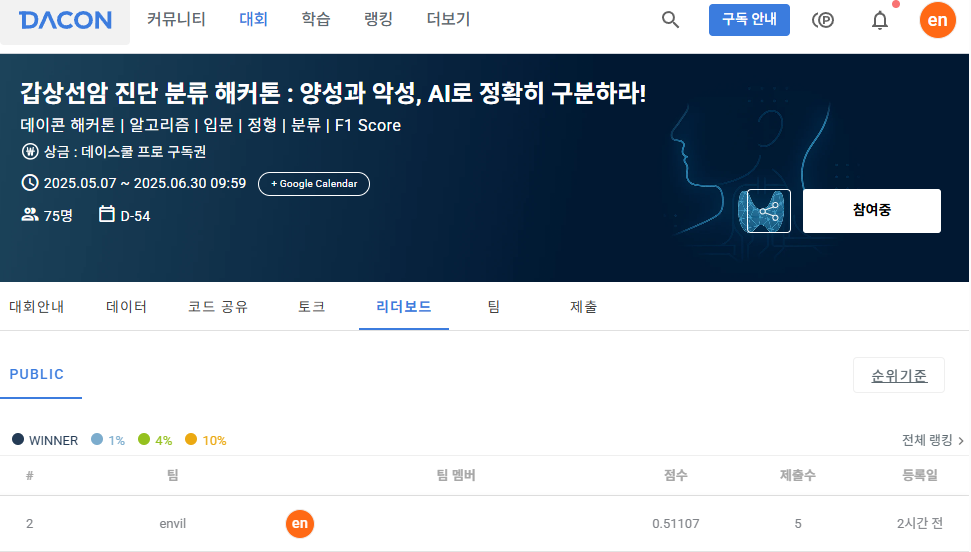

In [56]:
from IPython.display import Image
Image(r"C:\Users\302-15\Desktop\데이콘 갑상선 암 양성과 악성 분류\스크린샷 2025-05-07 141905.png") 

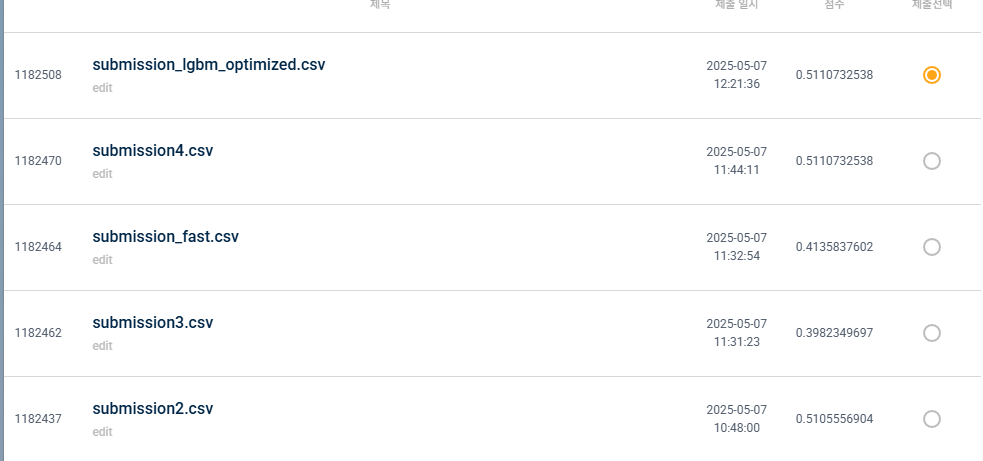

In [57]:
from IPython.display import Image
Image(r"C:\Users\302-15\Desktop\데이콘 갑상선 암 양성과 악성 분류\스크린샷 2025-05-07 145927.png") 

아래의 코드들을 아직 못 올림 
횟수가 다차서 내일 올리겠습니다.


In [45]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from lightgbm import early_stopping, log_evaluation

# 데이터 로딩
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# 컬럼 이름 공백 제거
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

# 범주형 변수 라벨 인코딩
cat_cols = ['Gender', 'Country', 'Race', 'Family_Background',
            'Radiation_History', 'Iodine_Deficiency', 'Smoke',
            'Weight_Risk', 'Diabetes']

for col in cat_cols:
    le = LabelEncoder()
    le.fit(pd.concat([train[col], test[col]]))  # train과 test 모두에 적용
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

# 피처와 타겟 분리
X = train.drop(['ID', 'Cancer'], axis=1)
y = train['Cancer']
X_test = test.drop(['ID'], axis=1)

# 모델 학습 및 예측
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
test_preds = np.zeros(X_test.shape[0])
thresholds = []
f1_scores = []

for train_idx, valid_idx in skf.split(X, y):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    model = lgb.LGBMClassifier(
        n_estimators=1000,
        learning_rate=0.05,
        random_state=1234
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='binary_logloss',
        callbacks=[
            early_stopping(stopping_rounds=50),
            log_evaluation(period=100)
        ]
    )

    val_probs = model.predict_proba(X_valid)[:, 1]

    # 최적 threshold 찾기
    best_f1 = 0
    best_thresh = 0.5
    for thresh in np.arange(0.3, 0.71, 0.01):
        val_preds = (val_probs > thresh).astype(int)
        score = f1_score(y_valid, val_preds)
        if score > best_f1:
            best_f1 = score
            best_thresh = thresh

    print(f"Best Threshold (Fold): {best_thresh:.4f}, Best F1: {best_f1:.4f}")
    thresholds.append(best_thresh)
    f1_scores.append(best_f1)

    test_preds += model.predict_proba(X_test)[:, 1] / skf.n_splits

# 최종 threshold 및 예측
final_threshold = np.mean(thresholds)
print(f"\n✅ 평균 Threshold (CV): {final_threshold:.4f}")
print(f"✅ 평균 F1 Score (CV): {np.mean(f1_scores):.4f}")

final_preds = (test_preds > final_threshold).astype(int)

# 제출 파일 저장
submission = sample_submission.copy()
submission['Cancer'] = final_preds
submission.to_csv('submission6.csv', index=False)
print("🎉 submission7.csv 저장 완료")


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1123
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463
Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_logloss: 0.308741
Early stopping, best iteration is:
[55]	valid_0's binary_logloss: 0.308061
Best Threshold (Fold): 0.3000, Best F1: 0.4814
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002367 seconds.
You can set `force_row_wise=true` to remove t

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

# 데이터 로딩
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# 컬럼 이름 공백 제거
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

# 범주형 변수 라벨 인코딩
cat_cols = ['Gender', 'Country', 'Race', 'Family_Background',
            'Radiation_History', 'Iodine_Deficiency', 'Smoke',
            'Weight_Risk', 'Diabetes']

for col in cat_cols:
    le = LabelEncoder()
    le.fit(pd.concat([train[col], test[col]]))  # train과 test 모두에 적용
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

# 피처와 타겟 분리
X = train.drop(['ID', 'Cancer'], axis=1)
y = train['Cancer']
X_test = test.drop(['ID'], axis=1)

# SMOTE 적용
smote = SMOTE(random_state=1234)
X_res, y_res = smote.fit_resample(X, y)

# 모델 학습 및 예측
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
test_preds = np.zeros(X_test.shape[0])
thresholds = []
f1_scores = []

# 앙상블 모델 정의
lgb_model = lgb.LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    random_state=1234,
    max_depth=10,
    num_leaves=50,
    subsample=0.8,
    class_weight='balanced'
)

xgb_model = xgb.XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    random_state=1234,
    max_depth=10,
    subsample=0.8,
    eval_metric='logloss',
    use_label_encoder=False
)

# 스태킹 모델 정의
stacking_model = StackingClassifier(
    estimators=[('lgb', lgb_model), ('xgb', xgb_model)],
    final_estimator=LogisticRegression()
)

for train_idx, valid_idx in skf.split(X_res, y_res):
    X_train, X_valid = X_res.iloc[train_idx], X_res.iloc[valid_idx]
    y_train, y_valid = y_res.iloc[train_idx], y_res.iloc[valid_idx]

    stacking_model.fit(X_train, y_train)

    # 예측 및 최적 threshold 찾기
    val_probs = stacking_model.predict_proba(X_valid)[:, 1]

    best_f1 = 0
    best_thresh = 0.5
    for thresh in np.arange(0.3, 0.71, 0.01):
        val_preds = (val_probs > thresh).astype(int)
        score = f1_score(y_valid, val_preds)
        if score > best_f1:
            best_f1 = score
            best_thresh = thresh

    print(f"Best Threshold (Fold): {best_thresh:.4f}, Best F1: {best_f1:.4f}")
    thresholds.append(best_thresh)
    f1_scores.append(best_f1)

    test_preds += stacking_model.predict_proba(X_test)[:, 1] / skf.n_splits

# 최종 threshold 및 예측
final_threshold = np.mean(thresholds)
print(f"\n✅ 평균 Threshold (CV): {final_threshold:.4f}")
print(f"✅ 평균 F1 Score (CV): {np.mean(f1_scores):.4f}")

final_preds = (test_preds > final_threshold).astype(int)

# 제출 파일 저장
submission = sample_submission.copy()
submission['Cancer'] = final_preds
submission.to_csv('submission8.csv', index=False)
print("🎉 submission8.csv 저장 완료")


c:\Users\302-15\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[LightGBM] [Info] Number of positive: 61360, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 122720, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:44:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 49088, number of negative: 49088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 98176, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 49088, number of negative: 49088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 98176, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:45:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:45:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:45:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:45:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

Best Threshold (Fold): 0.5100, Best F1: 0.8902
[LightGBM] [Info] Number of positive: 61360, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 122720, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:46:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 49088, number of negative: 49088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 98176, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 49088, number of negative: 49088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 98176, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:46:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:46:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:47:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:47:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

Best Threshold (Fold): 0.4600, Best F1: 0.8889
[LightGBM] [Info] Number of positive: 61360, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 122720, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:47:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 49088, number of negative: 49088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 98176, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 49088, number of negative: 49088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 98176, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:48:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:48:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:48:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:48:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

Best Threshold (Fold): 0.5000, Best F1: 0.8872
[LightGBM] [Info] Number of positive: 61360, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 122720, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:49:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 49088, number of negative: 49088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 98176, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 49088, number of negative: 49088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 98176, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:50:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:50:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:50:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:50:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

Best Threshold (Fold): 0.4000, Best F1: 0.8881
[LightGBM] [Info] Number of positive: 61360, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 122720, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:51:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 49088, number of negative: 49088
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011923 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 98176, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 49088, number of negative: 49088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 98176, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 49088, number of neg

c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:51:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:51:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:52:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:52:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

Best Threshold (Fold): 0.4600, Best F1: 0.8894

✅ 평균 Threshold (CV): 0.4660
✅ 평균 F1 Score (CV): 0.8887
🎉 submission8.csv 저장 완료


In [53]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

# 데이터 로딩
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# 컬럼 이름 공백 제거
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

# 범주형 변수 라벨 인코딩
cat_cols = ['Gender', 'Country', 'Race', 'Family_Background',
            'Radiation_History', 'Iodine_Deficiency', 'Smoke',
            'Weight_Risk', 'Diabetes']

for col in cat_cols:
    le = LabelEncoder()
    le.fit(pd.concat([train[col], test[col]]))  # train과 test 모두에 적용
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

# 피처와 타겟 분리
X = train.drop(['ID', 'Cancer'], axis=1)
y = train['Cancer']
X_test = test.drop(['ID'], axis=1)

# SMOTE 적용
smote_enn = SMOTEENN(random_state=1234)
X_res, y_res = smote_enn.fit_resample(X, y)

# 모델 학습 및 예측
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
test_preds = np.zeros(X_test.shape[0])
thresholds = []
f1_scores = []

# 앙상블 모델 정의
lgb_model = lgb.LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    random_state=1234,
    max_depth=10,
    num_leaves=50,
    subsample=0.8,
    class_weight='balanced'
)

xgb_model = xgb.XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    random_state=1234,
    max_depth=10,
    subsample=0.8,
    eval_metric='logloss',
    use_label_encoder=False
)

catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=10, random_state=1234, verbose=0)
rf_model = RandomForestClassifier(n_estimators=1000, random_state=1234)

# 스태킹 모델 정의
stacking_model = StackingClassifier(
    estimators=[('lgb', lgb_model), ('xgb', xgb_model), ('catboost', catboost_model), ('rf', rf_model)],
    final_estimator=LogisticRegression()
)

for train_idx, valid_idx in skf.split(X_res, y_res):
    X_train, X_valid = X_res.iloc[train_idx], X_res.iloc[valid_idx]
    y_train, y_valid = y_res.iloc[train_idx], y_res.iloc[valid_idx]

    stacking_model.fit(X_train, y_train)

    # 예측 및 최적 threshold 찾기
    val_probs = stacking_model.predict_proba(X_valid)[:, 1]

    best_f1 = 0
    best_thresh = 0.5
    for thresh in np.arange(0.1, 0.91, 0.05):  # 확장된 threshold 범위
        val_preds = (val_probs > thresh).astype(int)
        score = f1_score(y_valid, val_preds)
        if score > best_f1:
            best_f1 = score
            best_thresh = thresh

    print(f"Best Threshold (Fold): {best_thresh:.4f}, Best F1: {best_f1:.4f}")
    thresholds.append(best_thresh)
    f1_scores.append(best_f1)

    test_preds += stacking_model.predict_proba(X_test)[:, 1] / skf.n_splits

# 최종 threshold 및 예측
final_threshold = np.mean(thresholds)
print(f"\n✅ 평균 Threshold (CV): {final_threshold:.4f}")
print(f"✅ 평균 F1 Score (CV): {np.mean(f1_scores):.4f}")

final_preds = (test_preds > final_threshold).astype(int)

# 제출 파일 저장
submission = sample_submission.copy()
submission['Cancer'] = final_preds
submission.to_csv('submission_final.csv', index=False)
print("🎉 submission_final.csv 저장 완료")


c:\Users\302-15\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\302-15\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\302-15\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[LightGBM] [Info] Number of positive: 60674, number of negative: 30924
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 91598, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:49:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 48539, number of negative: 24739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 73278, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 48539, number of negative: 24739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 73278, number of used features: 14
[LightGBM] [Info] 

c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:54:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:54:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:54:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:54:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

Best Threshold (Fold): 0.6000, Best F1: 0.9372
[LightGBM] [Info] Number of positive: 60674, number of negative: 30924
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 91598, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:14:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 48539, number of negative: 24739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 73278, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 48539, number of negative: 24739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 73278, number of used features: 14
[LightGBM] [Info] 

c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:19:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:19:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:19:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


KeyboardInterrupt: 

In [52]:
!pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---- ----------------------------------- 11.3/102.4 MB 54.2 MB/s eta 0:00:02
   ----- ---------------------------------- 13.4/102.4 MB 33.5 MB/s eta 0:00:03
   ------- -------------------------------- 19.9/102.4 MB 31.5 MB/s eta 0:00:03
   ------------ --------------------------- 30.9/102.4 MB 37.8 MB/s eta 0:00:02
   ---------------- ----------------------- 41.7/102.4 MB 40.2 MB/s eta 0:00:02
   --------------------- ------------------ 54.3/102.4 MB 43.8 MB/s eta 0:00:02
   ------------------------ --------------- 61.6/102.4 MB 42.2 MB/s eta 0:00:01
   ---------------------------- ----------- 73.1/102.4 MB 43.6 MB/s eta 0:00:01
   --------------------------------- ------ 86.8/102.4 MB 45.7 MB/s eta 0:00:01
   -------------------------------------- - 98.8/102.4 MB 47.1 MB/s eta 0:00:01
   --------------------------------------  102.2/102.4 MB 47.6 MB/s eta 0:00:01
   --------------------------------------  102.2/


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from lightgbm import early_stopping, log_evaluation

# 데이터 로딩
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# 컬럼 공백 제거
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

# 범주형 변수 라벨 인코딩
cat_cols = ['Gender', 'Country', 'Race', 'Family_Background',
            'Radiation_History', 'Iodine_Deficiency', 'Smoke',
            'Weight_Risk', 'Diabetes']

for col in cat_cols:
    le = LabelEncoder()
    le.fit(pd.concat([train[col], test[col]]))
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

# 피처와 타겟 분리
X = train.drop(['ID', 'Cancer'], axis=1)
y = train['Cancer']
X_test = test.drop(['ID'], axis=1)

# 교차검증 설정
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
test_preds = np.zeros(X_test.shape[0])
val_probs_all = []
val_targets_all = []

# 모델 학습
for fold, (train_idx, valid_idx) in enumerate(skf.split(X, y)):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    # 클래스 불균형 가중치 계산
    scale_pos_weight = 5  # 불균형 비율에 따른 적당한 가중치

    model = lgb.LGBMClassifier(
        n_estimators=1000,
        learning_rate=0.05,
        random_state=42,
        scale_pos_weight=scale_pos_weight,
        n_jobs=-1
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='binary_logloss',
        callbacks=[
            early_stopping(50),
            log_evaluation(100)
        ]
    )

    val_probs = model.predict_proba(X_valid)[:, 1]
    val_probs_all.extend(val_probs)
    val_targets_all.extend(y_valid)

    test_preds += model.predict_proba(X_test)[:, 1] / skf.n_splits

# 최적 threshold 탐색
val_probs_all = np.array(val_probs_all)
val_targets_all = np.array(val_targets_all)
best_thresh = 0
best_f1 = 0

for thresh in np.arange(0.0, 1.0, 0.01):
    preds = (val_probs_all > thresh).astype(int)
    if preds.sum() == 0:  # 모두 0이면 F1 score 계산 불가
        continue
    score = f1_score(val_targets_all, preds)
    if score > best_f1:
        best_f1 = score
        best_thresh = thresh

# 최종 예측
final_preds = (test_preds > best_thresh).astype(int)

print(f"\n✅ 최적 Threshold (전체 기준): {best_thresh:.4f}")
print(f"✅ 전체 Validation F1 Score: {best_f1:.4f}")

# 제출 파일 저장
submission = sample_submission.copy()
submission['Cancer'] = final_preds
submission.to_csv('submission9.csv', index=False)
print("🎉 submission9.csv 저장 완료")


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1123
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.347118
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [

In [49]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from lightgbm import early_stopping, log_evaluation

# 데이터 로딩
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# 컬럼 이름 공백 제거
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

# 상호작용 피처 및 전처리 함수 정의
def feature_engineering(df):
    # Smoke와 Gender 상호작용
    df['Smoke_Gender'] = df['Smoke'].astype(str) + '_' + df['Gender'].astype(str)
    return df

train = feature_engineering(train)
test = feature_engineering(test)

# 범주형 변수 라벨 인코딩 및 희소 그룹 통합
cat_cols = ['Gender', 'Country', 'Race', 'Family_Background',
            'Radiation_History', 'Iodine_Deficiency', 'Smoke',
            'Weight_Risk', 'Diabetes', 'Smoke_Gender']

for col in cat_cols:
    # 희소 클래스 통합 (10개 이하로 등장한 값은 'Rare'로 치환)
    value_counts = train[col].value_counts()
    rare_classes = value_counts[value_counts < 10].index
    train[col] = train[col].replace(rare_classes, 'Rare')
    test[col] = test[col].replace(rare_classes, 'Rare')

    # 라벨 인코딩
    le = LabelEncoder()
    le.fit(pd.concat([train[col], test[col]]))
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

# 피처와 타겟 분리
X = train.drop(['ID', 'Cancer'], axis=1)
y = train['Cancer']
X_test = test.drop(['ID'], axis=1)

# 모델 학습 및 예측
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
test_preds = np.zeros(X_test.shape[0])
val_probs_all = []
y_valid_all = []

for fold, (train_idx, valid_idx) in enumerate(skf.split(X, y)):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    model = lgb.LGBMClassifier(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=7,
        num_leaves=64,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=1234,
        n_jobs=-1
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='binary_logloss',
        callbacks=[
            early_stopping(stopping_rounds=50),
            log_evaluation(period=100)
        ]
    )

    val_probs = model.predict_proba(X_valid)[:, 1]
    val_probs_all.extend(val_probs)
    y_valid_all.extend(y_valid)

    test_preds += model.predict_proba(X_test)[:, 1] / skf.n_splits

# 최적 threshold 전체 기준으로 계산
val_probs_all = np.array(val_probs_all)
y_valid_all = np.array(y_valid_all)

best_f1 = 0
best_thresh = 0.5
for thresh in np.arange(0.1, 0.71, 0.01):
    val_preds_bin = (val_probs_all > thresh).astype(int)
    score = f1_score(y_valid_all, val_preds_bin)
    if score > best_f1:
        best_f1 = score
        best_thresh = thresh

print(f"\n✅ 최적 Threshold (전체 기준): {best_thresh:.4f}")
print(f"✅ 전체 Validation F1 Score: {best_f1:.4f}")

# 최종 예측 및 저장
final_preds = (test_preds > best_thresh).astype(int)
submission = sample_submission.copy()
submission['Cancer'] = final_preds
submission.to_csv('submission9.csv', index=False)
print("🎉 submission10.csv 저장 완료")



[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1127
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's binary_logloss: 0.309605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 및 Feature Engineering 함수 정의
def preprocess(df):
    df = df.copy()

    # 수치형 Feature Engineering
    df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)   # TSH와 T3의 비율
    df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)   # T4와 T3의 비율
    df['Nodule_TSH_ratio'] = df['Nodule_Size'] / (df['TSH_Result'] + 1e-6)   # 결절 크기와 TSH의 비율

    return df

# 3. 훈련 데이터 준비
train_y = train['Cancer']
train_x = train.drop(['ID', 'Cancer'], axis=1)
train_x = preprocess(train_x)

# 4. 테스트 데이터 전처리
test_ids = test['ID']
test_x = test.drop(['ID'], axis=1)
test_x = preprocess(test_x)

# 5. 범주형 변수 One-Hot Encoding
train_x = pd.get_dummies(train_x, columns=['Gender', 'Country', 'Race', 'Family_Background',
                                           'Radiation_History', 'Iodine_Deficiency', 'Smoke',
                                           'Weight_Risk', 'Diabetes'], dummy_na=False)
test_x = pd.get_dummies(test_x, columns=['Gender', 'Country', 'Race', 'Family_Background',
                                         'Radiation_History', 'Iodine_Deficiency', 'Smoke',
                                         'Weight_Risk', 'Diabetes'], dummy_na=False)

# train과 test 컬럼 순서 및 누락된 컬럼 처리 (get_dummies 이후)
train_cols = train_x.columns
test_cols = test_x.columns

for col in train_cols:
    if col not in test_cols:
        test_x[col] = 0
for col in test_cols:
    if col not in train_cols:
        train_x[col] = 0

test_x = test_x[train_cols] # 컬럼 순서 맞추기

# 6. 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    train_x, train_y, test_size=0.2, random_state=42, stratify=train_y
)

# 7. 커스텀 F1 스코어 함수 정의
def lgb_f1_score(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)   # 예측값을 0 또는 1로 이진화
    return 'f1', f1_score(y_true, y_pred_binary), True

# 8. 모델 정의 및 학습
model = LGBMClassifier(
    random_state=42,
    class_weight='balanced',   # 불균형 클래스에 가중치를 부여
    n_estimators=1000,   # 트리의 개수
    learning_rate=0.05,   # 학습률
    n_jobs=-1
)

# 모델 학습
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric=lgb_f1_score,   # F1 스코어를 평가 지표로 사용
    callbacks=[early_stopping(50), log_evaluation(100)]   # 조기 종료 및 로그 출력
)

# 9. Threshold 튜닝을 통한 F1 최적화
val_probs = model.predict_proba(X_val)[:, 1]   # 예측 확률 가져오기
prec, rec, thresholds = precision_recall_curve(y_val, val_probs)   # Precision-Recall 커브
f1s = 2 * (prec * rec) / (prec + rec + 1e-6)   # F1 스코어 계산
best_thresh = thresholds[np.argmax(f1s)]   # 최적의 threshold 찾기
print(f"Best Threshold: {best_thresh:.4f}")

# 최적 threshold에 따른 예측
val_preds = (val_probs > best_thresh).astype(int)
val_f1 = f1_score(y_val, val_preds)   # 최적화된 F1 스코어 계산
print("Optimized Validation F1 Score:", round(val_f1, 4))

# 10. 테스트 데이터 예측 및 제출 파일 생성
test_probs = model.predict_proba(test_x)[:, 1]
test_preds = (test_probs > best_thresh).astype(int)

submission['Cancer'] = test_preds
submission.to_csv('submission_improved.csv', index=False)

print("🎉 submission_improved.csv 저장 완료")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1916
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 37
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_logloss: 0.552102	valid_0's f1: 0.467205
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.557431	valid_0's f1: 0.468117
Best Threshold: 0.5140
Optimized Validation F1 Score: 0.4683

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import os

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 및 Feature Engineering 함수 정의
def preprocess(df):
    df = df.copy()

    # 수치형 Feature Engineering
    df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)  # TSH와 T3의 비율
    df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)  # T4와 T3의 비율
    df['Nodule_TSH_ratio'] = df['Nodule_Size'] / (df['TSH_Result'] + 1e-6)  # 결절 크기와 TSH의 비율

    # 범주형 변수 object -> category로 변환
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('category')

    return df

# 3. 훈련 데이터 준비
train_y = train['Cancer']
train_x = train.drop(['ID', 'Cancer'], axis=1)
train_x = preprocess(train_x)

# 4. 테스트 데이터 전처리
test_ids = test['ID']
test_x = test.drop(['ID'], axis=1)
test_x = preprocess(test_x)

# 5. 카테고리형 변수 추출
cat_cols = train_x.select_dtypes(include='category').columns.tolist()

# 6. 학습/검증 데이터 분할 (Public/Private Score 모의 실험)
# Public Score 모의 실험을 위한 검증 데이터 분리 (전체 테스트의 30% 비율)
X_train_public, X_val_public, y_train_public, y_val_public = train_test_split(
    train_x, train_y, test_size=0.3, random_state=42, stratify=train_y
)

# Private Score 예측을 위한 전체 훈련 데이터
X_train_private = train_x
y_train_private = train_y

# 7. 커스텀 F1 스코어 함수 정의
def lgb_f1_score(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)  # 예측값을 0 또는 1로 이진화
    return 'f1', f1_score(y_true, y_pred_binary), True

# 8. Public Score 모의 실험을 위한 모델 정의 및 학습
model_public = LGBMClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=1000,
    learning_rate=0.05,
    n_jobs=-1
)

model_public.fit(
    X_train_public, y_train_public,
    eval_set=[(X_val_public, y_val_public)],
    eval_metric=lgb_f1_score,
    callbacks=[early_stopping(50), log_evaluation(100)],
    categorical_feature=cat_cols
)

# 9. Public Score 모의 실험을 위한 Threshold 튜닝 및 평가
val_probs_public = model_public.predict_proba(X_val_public)[:, 1]
prec_public, rec_public, thresholds_public = precision_recall_curve(y_val_public, val_probs_public)
f1s_public = 2 * (prec_public * rec_public) / (prec_public + rec_public + 1e-6)
best_thresh_public = thresholds_public[np.argmax(f1s_public)]
print(f"\n[Public Score 모의 실험]")
print(f"Best Threshold (Public Val): {best_thresh_public:.4f}")
val_preds_public = (val_probs_public > best_thresh_public).astype(int)
val_f1_public = f1_score(y_val_public, val_preds_public)
print("Optimized Validation F1 Score (Public Val):", round(val_f1_public, 4))

# 8. Private Score 예측을 위한 최종 모델 정의 및 학습
model_private = LGBMClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=model_public.best_iteration_ if hasattr(model_public, 'best_iteration_') else 1000, # Public Val 결과 기반으로 최적 iteration 사용 가능
    learning_rate=0.05,
    n_jobs=-1
)

model_private.fit(
    X_train_private, y_train_private,
    categorical_feature=cat_cols
)

# 9. Private Score 예측을 위한 Threshold 적용 및 제출 파일 생성
test_probs_private = model_private.predict_proba(test_x)[:, 1]
test_preds_private = (test_probs_private > best_thresh_public).astype(int) # Public Val에서 찾은 최적 Threshold 사용

submission['Cancer'] = test_preds_private
submission.to_csv('submission_public_private.csv', index=False)

print("\n🎉 submission_public_private.csv 저장 완료 (Private Score 예측)")

[LightGBM] [Info] Number of positive: 7321, number of negative: 53690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1896
[LightGBM] [Info] Number of data points in the train set: 61011, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.581303	valid_0's f1: 0.47619

[Public Score 모의 실험]
Best Threshold (Public Val): 0.6737
Optimized Validation F1 Score (Public Val): 0.4768
[LightGBM] [Info] Number of positive: 10459, number of negative: 76700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002917 seconds.
Y

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 및 Feature Engineering 함수 정의
def preprocess(df):
    df = df.copy()

    # 수치형 Feature Engineering
    df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)  # TSH와 T3의 비율
    df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)  # T4와 T3의 비율
    df['Nodule_TSH_ratio'] = df['Nodule_Size'] / (df['TSH_Result'] + 1e-6)  # 결절 크기와 TSH의 비율

    return df

# 3. 훈련 데이터 준비
train_y = train['Cancer']
train_x = train.drop(['ID', 'Cancer'], axis=1)
train_x = preprocess(train_x)

# 4. 테스트 데이터 전처리
test_ids = test['ID']
test_x = test.drop(['ID'], axis=1)
test_x = preprocess(test_x)

# 5. 범주형 변수 Label Encoding
for col in train_x.select_dtypes(include='object').columns:
    le = LabelEncoder()
    train_x[col] = le.fit_transform(train_x[col])
    test_x[col] = le.transform(test_x[col]) # train에 fit된 encoder 사용

# 6. 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    train_x, train_y, test_size=0.3, random_state=42, stratify=train_y
)

# 7. SMOTE 적용 (훈련 데이터에만)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 8. 커스텀 F1 스코어 함수 정의
def lgb_f1_score(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)  # 예측값을 0 또는 1로 이진화
    return 'f1', f1_score(y_true, y_pred_binary), True

# 9. 모델 정의 및 학습 (Resampled 훈련 데이터 사용)
model = LGBMClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=1000,
    learning_rate=0.05,
    n_jobs=-1
)

model.fit(
    X_train_resampled, y_train_resampled,
    eval_set=[(X_val, y_val)],  # 검증 데이터는 원본 비율 유지
    eval_metric=lgb_f1_score,
    callbacks=[early_stopping(50), log_evaluation(100)]
)

# 10. Threshold 튜닝을 통한 F1 최적화 (검증 데이터 사용)
val_probs = model.predict_proba(X_val)[:, 1]
prec, rec, thresholds = precision_recall_curve(y_val, val_probs)
f1s = 2 * (prec * rec) / (prec + rec + 1e-6)
best_thresh = thresholds[np.argmax(f1s)]
print(f"\nBest Threshold: {best_thresh:.4f}")
val_preds = (val_probs > best_thresh).astype(int)
val_f1 = f1_score(y_val, val_preds)
print("Optimized Validation F1 Score:", round(val_f1, 4))

# 11. 테스트 데이터 예측 및 제출 파일 생성
test_probs = model.predict_proba(test_x)[:, 1]
test_preds = (test_probs > best_thresh).astype(int)

submission['Cancer'] = test_preds
submission.to_csv('submission_smote_label_encoded.csv', index=False)

print("\n🎉 submission_smote_label_encoded.csv 저장 완료")

c:\Users\302-15\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[LightGBM] [Info] Number of positive: 53690, number of negative: 53690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1890
[LightGBM] [Info] Number of data points in the train set: 107380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.637292	valid_0's f1: 0.359152

Best Threshold: 0.5407
Optimized Validation F1 Score: 0.3779

🎉 submission_smote_label_encoded.csv 저장 완료


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 및 Feature Engineering 함수 정의
def preprocess(df):
    df = df.copy()

    # 수치형 Feature Engineering (기존)
    df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)
    df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)
    df['Nodule_TSH_ratio'] = df['Nodule_Size'] / (df['TSH_Result'] + 1e-6)

    # 수치형 Feature Engineering (추가)
    df['TSH_x_T3'] = df['TSH_Result'] * df['T3_Result']
    df['T4_minus_T3'] = df['T4_Result'] - df['T3_Result']

    return df

# 3. 훈련 데이터 준비
train_y = train['Cancer']
train_x = train.drop(['ID', 'Cancer'], axis=1)
train_x = preprocess(train_x)

# 4. 테스트 데이터 전처리
test_ids = test['ID']
test_x = test.drop(['ID'], axis=1)
test_x = preprocess(test_x)

# 5. 범주형 변수 Label Encoding
for col in train_x.select_dtypes(include='object').columns:
    le = LabelEncoder()
    train_x[col] = le.fit_transform(train_x[col])
    test_x[col] = le.transform(test_x[col])

# 6. 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    train_x, train_y, test_size=0.3, random_state=42, stratify=train_y
)

# 7. 모델 정의 및 학습 (LightGBM)
lgbm_model = LGBMClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=1000,
    learning_rate=0.05,
    n_jobs=-1
)

lgbm_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='binary_logloss',
    callbacks=[early_stopping(50), log_evaluation(100)]
)

# 8. 모델 정의 및 학습 (XGBoost)
xgb_model = XGBClassifier(
    random_state=42,
    scale_pos_weight=(sum(y_train == 0) / sum(y_train == 1)), # LightGBM의 class_weight='balanced'와 유사한 효과
    n_estimators=1000,
    learning_rate=0.05,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss'
)

eval_set = [(X_val, y_val)]
early_stopping_callback = xgb.callback.EarlyStopping(rounds=50, save_best=True)

xgb_model.fit(
    X_train, y_train,
    eval_set=eval_set,
    callbacks=[early_stopping_callback],
    verbose=100
)

# 9. LightGBM 예측 및 Threshold 튜닝
lgbm_val_probs = lgbm_model.predict_proba(X_val)[:, 1]
prec_lgbm, rec_lgbm, thresholds_lgbm = precision_recall_curve(y_val, lgbm_val_probs)
f1s_lgbm = 2 * (prec_lgbm * rec_lgbm) / (prec_lgbm + rec_lgbm + 1e-6)
best_thresh_lgbm = thresholds_lgbm[np.argmax(f1s_lgbm)]
print(f"\nBest Threshold (LightGBM): {best_thresh_lgbm:.4f}")
lgbm_val_preds = (lgbm_val_probs > best_thresh_lgbm).astype(int)
lgbm_val_f1 = f1_score(y_val, lgbm_val_preds)
print("Optimized Validation F1 Score (LightGBM):", round(lgbm_val_f1, 4))

# 10. XGBoost 예측 및 Threshold 튜닝
xgb_val_probs = xgb_model.predict_proba(X_val)[:, 1]
prec_xgb, rec_xgb, thresholds_xgb = precision_recall_curve(y_val, xgb_val_probs)
f1s_xgb = 2 * (prec_xgb * rec_xgb) / (prec_xgb + rec_xgb + 1e-6)
best_thresh_xgb = thresholds_xgb[np.argmax(f1s_xgb)]
print(f"Best Threshold (XGBoost): {best_thresh_xgb:.4f}")
xgb_val_preds = (xgb_val_probs > best_thresh_xgb).astype(int)
xgb_val_f1 = f1_score(y_val, xgb_val_preds)
print("Optimized Validation F1 Score (XGBoost):", round(xgb_val_f1, 4))

# 11. 앙상블 예측 (Averaging)
averaged_val_probs = (lgbm_val_probs + xgb_val_probs) / 2
prec_ensemble, rec_ensemble, thresholds_ensemble = precision_recall_curve(y_val, averaged_val_probs)
f1s_ensemble = 2 * (prec_ensemble * rec_ensemble) / (prec_ensemble + rec_ensemble + 1e-6)
best_thresh_ensemble = thresholds_ensemble[np.argmax(f1s_ensemble)]
print(f"Best Threshold (Ensemble): {best_thresh_ensemble:.4f}")
averaged_val_preds = (averaged_val_probs > best_thresh_ensemble).astype(int)
averaged_val_f1 = f1_score(y_val, averaged_val_preds)
print("Optimized Validation F1 Score (Ensemble):", round(averaged_val_f1, 4))

# 12. 테스트 데이터 예측 및 제출 파일 생성 (앙상블)
lgbm_test_probs = lgbm_model.predict_proba(test_x)[:, 1]
xgb_test_probs = xgb_model.predict_proba(test_x)[:, 1]
averaged_test_probs = (lgbm_test_probs + xgb_test_probs) / 2
averaged_test_preds = (averaged_test_probs > best_thresh_ensemble).astype(int)

submission['Cancer'] = averaged_test_preds
submission.to_csv('submission_ensemble.csv', index=False)

print("\n🎉 submission_ensemble.csv 저장 완료")

[LightGBM] [Info] Number of positive: 7321, number of negative: 53690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2397
[LightGBM] [Info] Number of data points in the train set: 61011, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_logloss: 0.548695
[200]	valid_0's binary_logloss: 0.535504
[300]	valid_0's binary_logloss: 0.523798
[400]	valid_0's binary_logloss: 0.513433
[500]	valid_0's binary_logloss: 0.504619
[600]	valid_0's binary_logloss: 0.496255
[700]	valid_0's binary_logloss: 0.488247
[800]	valid_0's binary_logloss: 0.480608
[900]	valid_0's binary_logloss: 0.473338
[1000]	valid_

TypeError: XGBClassifier.fit() got an unexpected keyword argument 'callbacks'

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 및 Feature Engineering 함수 정의
def preprocess(df):
    df = df.copy()

    # 수치형 Feature Engineering (기존)
    df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)
    df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)
    df['Nodule_TSH_ratio'] = df['Nodule_Size'] / (df['TSH_Result'] + 1e-6)

    # 수치형 Feature Engineering (추가)
    df['TSH_x_T3'] = df['TSH_Result'] * df['T3_Result']
    df['T4_minus_T3'] = df['T4_Result'] - df['T3_Result']

    return df

# 3. 훈련 데이터 준비
train_y = train['Cancer']
train_x = train.drop(['ID', 'Cancer'], axis=1)
train_x = preprocess(train_x)

# 4. 테스트 데이터 전처리
test_ids = test['ID']
test_x = test.drop(['ID'], axis=1)
test_x = preprocess(test_x)

# 5. 범주형 변수 Label Encoding
for col in train_x.select_dtypes(include='object').columns:
    le = LabelEncoder()
    train_x[col] = le.fit_transform(train_x[col])
    test_x[col] = le.transform(test_x[col])

# 6. 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    train_x, train_y, test_size=0.3, random_state=42, stratify=train_y
)

# 7. 모델 정의 및 학습 (LightGBM)
lgbm_model = LGBMClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=1000,
    learning_rate=0.05,
    n_jobs=-1
)

lgbm_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='binary_logloss',
    callbacks=[early_stopping(50), log_evaluation(100)]
)

# 8. 모델 정의 및 학습 (XGBoost)
xgb_model = XGBClassifier(
    random_state=42,
    scale_pos_weight=(sum(y_train == 0) / sum(y_train == 1)), # LightGBM의 class_weight='balanced'와 유사한 효과
    n_estimators=1000,
    learning_rate=0.05,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss'
)

eval_set = [(X_val, y_val)]

xgb_model.fit(
    X_train, y_train,
    eval_set=eval_set,
    early_stopping_rounds=50,
    verbose=100
)

# 9. LightGBM 예측 및 Threshold 튜닝
lgbm_val_probs = lgbm_model.predict_proba(X_val)[:, 1]
prec_lgbm, rec_lgbm, thresholds_lgbm = precision_recall_curve(y_val, lgbm_val_probs)
f1s_lgbm = 2 * (prec_lgbm * rec_lgbm) / (prec_lgbm + rec_lgbm + 1e-6)
best_thresh_lgbm = thresholds_lgbm[np.argmax(f1s_lgbm)]
print(f"\nBest Threshold (LightGBM): {best_thresh_lgbm:.4f}")
lgbm_val_preds = (lgbm_val_probs > best_thresh_lgbm).astype(int)
lgbm_val_f1 = f1_score(y_val, lgbm_val_preds)
print("Optimized Validation F1 Score (LightGBM):", round(lgbm_val_f1, 4))

# 10. XGBoost 예측 및 Threshold 튜닝
xgb_val_probs = xgb_model.predict_proba(X_val)[:, 1]
prec_xgb, rec_xgb, thresholds_xgb = precision_recall_curve(y_val, xgb_val_probs)
f1s_xgb = 2 * (prec_xgb * rec_xgb) / (prec_xgb + rec_xgb + 1e-6)
best_thresh_xgb = thresholds_xgb[np.argmax(f1s_xgb)]
print(f"Best Threshold (XGBoost): {best_thresh_xgb:.4f}")
xgb_val_preds = (xgb_val_probs > best_thresh_xgb).astype(int)
xgb_val_f1 = f1_score(y_val, xgb_val_preds)
print("Optimized Validation F1 Score (XGBoost):", round(xgb_val_f1, 4))

# 11. 앙상블 예측 (Averaging)
averaged_val_probs = (lgbm_val_probs + xgb_val_probs) / 2
prec_ensemble, rec_ensemble, thresholds_ensemble = precision_recall_curve(y_val, averaged_val_probs)
f1s_ensemble = 2 * (prec_ensemble * rec_ensemble) / (prec_ensemble + rec_ensemble + 1e-6)
best_thresh_ensemble = thresholds_ensemble[np.argmax(f1s_ensemble)]
print(f"Best Threshold (Ensemble): {best_thresh_ensemble:.4f}")
averaged_val_preds = (averaged_val_probs > best_thresh_ensemble).astype(int)
averaged_val_f1 = f1_score(y_val, averaged_val_preds)
print("Optimized Validation F1 Score (Ensemble):", round(averaged_val_f1, 4))

# 12. 테스트 데이터 예측 및 제출 파일 생성 (앙상블)
lgbm_test_probs = lgbm_model.predict_proba(test_x)[:, 1]
xgb_test_probs = xgb_model.predict_proba(test_x)[:, 1]
averaged_test_probs = (lgbm_test_probs + xgb_test_probs) / 2
averaged_test_preds = (averaged_test_probs > best_thresh_ensemble).astype(int)

submission['Cancer'] = averaged_test_preds
submission.to_csv('submission_ensemble.csv', index=False)

print("\n🎉 submission_ensemble.csv 저장 완료")

[LightGBM] [Info] Number of positive: 7321, number of negative: 53690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2397
[LightGBM] [Info] Number of data points in the train set: 61011, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_logloss: 0.548695
[200]	valid_0's binary_logloss: 0.535504
[300]	valid_0's binary_logloss: 0.523798
[400]	valid_0's binary_logloss: 0.513433
[500]	valid_0's binary_logloss: 0.504619
[600]	valid_0's binary_logloss: 0.496255
[700]	valid_0's binary_logloss: 0.488247
[800]	valid_0's binary_logloss: 0.480608
[900]	valid_0's binary_logloss: 0.473338
[1000]	valid_

TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import xgboost as xgb
from xgboost import XGBClassifier

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 및 Feature Engineering 함수 정의
def preprocess(df):
    df = df.copy()

    # 수치형 Feature Engineering (기존)
    df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)
    df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)
    df['Nodule_TSH_ratio'] = df['Nodule_Size'] / (df['TSH_Result'] + 1e-6)

    # 수치형 Feature Engineering (추가)
    df['TSH_x_T3'] = df['TSH_Result'] * df['T3_Result']
    df['T4_minus_T3'] = df['T4_Result'] - df['T3_Result']

    return df

# 3. 훈련 데이터 준비
train_y = train['Cancer']
train_x = train.drop(['ID', 'Cancer'], axis=1)
train_x = preprocess(train_x)

# 4. 테스트 데이터 전처리
test_ids = test['ID']
test_x = test.drop(['ID'], axis=1)
test_x = preprocess(test_x)

# 5. 범주형 변수 Label Encoding
from sklearn.preprocessing import LabelEncoder
for col in train_x.select_dtypes(include='object').columns:
    le = LabelEncoder()
    train_x[col] = le.fit_transform(train_x[col])
    test_x[col] = le.transform(test_x[col])

# 6. 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    train_x, y_train, test_size=0.3, random_state=42, stratify=y_train
)

# 7. 모델 정의 및 학습 (LightGBM)
lgbm_model = LGBMClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=1000,
    learning_rate=0.05,
    n_jobs=-1
)

lgbm_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='binary_logloss',
    callbacks=[early_stopping(50), log_evaluation(100)]
)

# 8. 모델 정의 및 학습 (XGBoost)
xgb_model = XGBClassifier(
    random_state=42,
    scale_pos_weight=(sum(y_train == 0) / sum(y_train == 1)), # LightGBM의 class_weight='balanced'와 유사한 효과
    n_estimators=1000,
    learning_rate=0.05,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss'
)

eval_set = [(X_val, y_val)]
early_stopping_callback = xgb.callback.EarlyStopping(rounds=50, save_best=True)

xgb_model.fit(
    X_train, y_train,
    eval_set=eval_set,
    callbacks=[early_stopping_callback],
    verbose=100
)

# 9. LightGBM 예측 및 Threshold 튜닝
lgbm_val_probs = lgbm_model.predict_proba(X_val)[:, 1]
prec_lgbm, rec_lgbm, thresholds_lgbm = precision_recall_curve(y_val, lgbm_val_probs)
f1s_lgbm = 2 * (prec_lgbm * rec_lgbm) / (prec_lgbm + rec_lgbm + 1e-6)
best_thresh_lgbm = thresholds_lgbm[np.argmax(f1s_lgbm)]
print(f"\nBest Threshold (LightGBM): {best_thresh_lgbm:.4f}")
lgbm_val_preds = (lgbm_val_probs > best_thresh_lgbm).astype(int)
lgbm_val_f1 = f1_score(y_val, lgbm_val_preds)
print("Optimized Validation F1 Score (LightGBM):", round(lgbm_val_f1, 4))

# 10. XGBoost 예측 및 Threshold 튜닝
xgb_val_probs = xgb_model.predict_proba(X_val)[:, 1]
prec_xgb, rec_xgb, thresholds_xgb = precision_recall_curve(y_val, xgb_val_probs)
f1s_xgb = 2 * (prec_xgb * rec_xgb) / (prec_xgb + rec_xgb + 1e-6)
best_thresh_xgb = thresholds_xgb[np.argmax(f1s_xgb)]
print(f"Best Threshold (XGBoost): {best_thresh_xgb:.4f}")
xgb_val_preds = (xgb_val_probs > best_thresh_xgb).astype(int)
xgb_val_f1 = f1_score(y_val, xgb_val_preds)
print("Optimized Validation F1 Score (XGBoost):", round(xgb_val_f1, 4))

# 11. 앙상블 예측 (Averaging)
averaged_val_probs = (lgbm_val_probs + xgb_val_probs) / 2
prec_ensemble, rec_ensemble, thresholds_ensemble = precision_recall_curve(y_val, averaged_val_probs)
f1s_ensemble = 2 * (prec_ensemble * rec_ensemble) / (prec_ensemble + rec_ensemble + 1e-6)
best_thresh_ensemble = thresholds_ensemble[np.argmax(f1s_ensemble)]
print(f"Best Threshold (Ensemble): {best_thresh_ensemble:.4f}")
averaged_val_preds = (averaged_val_probs > best_thresh_ensemble).astype(int)
averaged_val_f1 = f1_score(y_val, averaged_val_preds)
print("Optimized Validation F1 Score (Ensemble):", round(averaged_val_f1, 4))

# 12. 테스트 데이터 예측 및 제출 파일 생성 (앙상블)
lgbm_test_probs = lgbm_model.predict_proba(test_x)[:, 1]
xgb_test_probs = xgb_model.predict_proba(test_x)[:, 1]
averaged_test_probs = (lgbm_test_probs + xgb_test_probs) / 2
averaged_test_preds = (averaged_test_probs > best_thresh_ensemble).astype(int)

submission['Cancer'] = averaged_test_preds
submission.to_csv('submission_ensemble.csv', index=False)

print("\n🎉 submission_ensemble.csv 저장 완료")

ValueError: Found input variables with inconsistent numbers of samples: [87159, 61011]

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 및 Feature Engineering 함수 정의
def preprocess(df):
    df = df.copy()

    # 수치형 Feature Engineering (기존)
    df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)
    df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)
    df['Nodule_TSH_ratio'] = df['Nodule_Size'] / (df['TSH_Result'] + 1e-6)

    # 수치형 Feature Engineering (추가)
    df['TSH_x_T3'] = df['TSH_Result'] * df['T3_Result']
    df['T4_minus_T3'] = df['T4_Result'] - df['T3_Result']

    return df

# 3. 훈련 데이터 준비
train_y = train['Cancer']
train_x = train.drop(['ID', 'Cancer'], axis=1)
train_x = preprocess(train_x)

# 4. 테스트 데이터 전처리
test_ids = test['ID']
test_x = test.drop(['ID'], axis=1)
test_x = preprocess(test_x)

# 5. 범주형 변수 Label Encoding
from sklearn.preprocessing import LabelEncoder
for col in train_x.select_dtypes(include='object').columns:
    le = LabelEncoder()
    train_x[col] = le.fit_transform(train_x[col])
    test_x[col] = le.transform(test_x[col])

# 6. 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    train_x, train_y, test_size=0.3, random_state=42, stratify=train_y
)

# 7. 모델 정의 및 학습 (LightGBM)
lgbm_model = LGBMClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=1000,
    learning_rate=0.05,
    n_jobs=-1
)

lgbm_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='binary_logloss',
    callbacks=[early_stopping(50), log_evaluation(100)]
)

# 8. 모델 정의 및 학습 (XGBoost)
xgb_model = XGBClassifier(
    random_state=42,
    scale_pos_weight=(sum(y_train == 0) / sum(y_train == 1)), # LightGBM의 class_weight='balanced'와 유사한 효과
    n_estimators=1000,
    learning_rate=0.05,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss'
)

eval_set = [(X_val, y_val)]
early_stopping_callback = xgb.callback.EarlyStopping(rounds=50, save_best=True)

xgb_model.fit(
    X_train, y_train,
    eval_set=eval_set,
    callbacks=[early_stopping_callback],
    verbose=100
)

# 9. LightGBM 예측 및 Threshold 튜닝
lgbm_val_probs = lgbm_model.predict_proba(X_val)[:, 1]
prec_lgbm, rec_lgbm, thresholds_lgbm = precision_recall_curve(y_val, lgbm_val_probs)
f1s_lgbm = 2 * (prec_lgbm * rec_lgbm) / (prec_lgbm + rec_lgbm + 1e-6)
best_thresh_lgbm = thresholds_lgbm[np.argmax(f1s_lgbm)]
print(f"\nBest Threshold (LightGBM): {best_thresh_lgbm:.4f}")
lgbm_val_preds = (lgbm_val_probs > best_thresh_lgbm).astype(int)
lgbm_val_f1 = f1_score(y_val, lgbm_val_preds)
print("Optimized Validation F1 Score (LightGBM):", round(lgbm_val_f1, 4))

# 10. XGBoost 예측 및 Threshold 튜닝
xgb_val_probs = xgb_model.predict_proba(X_val)[:, 1]
prec_xgb, rec_xgb, thresholds_xgb = precision_recall_curve(y_val, xgb_val_probs)
f1s_xgb = 2 * (prec_xgb * rec_xgb) / (prec_xgb + rec_xgb + 1e-6)
best_thresh_xgb = thresholds_xgb[np.argmax(f1s_xgb)]
print(f"Best Threshold (XGBoost): {best_thresh_xgb:.4f}")
xgb_val_preds = (xgb_val_probs > best_thresh_xgb).astype(int)
xgb_val_f1 = f1_score(y_val, xgb_val_preds)
print("Optimized Validation F1 Score (XGBoost):", round(xgb_val_f1, 4))

# 11. 앙상블 예측 (Averaging)
averaged_val_probs = (lgbm_val_probs + xgb_val_probs) / 2
prec_ensemble, rec_ensemble, thresholds_ensemble = precision_recall_curve(y_val, averaged_val_probs)
f1s_ensemble = 2 * (prec_ensemble * rec_ensemble) / (prec_ensemble + rec_ensemble + 1e-6)
best_thresh_ensemble = thresholds_ensemble[np.argmax(f1s_ensemble)]
print(f"Best Threshold (Ensemble): {best_thresh_ensemble:.4f}")
averaged_val_preds = (averaged_val_probs > best_thresh_ensemble).astype(int)
averaged_val_f1 = f1_score(y_val, averaged_val_preds)
print("Optimized Validation F1 Score (Ensemble):", round(averaged_val_f1, 4))

# 12. 테스트 데이터 예측 및 제출 파일 생성 (앙상블)
lgbm_test_probs = lgbm_model.predict_proba(test_x)[:, 1]
xgb_test_probs = xgb_model.predict_proba(test_x)[:, 1]
averaged_test_probs = (lgbm_test_probs + xgb_test_probs) / 2
averaged_test_preds = (averaged_test_probs > best_thresh_ensemble).astype(int)

submission['Cancer'] = averaged_test_preds
submission.to_csv('submission_ensemble.csv', index=False)

print("\n🎉 submission_ensemble.csv 저장 완료")

[LightGBM] [Info] Number of positive: 7321, number of negative: 53690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2397
[LightGBM] [Info] Number of data points in the train set: 61011, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_logloss: 0.548695
[200]	valid_0's binary_logloss: 0.535504
[300]	valid_0's binary_logloss: 0.523798
[400]	valid_0's binary_logloss: 0.513433
[500]	valid_0's binary_logloss: 0.504619
[600]	valid_0's binary_logloss: 0.496255
[700]	valid_0's binary_logloss: 0.488247
[800]	valid_0's binary_logloss: 0.480608
[900]	valid_0's binary_logloss: 0.473338
[1000]	valid_

TypeError: XGBClassifier.fit() got an unexpected keyword argument 'callbacks'

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import os

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 및 Feature Engineering
def preprocess(df):
    df = df.copy()
    
    # 로그 변환 (왜도 완화)
    for col in ['TSH_Result', 'T3_Result', 'T4_Result', 'Nodule_Size']:
        df[col] = np.log1p(df[col])

    # 파생 변수 생성
    df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)
    df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)
    df['Nodule_TSH_ratio'] = df['Nodule_Size'] / (df['TSH_Result'] + 1e-6)
    df['T3_TSH_ratio'] = df['T3_Result'] / (df['TSH_Result'] + 1e-6)
    df['hormone_sum'] = df['TSH_Result'] + df['T3_Result'] + df['T4_Result']
    df['is_large_nodule'] = (df['Nodule_Size'] > np.log1p(20)).astype(int)  # 20mm 이상 로그 기준

    # 범주형 변수 처리
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('category')

    return df

# 3. 데이터 분리
train_y = train['Cancer']
train_x = preprocess(train.drop(['ID', 'Cancer'], axis=1))
test_x = preprocess(test.drop(['ID'], axis=1))
test_ids = test['ID']

# 4. 카테고리형 변수
cat_cols = train_x.select_dtypes(include='category').columns.tolist()

# 5. F1 Score 기반 커스텀 평가 함수
def lgb_f1_score(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    return 'f1', f1_score(y_true, y_pred_binary), True

# 6. K-Fold 준비
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 결과 저장
val_scores = []
thresholds = []
test_preds = np.zeros(len(test_x))

# 7. Fold 반복 학습
for fold, (train_idx, val_idx) in enumerate(kf.split(train_x, train_y)):
    print(f"\n🟢 Fold {fold + 1}")

    X_train, X_val = train_x.iloc[train_idx], train_x.iloc[val_idx]
    y_train, y_val = train_y.iloc[train_idx], train_y.iloc[val_idx]

    model = LGBMClassifier(
        random_state=42,
        class_weight='balanced',
        n_estimators=3000,
        learning_rate=0.01,
        max_depth=7,
        num_leaves=64,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=1.0,
        reg_lambda=1.0,
        n_jobs=-1
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric=lgb_f1_score,
        callbacks=[early_stopping(200), log_evaluation(100)],
        categorical_feature=cat_cols
    )

    # Threshold 최적화
    val_probs = model.predict_proba(X_val)[:, 1]
    prec, rec, thresholds_fold = precision_recall_curve(y_val, val_probs)
    f1s = 2 * (prec * rec) / (prec + rec + 1e-6)
    best_thresh = thresholds_fold[np.argmax(f1s)]
    thresholds.append(best_thresh)

    val_preds = (val_probs > best_thresh).astype(int)
    score = f1_score(y_val, val_preds)
    val_scores.append(score)
    print(f"Fold {fold + 1} Best Threshold: {best_thresh:.4f}, F1 Score: {score:.4f}")

    # 테스트 데이터 예측 축적
    test_probs = model.predict_proba(test_x)[:, 1]
    test_preds += test_probs / kf.n_splits  # 평균

# 8. 최종 Threshold 평균 적용 후 예측
final_threshold = np.mean(thresholds)
final_preds = (test_preds > final_threshold).astype(int)

print("\n✅ 평균 Validation F1 Score:", round(np.mean(val_scores), 4))
print("✅ 최종 평균 Threshold:", round(final_threshold, 4))

# 9. 제출 파일 생성
submission['Cancer'] = final_preds
submission.to_csv('submission_kfold.csv', index=False)



🟢 Fold 1
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2407
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.601862	valid_0's f1: 0.477082
[200]	valid_0's binary_logloss: 0.570339	valid_0's f1: 0.476965
[300]	valid_0's binary_logloss: 0.555567	valid_0's f1: 0.477789
[400]	valid_0's binary_logloss: 0.548456	valid_0's f1: 0.477671
[500]	valid_0's binary_logloss: 0.543702	valid_0's f1: 0.476237
[LightGBM] [Warning] No further splits with positiv

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier

# X, y는 당신의 전체 feature / label 데이터셋입니다
# X = ...
# y = ...

param_grid = [
    {'learning_rate': 0.03, 'num_leaves': 31, 'min_child_samples': 50},
    {'learning_rate': 0.01, 'num_leaves': 64, 'min_child_samples': 100},
    {'learning_rate': 0.05, 'num_leaves': 15, 'min_child_samples': 20},
]

best_f1 = 0
best_model = None
best_threshold = None
best_params = None

for i, p in enumerate(param_grid):
    print(f'\n▶ Testing param set {i+1}: {p}')
    
    f1_scores = []
    thresholds = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = LGBMClassifier(
            objective='binary',
            boosting_type='gbdt',
            metric='binary_logloss',
            verbosity=-1,
            learning_rate=p['learning_rate'],
            num_leaves=p['num_leaves'],
            min_child_samples=p['min_child_samples'],
            subsample=0.8,
            colsample_bytree=0.8,
            reg_alpha=0.1,
            reg_lambda=0.1,
            scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
            n_estimators=1000
        )

        model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            early_stopping_rounds=50,
            verbose=100
        )

        y_pred_proba = model.predict_proba(X_val)[:, 1]

        # 최적 threshold 탐색
        best_f1_this_fold = 0
        best_th = 0.5
        for th in np.arange(0.1, 0.9, 0.01):
            y_pred = (y_pred_proba >= th).astype(int)
            f1 = f1_score(y_val, y_pred)
            if f1 > best_f1_this_fold:
                best_f1_this_fold = f1
                best_th = th

        f1_scores.append(best_f1_this_fold)
        thresholds.append(best_th)

        print(f"[Fold {fold+1}] Best Threshold: {best_th:.4f}, F1: {best_f1_this_fold:.4f}")

    avg_f1 = np.mean(f1_scores)
    avg_th = np.mean(thresholds)

    print(f"\n>>> Param set {i+1} avg F1: {avg_f1:.4f}, avg Threshold: {avg_th:.4f}")

    if avg_f1 > best_f1:
        best_f1 = avg_f1
        best_threshold = avg_th
        best_params = p

print("\n🎯 Best Parameter Set:")
print(best_params)
print(f"Best Avg F1: {best_f1:.4f}, Best Avg Threshold: {best_threshold:.4f}")



▶ Testing param set 1: {'learning_rate': 0.03, 'num_leaves': 31, 'min_child_samples': 50}


NameError: name 'X' is not defined

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import os

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 및 Feature Engineering
def preprocess(df):
    df = df.copy()
    
    # 로그 변환 (왜도 완화)
    for col in ['TSH_Result', 'T3_Result', 'T4_Result', 'Nodule_Size']:
        df[col] = np.log1p(df[col])

    # 파생 변수 생성
    df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)
    df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)
    df['Nodule_TSH_ratio'] = df['Nodule_Size'] / (df['TSH_Result'] + 1e-6)
    df['T3_TSH_ratio'] = df['T3_Result'] / (df['TSH_Result'] + 1e-6)
    df['hormone_sum'] = df['TSH_Result'] + df['T3_Result'] + df['T4_Result']
    df['is_large_nodule'] = (df['Nodule_Size'] > np.log1p(20)).astype(int)  # 20mm 이상 로그 기준

    # 범주형 변수 처리
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('category')

    return df

# 3. 데이터 분리
train_y = train['Cancer']
train_x = preprocess(train.drop(['ID', 'Cancer'], axis=1))
test_x = preprocess(test.drop(['ID'], axis=1))
test_ids = test['ID']

# 4. 카테고리형 변수
cat_cols = train_x.select_dtypes(include='category').columns.tolist()

# 5. F1 Score 기반 커스텀 평가 함수
def lgb_f1_score(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    return 'f1', f1_score(y_true, y_pred_binary), True

# 6. K-Fold 준비
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 결과 저장
val_scores = []
thresholds = []
test_preds = np.zeros(len(test_x))

# 7. Fold 반복 학습
for fold, (train_idx, val_idx) in enumerate(kf.split(train_x, train_y)):
    print(f"\n🟢 Fold {fold + 1}")

    X_train, X_val = train_x.iloc[train_idx], train_x.iloc[val_idx]
    y_train, y_val = train_y.iloc[train_idx], train_y.iloc[val_idx]

    model = LGBMClassifier(
        random_state=42,
        class_weight='balanced',
        n_estimators=3000,
        learning_rate=0.01,
        max_depth=7,
        num_leaves=64,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=1.0,
        reg_lambda=1.0,
        n_jobs=-1
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric=lgb_f1_score,
        callbacks=[early_stopping(200), log_evaluation(100)],
        categorical_feature=cat_cols
    )

    # Threshold 최적화
    val_probs = model.predict_proba(X_val)[:, 1]
    prec, rec, thresholds_fold = precision_recall_curve(y_val, val_probs)
    f1s = 2 * (prec * rec) / (prec + rec + 1e-6)
    best_thresh = thresholds_fold[np.argmax(f1s)]
    thresholds.append(best_thresh)

    val_preds = (val_probs > best_thresh).astype(int)
    score = f1_score(y_val, val_preds)
    val_scores.append(score)
    print(f"Fold {fold + 1} Best Threshold: {best_thresh:.4f}, F1 Score: {score:.4f}")

    # 테스트 데이터 예측 축적
    test_probs = model.predict_proba(test_x)[:, 1]
    test_preds += test_probs / kf.n_splits  # 평균

# 8. 최종 Threshold 평균 적용 후 예측
final_threshold = np.mean(thresholds)
final_preds = (test_preds > final_threshold).astype(int)

print("\n✅ 평균 Validation F1 Score:", round(np.mean(val_scores), 4))
print("✅ 최종 평균 Threshold:", round(final_threshold, 4))

# 9. 제출 파일 생성
submission['Cancer'] = final_preds
submission.to_csv('submissio.csv', index=False)



🟢 Fold 1
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2407
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.601862	valid_0's f1: 0.477082
[200]	valid_0's binary_logloss: 0.570339	valid_0's f1: 0.476965
[300]	valid_0's binary_logloss: 0.555567	valid_0's f1: 0.477789
[400]	valid_0's binary_logloss: 0.548456	valid_0's f1: 0.477671
[500]	valid_0's binary_logloss: 0.543702	valid_0's f1: 0.476237
[LightGBM] [Warning] No further splits with positiv